In [28]:
import shap
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Flatten, Input, Dropout, LSTM
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [29]:
# nonstationary forcing 
input_data = np.load('data/input_sal_temp_ns.npy')
output_data = np.load('data/output_sal_temp_ns.npy')

In [30]:
qplot = np.load('data/q_sal_temp_ns.npy')
time = np.load('data/input_sal_temp_ns.npy')[:, 0]

In [31]:
X_train = input_data[0:60000]
y_train = output_data[0:60000]
X_val = input_data[60000:80000]
y_val = output_data[60000:80000]
X_test = input_data[80000:100000]
y_test = output_data[80000:100000] 

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_,scaler.scale_

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
input_scaled = scaler.transform(input_data)

Y_train = keras.utils.to_categorical(y_train)
Y_val = keras.utils.to_categorical(y_val)
Y_test = keras.utils.to_categorical(y_test)

In [6]:
def create_sequences(data, labels, time_steps):
    sequences, sequence_labels = [], []
    for i in range(len(data) - time_steps + 1):
        sequences.append(data[i:i + time_steps])
        sequence_labels.append(labels[i + time_steps - 1])  # Label at the end of the sequence
    return np.array(sequences), np.array(sequence_labels)

time_steps = 10
feature_dim = 5

# Create sequences
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)
input_seq, output_seq = create_sequences(input_scaled, output_data, time_steps)


In [33]:
train_sample = shap.sample(X_train_seq, 100)
input_sample = shap.sample(input_seq, 1000)

In [34]:
train_sample.shape

(100, 10, 5)

In [35]:
train_sample_wo_time = train_sample[:, :, 1:5]
input_sample_wo_time = input_sample[:, :, 1:5]

input_sample_flattened = input_sample_wo_time.reshape(input_sample_wo_time.shape[0], -1)
train_sample_flattened = train_sample_wo_time.reshape(train_sample_wo_time.shape[0], -1)

In [11]:
shap_values_list = []

In [12]:
for i in range(10):
    print(i)
    model = Sequential([
    LSTM(8, input_shape=(time_steps, feature_dim-1), return_sequences=False),  
    Dense(4, activation='relu'), 
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')  
    ])
    
    model.load_weights("models_lstm_ns/ensemble_member_" + str(i) + ".keras")
    model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    def predict_flattened(X):
        X_reshaped = X.reshape(X.shape[0], time_steps, feature_dim-1)
        return model.predict(X_reshaped)
    explainer = shap.PermutationExplainer(predict_flattened, train_sample_flattened)
    shap_values = explainer.shap_values(input_sample_flattened)
    shap_values_list.append(shap_values)  

0
129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   0%|          | 5/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 7/1000 [00:13<13:53,  1.19it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:14<19:28,  1.18s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:16<23:02,  1.39s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:18<26:41,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:20<27:22,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:22<27:27,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:23<27:27,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:25<27:18,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:27<27:14,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:28<27:44,  1.69s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:30<29:59,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:33<32:43,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:35<32:56,  2.01s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:37<33:30,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:39<32:30,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:41<30:48,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:42<29:25,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:44<28:27,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:46<28:51,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:47<28:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:49<27:42,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:51<27:17,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:52<27:04,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:54<26:47,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:55<26:36,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [00:57<26:27,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [00:59<26:18,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [01:00<26:09,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [01:02<26:04,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:03<25:58,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:05<25:57,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:07<26:13,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:08<26:02,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:10<26:04,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:12<26:01,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:13<26:23,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:15<26:43,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:17<26:29,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:18<26:15,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:20<26:05,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:22<26:12,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:23<26:08,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:25<26:21,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:27<26:21,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:28<26:49,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:30<28:01,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:32<27:33,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:34<27:12,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:36<27:46,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:37<27:01,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:39<26:33,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:40<26:16,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:42<26:00,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:44<25:44,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:45<25:41,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:47<25:46,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:49<26:10,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:51<26:43,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [01:52<26:36,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [01:54<26:31,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [01:56<26:27,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [01:57<26:03,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [01:59<25:45,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [02:00<25:34,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:02<25:24,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:04<25:18,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:05<25:11,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:07<25:06,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:09<25:00,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:10<25:03,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:12<25:00,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:14<25:18,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:15<25:09,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:17<25:06,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:18<24:59,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:20<24:51,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:22<24:59,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:23<24:54,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:25<24:55,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:27<25:18,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:28<25:16,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:30<25:29,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:32<25:44,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:33<25:53,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:35<25:37,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:37<25:38,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:39<26:15,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:40<25:48,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:42<25:29,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [02:44<25:23,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [02:45<25:29,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [02:47<25:20,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [02:49<25:10,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [02:50<25:02,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [02:52<24:58,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [02:54<24:48,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [02:55<24:46,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [02:57<24:59,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [02:59<24:49,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:00<24:42,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:02<24:35,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:04<24:35,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:05<24:30,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:07<24:27,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:08<24:19,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:10<24:38,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:12<24:26,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:13<24:14,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:15<24:06,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:17<24:18,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:18<24:10,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:20<24:06,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:22<24:03,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:23<23:59,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:25<23:56,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:27<24:25,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:28<24:36,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:30<24:51,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:32<24:58,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:34<26:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:36<26:20,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:37<26:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [03:39<25:33,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [03:41<24:58,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [03:42<24:32,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [03:44<24:13,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [03:46<24:00,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [03:47<24:11,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [03:49<23:56,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [03:51<23:48,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [03:52<23:47,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [03:54<23:36,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [03:56<23:39,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [03:57<23:49,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [03:59<23:33,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:00<23:22,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:02<23:14,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:04<23:06,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:05<23:08,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:07<23:03,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:09<23:02,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:10<23:04,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:12<23:27,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:14<23:14,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:15<23:08,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:17<23:26,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:18<23:15,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:20<23:06,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:22<23:18,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:23<23:06,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:25<22:57,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:27<22:50,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:28<22:44,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [04:30<23:49,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [04:32<23:33,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [04:33<23:20,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [04:35<23:13,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [04:37<23:11,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [04:38<23:21,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [04:40<23:25,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [04:42<23:13,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [04:43<23:01,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [04:45<22:53,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [04:47<22:47,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [04:48<23:01,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [04:50<22:55,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [04:52<22:55,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [04:53<22:51,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [04:55<22:44,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [04:57<22:43,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [04:58<22:37,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:00<23:17,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:02<23:03,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:03<22:46,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:05<22:52,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:07<22:37,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:08<22:25,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:10<22:31,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:12<22:39,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:13<22:22,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:15<22:12,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:17<22:37,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:18<22:22,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:20<22:14,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:22<22:09,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [05:23<22:08,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [05:25<21:59,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [05:26<21:53,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [05:28<22:18,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [05:30<23:06,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [05:32<23:47,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [05:34<24:38,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [05:36<24:39,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [05:37<23:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [05:39<23:14,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [05:41<22:48,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [05:42<22:23,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [05:44<22:05,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [05:46<22:00,  1.66s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [05:48<24:18,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [05:50<23:40,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [05:51<22:56,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [05:53<22:30,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [05:54<22:10,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [05:56<21:54,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [05:58<21:41,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [05:59<21:33,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:01<21:27,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:03<21:30,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:04<21:24,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:06<21:20,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:08<21:29,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:09<21:22,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:11<21:27,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:13<22:01,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:14<21:42,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:16<21:33,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [06:18<21:29,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [06:19<21:34,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [06:21<21:53,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [06:23<21:56,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [06:25<22:37,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [06:26<22:09,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [06:28<22:01,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [06:30<21:45,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [06:31<21:35,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [06:33<21:45,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [06:35<21:32,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [06:36<21:23,  1.68s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [06:38<22:53,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [06:40<22:30,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [06:42<22:41,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [06:44<22:48,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [06:45<22:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [06:47<21:36,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [06:49<21:35,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [06:50<21:22,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [06:52<21:11,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [06:54<20:57,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [06:55<20:44,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [06:57<20:34,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [06:59<20:47,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:00<20:36,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:02<20:28,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:03<20:23,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:05<20:16,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:07<20:12,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:08<20:36,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:10<20:40,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:12<20:33,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [07:13<20:34,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [07:15<20:30,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [07:17<20:21,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [07:18<20:29,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [07:20<20:20,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [07:22<20:12,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [07:23<20:05,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [07:25<19:59,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [07:26<20:00,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [07:28<20:31,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [07:30<20:40,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [07:32<20:52,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [07:33<20:38,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [07:35<20:23,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [07:37<20:09,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [07:38<20:00,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [07:40<20:01,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [07:42<19:55,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [07:43<19:50,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [07:45<19:45,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [07:47<19:55,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [07:48<19:46,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [07:50<19:37,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [07:51<19:32,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [07:53<19:31,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [07:55<19:27,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [07:56<19:24,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [07:58<19:25,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [07:59<19:22,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:01<19:20,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:03<19:16,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:04<19:13,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:06<19:32,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [08:08<19:32,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [08:10<20:11,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [08:11<20:13,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [08:13<20:07,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [08:15<19:51,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [08:17<20:30,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [08:18<20:05,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [08:20<20:06,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [08:22<19:55,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [08:23<19:52,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [08:25<19:41,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [08:27<19:36,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [08:28<19:28,  1.67s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [08:30<20:04,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [08:32<19:52,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [08:34<20:27,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [08:35<20:18,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [08:37<19:56,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [08:39<19:42,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [08:40<20:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [08:42<19:50,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [08:44<19:34,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [08:46<19:22,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [08:47<19:11,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [08:49<19:05,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [08:51<19:15,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [08:52<19:12,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [08:54<19:07,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [08:56<19:12,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [08:57<19:38,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [08:59<19:20,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:01<19:19,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [09:02<19:01,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [09:04<18:48,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [09:06<18:39,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [09:07<18:30,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [09:09<18:23,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [09:11<18:27,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [09:12<18:38,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [09:14<18:35,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [09:16<18:28,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [09:17<18:21,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [09:19<18:16,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [09:20<18:16,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [09:22<18:26,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [09:24<18:19,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [09:25<18:13,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [09:27<18:07,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [09:29<18:19,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [09:31<18:31,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [09:32<18:47,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [09:34<18:34,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [09:36<18:20,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [09:37<18:11,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [09:39<18:04,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [09:40<18:05,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [09:42<18:17,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [09:44<18:07,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [09:45<17:58,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [09:47<17:53,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [09:49<17:49,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [09:50<17:47,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [09:52<18:06,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [09:54<17:56,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [09:55<17:47,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [09:57<17:40,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [09:59<17:35,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [10:00<17:36,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [10:02<17:32,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [10:04<17:28,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [10:05<17:25,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [10:07<17:22,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [10:08<17:20,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [10:10<18:08,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [10:12<18:08,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [10:14<17:57,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [10:15<17:54,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [10:17<17:50,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [10:19<17:48,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [10:20<17:44,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [10:22<17:41,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [10:24<17:39,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [10:26<17:44,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [10:27<17:40,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [10:29<17:41,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [10:31<17:41,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [10:32<18:01,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [10:34<17:51,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [10:36<17:43,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [10:38<17:34,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [10:39<17:28,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [10:41<17:27,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [10:43<17:57,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [10:44<17:36,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [10:46<17:20,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [10:48<17:06,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [10:49<16:57,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [10:51<16:50,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [10:53<16:47,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [10:54<16:47,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [10:56<16:41,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [10:57<16:37,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [10:59<16:34,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [11:01<16:32,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [11:02<16:45,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [11:04<17:23,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [11:06<17:05,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [11:08<16:50,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [11:09<16:50,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [11:11<17:22,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [11:13<18:05,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [11:15<17:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [11:16<17:12,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [11:18<17:01,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [11:20<16:52,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [11:21<16:45,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [11:23<16:37,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [11:25<16:27,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [11:26<16:22,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [11:28<16:36,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [11:30<16:46,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [11:32<17:26,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [11:33<17:09,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [11:35<16:47,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [11:37<16:30,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [11:38<16:18,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [11:40<16:12,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [11:42<16:06,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [11:43<16:07,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [11:45<16:09,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [11:47<16:24,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [11:49<16:35,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [11:50<16:33,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [11:52<16:47,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [11:54<16:40,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [11:56<16:36,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [11:57<16:56,  1.77s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [11:59<17:41,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [12:01<18:02,  1.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [12:03<18:25,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [12:06<19:09,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [12:08<18:42,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [12:09<18:15,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [12:11<18:08,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [12:13<18:46,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [12:15<17:53,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [12:17<17:21,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [12:18<16:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [12:20<17:00,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [12:23<17:59,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [12:24<17:42,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [12:26<17:43,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [12:28<17:16,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [12:30<16:54,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [12:32<16:44,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [12:33<16:48,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [12:35<16:38,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [12:37<16:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [12:39<16:23,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [12:40<16:16,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [12:42<16:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [12:44<16:07,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [12:46<16:00,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [12:47<15:53,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [12:49<15:46,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [12:51<15:40,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [12:53<15:37,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [12:54<15:33,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [12:56<15:31,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [12:58<15:28,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [12:59<15:26,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [13:01<15:31,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [13:03<15:32,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [13:05<15:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [13:06<15:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [13:08<15:21,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [13:10<15:27,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [13:12<15:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [13:13<15:18,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [13:15<15:21,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [13:17<15:22,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [13:18<15:15,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [13:20<15:13,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [13:22<15:31,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [13:24<15:26,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [13:26<15:20,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [13:27<15:24,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [13:29<15:44,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [13:31<15:56,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [13:33<16:11,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [13:35<16:05,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [13:37<15:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [13:38<15:26,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [13:40<15:17,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [13:42<15:28,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [13:44<15:12,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [13:45<15:03,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [13:47<14:58,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [13:49<14:54,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [13:51<14:51,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [13:52<14:44,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [13:54<14:43,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [13:56<14:43,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [13:58<14:48,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [13:59<14:44,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [14:01<14:36,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [14:03<14:44,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [14:05<14:39,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [14:07<15:21,  1.84s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [14:08<15:24,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [14:10<15:42,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [14:12<15:42,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [14:14<15:50,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [14:16<15:37,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [14:18<15:17,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [14:20<15:07,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [14:21<14:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [14:23<15:14,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [14:25<15:08,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [14:27<15:02,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [14:29<14:58,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [14:31<15:06,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [14:33<14:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [14:34<14:56,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [14:36<14:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [14:38<14:42,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [14:40<14:50,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [14:42<14:52,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [14:44<14:50,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [14:45<14:41,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [14:47<14:28,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [14:49<14:24,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [14:51<14:15,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [14:53<14:12,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [14:54<14:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [14:56<14:20,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [14:58<14:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [15:00<14:00,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [15:01<13:57,  1.77s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [15:03<14:04,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [15:05<14:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [15:07<13:52,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [15:09<14:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [15:10<14:04,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [15:12<13:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [15:14<13:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [15:16<13:40,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [15:17<13:32,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [15:19<13:27,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [15:21<13:26,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [15:23<13:27,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [15:24<13:21,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [15:26<13:16,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [15:28<13:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [15:30<13:40,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [15:32<13:46,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [15:33<13:34,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [15:35<13:25,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [15:37<13:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [15:39<13:07,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [15:40<13:02,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [15:42<13:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [15:44<13:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [15:46<13:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [15:47<12:56,  1.74s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [15:49<12:49,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [15:51<12:45,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [15:53<12:44,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [15:54<12:37,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [15:56<12:36,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [15:58<12:36,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [15:59<12:36,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [16:01<12:33,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [16:03<12:43,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [16:05<12:46,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [16:07<13:13,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [16:08<13:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [16:10<12:59,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [16:12<12:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [16:14<12:48,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [16:16<12:44,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [16:17<12:41,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [16:19<12:51,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [16:21<12:47,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [16:23<12:48,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [16:25<12:53,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [16:26<12:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [16:28<12:37,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [16:30<12:40,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [16:32<12:38,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [16:34<12:56,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [16:36<12:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [16:37<12:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [16:39<12:28,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [16:41<12:26,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [16:43<12:33,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [16:45<12:37,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [16:46<12:26,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [16:48<12:18,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [16:50<12:13,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [16:52<12:22,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [16:54<12:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [16:55<12:15,  1.80s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [16:57<12:53,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [16:59<12:35,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [17:01<12:14,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [17:03<12:00,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [17:04<11:51,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [17:06<11:40,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [17:08<11:35,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [17:09<11:31,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [17:11<11:27,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [17:13<11:32,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [17:15<11:26,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [17:16<11:22,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [17:18<11:19,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [17:20<11:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [17:22<12:01,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [17:24<11:52,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [17:25<11:38,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [17:27<11:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [17:29<11:43,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [17:31<11:44,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [17:33<11:41,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [17:34<11:28,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [17:36<11:16,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [17:38<11:08,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [17:40<11:07,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [17:41<11:01,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [17:43<11:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [17:45<11:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [17:47<11:12,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [17:48<11:13,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [17:50<11:15,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [17:52<11:17,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [17:54<11:15,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [17:56<11:16,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [17:58<11:18,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [18:00<11:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [18:01<11:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [18:03<11:23,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [18:05<11:19,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [18:07<11:21,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [18:09<11:47,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [18:11<11:39,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [18:13<11:35,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [18:15<11:41,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [18:17<11:37,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [18:19<11:34,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [18:21<11:33,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [18:23<11:40,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [18:24<11:33,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [18:26<11:27,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [18:28<11:23,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [18:30<11:21,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [18:32<11:23,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [18:34<11:19,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [18:36<11:12,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [18:38<11:05,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [18:40<11:03,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [18:41<10:58,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [18:43<10:53,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [18:45<10:48,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [18:47<10:55,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [18:49<10:50,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [18:51<10:44,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [18:53<11:00,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [18:55<10:52,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [18:57<10:46,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [18:58<10:46,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [19:00<10:39,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [19:02<10:49,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [19:04<10:44,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [19:06<10:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [19:08<10:26,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [19:10<10:27,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [19:12<10:19,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [19:13<10:16,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [19:15<10:13,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [19:17<10:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [19:19<10:13,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [19:21<10:10,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [19:23<10:13,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [19:25<10:08,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [19:26<10:04,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [19:28<10:08,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [19:30<10:14,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [19:32<10:11,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [19:34<10:23,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [19:36<10:18,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [19:38<10:08,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [19:40<10:01,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [19:42<10:00,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [19:43<09:52,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [19:45<09:47,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [19:47<09:43,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [19:49<09:39,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [19:51<09:47,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [19:53<09:43,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [19:55<09:39,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [19:57<09:36,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [19:58<09:32,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [20:00<09:30,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [20:02<09:29,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [20:04<09:26,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [20:06<09:24,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [20:08<09:28,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [20:10<09:27,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [20:11<09:24,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [20:13<09:19,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [20:15<09:38,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [20:17<09:30,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [20:19<09:27,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [20:21<09:24,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [20:23<09:35,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [20:25<09:33,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [20:27<09:29,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [20:29<09:26,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [20:31<09:20,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [20:33<09:18,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [20:34<09:13,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [20:36<09:11,  1.91s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [20:38<09:12,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [20:40<09:09,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [20:42<09:06,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [20:44<09:04,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [20:46<09:01,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [20:48<08:59,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [20:50<08:55,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [20:52<08:52,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [20:54<08:49,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [20:55<08:49,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [20:57<08:46,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [20:59<08:43,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [21:01<08:39,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [21:03<08:34,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [21:05<08:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [21:07<08:33,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [21:09<08:30,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [21:11<08:37,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [21:12<08:33,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [21:14<08:42,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [21:16<08:40,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [21:18<08:35,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [21:20<08:30,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [21:22<08:26,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [21:24<08:20,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [21:26<08:16,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [21:28<08:13,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [21:30<08:23,  1.93s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [21:32<08:27,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [21:34<08:24,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [21:36<08:13,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [21:37<08:04,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [21:39<08:02,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [21:41<07:58,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [21:43<08:00,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [21:45<07:56,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [21:47<07:52,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [21:49<07:48,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [21:50<07:43,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [21:52<07:43,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [21:54<07:38,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [21:56<07:38,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [21:58<07:42,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [22:00<07:42,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [22:02<07:37,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [22:04<07:34,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [22:05<07:30,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [22:07<07:28,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [22:09<07:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [22:11<07:25,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [22:13<07:24,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [22:15<07:30,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [22:17<07:26,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [22:19<07:20,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [22:20<07:18,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [22:22<07:17,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [22:24<07:33,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [22:26<07:27,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [22:28<07:29,  1.96s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [22:30<07:28,  1.96s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [22:32<07:34,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [22:34<07:34,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [22:36<07:23,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [22:38<07:17,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [22:40<07:11,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [22:42<07:03,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [22:44<06:58,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [22:46<06:53,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [22:47<06:54,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [22:49<06:50,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [22:51<06:47,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [22:53<06:43,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [22:55<06:41,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [22:57<06:40,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [22:59<06:39,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [23:01<06:41,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [23:03<06:50,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [23:05<07:00,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [23:07<06:49,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [23:08<06:40,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [23:10<06:36,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [23:12<06:29,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [23:14<06:24,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [23:16<06:22,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [23:18<06:19,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [23:20<06:20,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [23:21<06:17,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [23:23<06:20,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [23:25<06:18,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [23:27<06:13,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [23:29<06:10,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [23:31<06:07,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [23:33<06:05,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [23:35<06:07,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [23:36<06:03,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [23:38<06:00,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [23:40<06:00,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [23:42<05:57,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [23:44<05:53,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [23:46<05:51,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [23:48<05:50,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [23:49<05:48,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [23:51<05:50,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [23:53<05:48,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [23:55<05:44,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [23:57<05:42,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [23:59<05:39,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [24:01<05:37,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [24:03<05:35,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [24:04<05:33,  1.86s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [24:06<05:40,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [24:08<05:38,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [24:10<05:35,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [24:12<05:30,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [24:14<05:26,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [24:16<05:23,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [24:18<05:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [24:19<05:14,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [24:21<05:14,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [24:23<05:16,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [24:25<05:14,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [24:27<05:12,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [24:29<05:20,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [24:31<05:30,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [24:33<05:29,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [24:35<05:32,  2.04s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [24:38<05:38,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [24:40<06:10,  2.30s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [24:42<05:55,  2.22s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [24:45<05:48,  2.19s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [24:46<05:29,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [24:48<05:14,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [24:50<05:03,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [24:52<04:54,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [24:54<04:47,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [24:55<04:43,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [24:57<04:36,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [24:59<04:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [25:01<04:26,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [25:02<04:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [25:04<04:23,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [25:06<04:23,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [25:08<04:20,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [25:10<04:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [25:11<04:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [25:13<04:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [25:15<04:17,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [25:17<04:15,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [25:19<04:13,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [25:21<04:13,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [25:22<04:14,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [25:24<04:13,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [25:26<04:16,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [25:28<04:14,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [25:30<04:12,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [25:32<04:11,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [25:34<04:16,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [25:36<04:14,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [25:38<04:11,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [25:40<04:10,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [25:41<03:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [25:43<03:49,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [25:45<03:38,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [25:46<03:31,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [25:48<03:25,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [25:49<03:21,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [25:51<03:18,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [25:53<03:15,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [25:55<03:23,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [25:56<03:21,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [25:58<03:20,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [26:00<03:24,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [26:01<03:19,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [26:03<03:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [26:05<03:14,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [26:06<03:10,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [26:08<03:06,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [26:10<03:05,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [26:11<03:02,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [26:13<03:01,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [26:15<03:02,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [26:16<02:59,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [26:18<02:56,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [26:20<02:54,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [26:21<02:53,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [26:23<02:52,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [26:25<02:51,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [26:26<02:48,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [26:28<02:46,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [26:30<02:45,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [26:32<02:45,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [26:33<02:50,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [26:35<02:46,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [26:37<02:42,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [26:39<02:40,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [26:40<02:38,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [26:42<02:37,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [26:44<02:39,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [26:46<02:42,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [26:48<02:43,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [26:49<02:40,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [26:51<02:35,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [26:53<02:30,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [26:54<02:26,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [26:56<02:24,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [26:58<02:21,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [27:00<02:19,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [27:01<02:20,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [27:03<02:21,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [27:05<02:16,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [27:07<02:14,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [27:08<02:14,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [27:10<02:14,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [27:12<02:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [27:13<02:05,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [27:15<02:02,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [27:17<01:59,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [27:18<02:00,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [27:20<01:59,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [27:22<01:56,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [27:23<01:53,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [27:25<01:50,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [27:27<01:48,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [27:28<01:46,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [27:30<01:46,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [27:32<01:44,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [27:33<01:42,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [27:35<01:41,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [27:37<01:39,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [27:38<01:36,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [27:40<01:35,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [27:42<01:33,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [27:43<01:32,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [27:45<01:32,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [27:47<01:30,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [27:48<01:28,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [27:50<01:25,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [27:52<01:26,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [27:53<01:25,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [27:55<01:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [27:57<01:22,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [27:59<01:19,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [28:00<01:18,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [28:02<01:17,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [28:04<01:15,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [28:05<01:14,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [28:07<01:13,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [28:09<01:10,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [28:11<01:08,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [28:12<01:06,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [28:14<01:04,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [28:16<01:02,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [28:17<01:01,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [28:19<00:59,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [28:21<00:58,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [28:23<00:57,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [28:24<00:56,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [28:26<00:54,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [28:28<00:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [28:30<00:50,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [28:32<00:49,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [28:33<00:47,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [28:35<00:45,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [28:37<00:43,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [28:39<00:43,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [28:41<00:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [28:42<00:39,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [28:44<00:37,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [28:46<00:35,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [28:47<00:33,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [28:49<00:31,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [28:51<00:29,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [28:53<00:27,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [28:54<00:25,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [28:56<00:24,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [28:58<00:22,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [29:00<00:20,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [29:01<00:18,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [29:03<00:16,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [29:05<00:15,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [29:06<00:13,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [29:08<00:11,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [29:09<00:10,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [29:11<00:08,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [29:13<00:06,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [29:14<00:04,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [29:16<00:03,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [29:18<00:01,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [29:19<00:00,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 1001it [29:21,  1.77s/it]                          

1


129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 6/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:12<14:17,  1.16it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:13<20:02,  1.21s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:15<22:51,  1.39s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:17<24:31,  1.49s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:18<25:41,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:20<26:21,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:22<27:11,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:23<27:22,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:25<27:27,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:27<27:25,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:28<27:25,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:30<27:31,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:32<27:32,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:34<27:31,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:35<27:42,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:37<28:05,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:39<28:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:41<28:04,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:42<28:04,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:44<27:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:46<28:00,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:47<28:03,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:49<28:00,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:51<28:06,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [00:53<28:19,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [00:55<29:24,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [00:56<28:41,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [00:58<28:30,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:00<28:22,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:02<28:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:03<28:19,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:05<28:51,  1.80s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:07<29:27,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:09<29:32,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:11<28:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:13<28:25,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:14<27:59,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:16<27:41,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:18<27:37,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:19<27:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:21<27:03,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:23<27:11,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:25<27:21,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:26<27:19,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:28<26:59,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:30<27:00,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:31<26:55,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:33<26:54,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:35<26:45,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:36<26:33,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:38<26:31,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:40<26:22,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:42<26:45,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:43<26:39,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:45<26:31,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:47<26:31,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:48<26:32,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [01:50<26:27,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [01:52<26:27,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [01:53<26:27,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [01:55<26:25,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [01:57<26:47,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [01:59<26:38,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:00<26:53,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:02<26:44,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:04<26:41,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:06<26:37,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:07<26:29,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:09<26:26,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:11<26:25,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:12<26:24,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:14<26:31,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:16<26:27,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:18<26:18,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:19<26:14,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:21<26:18,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:23<26:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:25<26:47,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:26<26:43,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:28<26:35,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:30<26:47,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:32<26:28,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:33<26:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:35<26:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:37<26:22,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:38<26:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:40<26:04,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:42<25:59,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [02:44<25:46,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [02:45<26:04,  1.73s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [02:47<26:28,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [02:49<26:31,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [02:51<27:06,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [02:53<26:33,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [02:54<26:11,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [02:56<26:01,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [02:58<25:56,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [03:00<26:59,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:02<27:39,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:03<27:08,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:05<26:46,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:07<26:22,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:09<26:00,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:10<26:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:12<26:12,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:14<25:52,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:16<25:36,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:17<25:49,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:19<25:46,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:21<25:43,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:23<25:33,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:24<25:29,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:26<25:27,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:28<25:17,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:29<25:00,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:31<24:49,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:33<25:13,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:35<25:04,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:36<24:44,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:38<24:47,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:40<25:00,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [03:41<25:04,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [03:43<25:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [03:45<25:10,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [03:47<25:09,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [03:48<25:19,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [03:50<25:29,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [03:52<25:23,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [03:54<25:16,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [03:56<25:11,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [03:57<25:01,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [03:59<24:58,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [04:01<25:15,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [04:03<25:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:04<25:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:06<25:25,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:08<25:17,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:10<25:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:11<25:04,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:13<25:06,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:15<25:07,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:17<25:41,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:19<25:57,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:21<27:05,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:23<27:18,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:25<27:36,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:27<27:33,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:29<27:10,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:31<26:54,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:32<26:43,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:34<26:42,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:36<26:41,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [04:38<26:50,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [04:40<26:36,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [04:42<26:57,  1.93s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [04:44<27:29,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [04:46<27:42,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [04:48<27:19,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [04:50<26:56,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [04:52<26:42,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [04:54<28:18,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [04:56<27:34,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [04:58<27:01,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [05:00<27:11,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [05:02<27:17,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [05:04<27:02,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [05:06<26:35,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [05:08<26:34,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [05:10<27:01,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [05:12<27:09,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:13<25:47,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:15<24:54,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:17<24:20,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:18<23:56,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:20<23:52,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:22<23:40,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:23<23:29,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:25<23:31,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:27<23:21,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:29<23:14,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:30<23:08,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:32<22:59,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:34<23:00,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:35<23:01,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [05:37<23:05,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [05:39<22:49,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [05:41<22:58,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [05:42<23:04,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [05:44<22:59,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [05:46<22:52,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [05:47<22:40,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [05:49<22:47,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [05:51<22:27,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [05:52<22:26,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [05:54<22:26,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [05:56<22:31,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [05:58<22:47,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [05:59<22:38,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [06:01<22:33,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [06:03<22:18,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [06:04<22:12,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [06:06<22:18,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [06:08<22:19,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [06:09<22:19,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [06:11<22:36,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [06:13<22:58,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:15<23:17,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:17<23:17,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:18<23:23,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:20<23:01,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:22<22:47,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:24<22:35,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:25<22:21,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:27<22:15,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:29<22:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:30<22:14,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [06:32<22:05,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [06:34<21:59,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [06:35<21:57,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [06:37<21:54,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [06:39<21:50,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [06:41<21:44,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [06:42<21:49,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [06:44<21:47,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [06:46<22:03,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [06:47<21:53,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [06:49<21:39,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [06:51<21:37,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [06:53<22:29,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [06:54<22:12,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [06:56<22:00,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [06:58<21:52,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [07:00<21:51,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [07:02<22:55,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [07:03<22:55,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [07:05<22:31,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [07:07<22:14,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [07:09<21:57,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [07:10<21:44,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [07:12<21:35,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [07:14<21:21,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:15<21:36,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:17<22:52,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:19<22:09,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:21<21:35,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:22<21:14,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:24<21:15,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:26<21:58,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:28<22:10,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [07:30<22:12,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [07:31<21:36,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [07:33<21:36,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [07:35<21:21,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [07:36<21:10,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [07:38<21:05,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [07:40<21:13,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [07:42<21:00,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [07:43<20:54,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [07:45<20:47,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [07:47<20:40,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [07:48<20:47,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [07:50<20:45,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [07:52<20:23,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [07:53<20:18,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [07:55<19:58,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [07:57<19:58,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [07:58<19:59,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [08:00<20:15,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [08:02<21:12,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [08:03<20:37,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [08:05<20:34,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [08:07<20:15,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [08:08<20:07,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [08:10<20:02,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [08:12<20:29,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [08:14<20:20,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [08:15<20:01,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [08:17<19:48,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:19<19:50,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:20<19:53,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:22<20:10,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:24<20:02,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [08:25<19:58,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [08:27<19:55,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [08:29<19:48,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [08:30<19:45,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [08:32<19:43,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [08:34<19:39,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [08:35<19:44,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [08:37<20:04,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [08:39<19:51,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [08:41<19:39,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [08:42<19:36,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [08:44<19:24,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [08:45<19:21,  1.66s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [08:47<20:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [08:49<20:03,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [08:51<19:55,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [08:52<19:52,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [08:54<20:00,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [08:56<20:05,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [08:58<20:18,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [09:00<20:37,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [09:02<21:12,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [09:04<21:39,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [09:06<21:42,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [09:07<21:31,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [09:09<21:38,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [09:11<21:38,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [09:13<21:24,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [09:15<21:10,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [09:17<21:12,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [09:19<21:19,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:21<21:12,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [09:22<21:19,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [09:24<21:06,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [09:26<20:49,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [09:28<20:22,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [09:30<20:01,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [09:31<19:47,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [09:33<19:32,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [09:35<19:19,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [09:36<19:27,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [09:38<19:24,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [09:40<19:25,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [09:42<20:08,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [09:44<19:46,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [09:45<19:28,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [09:47<19:37,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [09:49<19:23,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [09:51<19:17,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [09:52<19:10,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [09:54<19:03,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [09:56<18:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [09:58<19:19,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [09:59<19:11,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [10:01<19:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [10:03<18:46,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [10:04<18:30,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [10:06<18:30,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [10:08<18:31,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [10:09<18:29,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [10:11<18:25,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [10:13<18:23,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [10:14<18:11,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [10:16<18:01,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [10:18<17:57,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [10:19<17:49,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [10:21<17:41,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [10:23<17:33,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [10:24<17:36,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [10:26<17:29,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [10:28<17:35,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [10:29<17:41,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [10:31<17:44,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [10:33<17:53,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [10:34<17:57,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [10:36<17:57,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [10:38<17:58,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [10:40<17:56,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [10:41<18:02,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [10:43<17:49,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [10:45<17:45,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [10:47<18:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [10:48<18:18,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [10:50<18:08,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [10:52<19:04,  1.83s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [10:54<19:56,  1.91s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [10:57<22:53,  2.20s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [10:59<22:22,  2.16s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [11:01<22:39,  2.19s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [11:03<22:01,  2.13s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [11:05<21:16,  2.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [11:07<20:55,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [11:09<20:54,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [11:12<21:46,  2.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [11:14<21:21,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [11:15<20:35,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [11:17<20:17,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [11:19<19:46,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [11:21<19:37,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [11:23<19:28,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [11:25<19:08,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [11:27<18:58,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [11:28<18:40,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [11:30<18:40,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [11:32<18:27,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [11:34<18:22,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [11:36<18:08,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [11:37<18:08,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [11:39<18:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [11:41<18:13,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [11:43<17:37,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [11:44<17:23,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [11:46<17:02,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [11:48<16:50,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [11:49<16:50,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [11:51<17:14,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [11:53<17:03,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [11:54<16:40,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [11:56<17:00,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [11:58<16:45,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [12:00<16:30,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [12:01<16:30,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [12:03<16:19,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [12:04<16:07,  1.65s/it]

129/129 [==============================] - 0s 984us/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [12:06<16:03,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [12:08<15:51,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [12:09<15:46,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [12:11<15:43,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [12:13<15:44,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [12:14<15:39,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [12:16<15:33,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [12:17<15:27,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [12:19<15:28,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [12:21<15:30,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [12:22<15:33,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [12:24<15:37,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [12:26<15:53,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [12:27<16:00,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [12:29<15:59,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [12:31<15:45,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [12:32<15:36,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [12:34<15:26,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [12:36<15:49,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [12:37<15:46,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [12:39<15:31,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [12:40<15:22,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [12:42<15:17,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [12:44<15:10,  1.62s/it]

129/129 [==============================] - 0s 994us/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [12:45<15:45,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [12:47<15:26,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [12:49<15:17,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [12:50<15:12,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [12:52<15:12,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [12:54<15:31,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [12:55<15:30,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [12:57<15:45,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [12:59<15:22,  1.67s/it]

129/129 [==============================] - 0s 987us/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [13:00<15:12,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [13:02<15:22,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [13:04<15:08,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [13:05<15:15,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [13:07<15:18,  1.67s/it]

129/129 [==============================] - 0s 994us/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [13:09<15:18,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [13:10<15:23,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [13:12<15:20,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [13:14<15:31,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [13:16<15:24,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [13:17<15:31,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [13:19<15:28,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [13:21<15:23,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [13:22<15:07,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [13:24<14:57,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [13:26<14:56,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [13:27<14:55,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [13:29<14:59,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [13:31<14:59,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [13:32<15:10,  1.71s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [13:35<16:19,  1.84s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [13:37<18:47,  2.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [13:39<18:33,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [13:41<17:54,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [13:43<17:13,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [13:45<16:48,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [13:47<17:14,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [13:49<17:35,  2.01s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [13:51<18:40,  2.13s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [13:54<19:15,  2.21s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [13:56<18:37,  2.14s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [13:58<18:14,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [14:00<17:18,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [14:01<16:48,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [14:03<16:06,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [14:05<15:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [14:07<15:42,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [14:09<17:25,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [14:11<16:52,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [14:13<16:47,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [14:15<16:09,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [14:16<15:34,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [14:18<15:13,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [14:20<14:53,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [14:21<14:44,  1.74s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [14:24<16:24,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [14:26<16:07,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [14:27<15:50,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [14:29<16:08,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [14:31<15:31,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [14:33<14:59,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [14:34<14:39,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [14:36<14:15,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [14:38<14:10,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [14:39<13:57,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [14:41<13:51,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [14:43<13:44,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [14:44<13:33,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [14:46<13:39,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [14:48<14:13,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [14:49<13:54,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [14:51<13:42,  1.67s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [14:53<14:01,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [14:55<13:54,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [14:56<13:44,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [14:58<13:37,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [15:00<13:50,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [15:01<13:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [15:03<13:39,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [15:05<13:33,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [15:06<13:24,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [15:08<13:16,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [15:10<13:13,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [15:11<13:11,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [15:13<13:08,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [15:15<13:10,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [15:16<13:20,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [15:18<13:32,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [15:20<13:21,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [15:21<13:40,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [15:23<13:31,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [15:25<13:20,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [15:26<13:13,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [15:28<13:05,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [15:30<13:00,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [15:32<13:14,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [15:33<13:19,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [15:35<13:14,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [15:37<13:03,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [15:38<12:54,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [15:40<12:50,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [15:42<12:44,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [15:43<12:41,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [15:45<12:37,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [15:46<12:34,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [15:48<12:35,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [15:50<12:51,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [15:52<12:44,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [15:53<12:36,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [15:55<12:33,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [15:56<12:25,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [15:58<12:21,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [16:00<12:21,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [16:01<12:24,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [16:03<12:22,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [16:05<12:29,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [16:06<12:30,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [16:08<12:22,  1.66s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [16:10<12:13,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [16:11<12:11,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [16:13<12:08,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [16:15<12:06,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [16:16<12:02,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [16:18<12:06,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [16:20<12:07,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [16:21<12:26,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [16:23<12:21,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [16:25<12:12,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [16:26<12:05,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [16:28<11:57,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [16:30<11:53,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [16:31<11:52,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [16:33<11:52,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [16:35<11:52,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [16:36<11:52,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [16:38<12:00,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [16:40<12:26,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [16:42<12:21,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [16:43<12:13,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [16:45<12:02,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [16:47<11:56,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [16:48<11:53,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [16:50<11:51,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [16:52<11:47,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [16:53<11:52,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [16:55<11:46,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [16:57<11:51,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [16:59<11:50,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [17:00<11:54,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [17:02<11:46,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [17:04<11:39,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [17:05<11:40,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [17:07<11:38,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [17:09<11:50,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [17:11<11:42,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [17:12<11:30,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [17:14<11:26,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [17:16<11:20,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [17:17<11:17,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [17:19<11:15,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [17:21<11:14,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [17:22<11:10,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [17:24<11:15,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [17:26<11:19,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [17:27<11:12,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [17:29<11:06,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [17:31<11:04,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [17:32<10:58,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [17:34<10:55,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [17:36<10:50,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [17:37<10:43,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [17:39<10:42,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [17:40<10:42,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [17:42<10:47,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [17:44<10:41,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [17:45<10:40,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [17:47<10:37,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [17:49<10:38,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [17:50<10:32,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [17:52<10:31,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [17:54<10:30,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [17:55<10:28,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [17:57<10:32,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [17:59<10:28,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [18:00<10:36,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [18:02<10:30,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [18:04<10:32,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [18:05<10:30,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [18:07<10:30,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [18:09<10:29,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [18:10<10:29,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [18:12<10:27,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [18:14<10:33,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [18:16<10:31,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [18:17<10:30,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [18:19<10:31,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [18:21<10:28,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [18:22<10:25,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [18:24<10:25,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [18:26<10:22,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [18:28<10:19,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [18:29<10:28,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [18:31<10:25,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [18:33<10:19,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [18:35<10:38,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [18:36<10:25,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [18:38<10:17,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [18:40<10:13,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [18:42<10:13,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [18:43<10:06,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [18:45<10:08,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [18:47<09:59,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [18:48<09:56,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [18:50<09:51,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [18:52<09:48,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [18:53<09:47,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [18:55<09:44,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [18:57<09:45,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [18:58<09:43,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [19:00<09:51,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [19:02<09:49,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [19:04<09:43,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [19:05<09:24,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [19:07<09:24,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [19:08<09:25,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [19:10<09:10,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [19:12<09:01,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [19:13<08:52,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [19:15<08:47,  1.58s/it]

129/129 [==============================] - 0s 1000us/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [19:16<08:40,  1.56s/it]

129/129 [==============================] - 0s 1000us/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [19:18<08:46,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [19:19<08:41,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [19:21<08:35,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [19:22<08:33,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [19:24<08:48,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [19:26<08:42,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [19:27<08:34,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [19:29<08:30,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [19:30<08:24,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [19:32<08:27,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [19:34<08:47,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [19:35<08:42,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [19:37<08:36,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [19:38<08:27,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [19:40<08:19,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [19:41<08:17,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [19:43<08:13,  1.56s/it]

129/129 [==============================] - 0s 993us/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [19:45<08:09,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [19:46<08:07,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [19:48<08:04,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [19:49<08:08,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [19:51<08:02,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [19:52<07:59,  1.54s/it]

129/129 [==============================] - 0s 981us/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [19:54<07:55,  1.53s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [19:55<07:53,  1.53s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [19:57<07:51,  1.53s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [19:58<07:49,  1.53s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [20:00<07:50,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [20:01<07:50,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [20:03<08:03,  1.59s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [20:05<08:11,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [20:07<08:46,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [20:08<08:30,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [20:10<08:15,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [20:12<08:19,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [20:13<08:19,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [20:15<08:19,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [20:17<08:04,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [20:18<07:55,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [20:20<07:47,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [20:21<07:49,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [20:23<08:05,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [20:25<07:53,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [20:26<07:43,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [20:28<07:38,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [20:29<07:35,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [20:31<07:33,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [20:33<07:31,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [20:34<07:26,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [20:36<07:23,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [20:37<07:26,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [20:39<07:21,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [20:40<07:17,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [20:42<07:16,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [20:43<07:13,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [20:45<07:10,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [20:47<07:08,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [20:48<07:07,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [20:50<07:04,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [20:51<07:01,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [20:53<07:04,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [20:54<07:01,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [20:56<06:57,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [20:57<06:54,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [20:59<06:51,  1.53s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [21:00<06:55,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [21:02<06:51,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [21:03<06:51,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [21:05<07:14,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [21:07<07:24,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [21:09<07:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [21:11<08:04,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [21:13<08:14,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [21:15<08:14,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [21:17<08:11,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [21:19<08:07,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [21:21<08:00,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [21:22<07:49,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [21:24<07:44,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [21:26<07:46,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [21:28<07:45,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [21:30<07:54,  1.88s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [21:32<07:59,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [21:34<08:09,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [21:36<08:00,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [21:38<07:55,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [21:40<07:48,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [21:41<07:49,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [21:43<07:45,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [21:45<07:45,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [21:47<07:47,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [21:49<07:48,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [21:51<07:45,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [21:53<07:43,  1.93s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [21:55<07:39,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [21:57<07:24,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [21:59<07:19,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [22:00<07:15,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [22:02<07:04,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [22:04<06:56,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [22:06<06:50,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [22:07<06:45,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [22:09<06:46,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [22:11<06:42,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [22:12<06:35,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [22:14<06:28,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [22:16<06:24,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [22:17<06:24,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [22:19<06:23,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [22:21<06:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [22:23<06:32,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [22:25<06:30,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [22:26<06:27,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [22:28<06:26,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [22:30<06:30,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [22:32<06:25,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [22:33<06:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [22:35<06:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [22:37<06:18,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [22:39<06:13,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [22:40<06:10,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [22:42<06:08,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [22:44<06:08,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [22:46<06:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [22:47<06:05,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [22:49<06:03,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [22:51<06:05,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [22:53<06:07,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [22:54<06:02,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [22:56<05:55,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [22:58<05:52,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [23:00<05:47,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [23:01<05:54,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [23:03<05:48,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [23:05<05:42,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [23:07<05:40,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [23:08<05:38,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [23:10<05:36,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [23:12<05:35,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [23:13<05:31,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [23:15<05:29,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [23:17<05:30,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [23:19<05:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [23:20<05:25,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [23:22<05:23,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [23:24<05:22,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [23:25<05:19,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [23:27<05:17,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [23:29<05:14,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [23:30<05:13,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [23:32<05:10,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [23:34<05:13,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [23:36<05:10,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [23:37<05:08,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [23:39<05:04,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [23:41<05:01,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [23:42<04:58,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [23:44<04:57,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [23:46<04:57,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [23:47<04:51,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [23:49<04:57,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [23:51<04:57,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [23:53<04:49,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [23:54<04:44,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [23:56<04:44,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [23:58<04:43,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [23:59<04:43,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [24:01<04:45,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [24:03<04:43,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [24:05<04:42,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [24:06<04:42,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [24:08<04:41,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [24:10<04:46,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [24:12<04:41,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [24:13<04:35,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [24:15<04:31,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [24:17<04:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [24:19<04:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [24:20<04:29,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [24:22<04:31,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [24:24<04:27,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [24:26<04:22,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [24:27<04:19,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [24:29<04:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [24:31<04:14,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [24:32<04:11,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [24:34<04:14,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [24:36<04:14,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [24:38<04:15,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [24:39<04:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [24:41<04:11,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [24:43<04:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [24:45<04:08,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [24:46<04:05,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [24:48<04:03,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [24:50<04:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [24:52<03:59,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [24:54<04:01,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [24:55<03:58,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [24:57<03:57,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [24:59<03:59,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [25:01<04:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [25:03<04:04,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [25:05<03:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [25:06<03:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [25:08<03:45,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [25:10<03:49,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [25:12<03:46,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [25:13<03:42,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [25:15<03:39,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [25:17<03:36,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [25:19<03:38,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [25:20<03:33,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [25:22<03:28,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [25:24<03:26,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [25:26<03:24,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [25:27<03:20,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [25:29<03:18,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [25:31<03:16,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [25:32<03:14,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [25:34<03:13,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [25:36<03:11,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [25:37<03:11,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [25:39<03:08,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [25:41<03:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [25:43<03:05,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [25:44<03:05,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [25:46<03:02,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [25:48<02:59,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [25:50<02:59,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [25:51<02:56,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [25:53<02:55,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [25:55<02:57,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [25:57<03:04,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [25:59<03:00,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [26:01<03:00,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [26:02<02:56,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [26:04<02:50,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [26:06<02:47,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [26:07<02:46,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [26:09<02:46,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [26:11<02:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [26:13<02:52,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [26:15<02:53,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [26:18<03:00,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [26:19<02:50,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [26:21<02:43,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [26:23<02:38,  1.85s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [26:25<02:37,  1.86s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [26:27<02:41,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [26:29<02:36,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [26:30<02:32,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [26:32<02:31,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [26:34<02:32,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [26:36<02:31,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [26:38<02:27,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [26:40<02:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [26:42<02:20,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [26:43<02:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [26:45<02:17,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [26:47<02:14,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [26:49<02:13,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [26:51<02:12,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [26:53<02:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [26:55<02:06,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [26:56<02:03,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [26:58<02:01,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [27:00<01:58,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [27:02<01:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [27:04<01:54,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [27:05<01:52,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [27:07<01:49,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [27:09<01:45,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [27:10<01:42,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [27:12<01:43,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [27:14<01:40,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [27:15<01:36,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [27:17<01:35,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [27:19<01:34,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [27:21<01:33,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [27:22<01:32,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [27:24<01:33,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [27:26<01:30,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [27:28<01:27,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [27:30<01:25,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [27:31<01:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [27:33<01:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [27:35<01:19,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [27:37<01:18,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [27:38<01:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [27:40<01:15,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [27:42<01:12,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [27:43<01:10,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [27:45<01:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [27:47<01:07,  1.74s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [27:49<01:07,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [27:51<01:05,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [27:52<01:03,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [27:54<01:01,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [27:56<00:59,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [27:57<00:57,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [27:59<00:55,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [28:01<00:53,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [28:03<00:51,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [28:04<00:49,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [28:06<00:47,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [28:08<00:45,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [28:09<00:43,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [28:11<00:42,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [28:13<00:40,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [28:14<00:38,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [28:16<00:38,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [28:18<00:36,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [28:20<00:33,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [28:22<00:33,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [28:23<00:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [28:25<00:30,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [28:27<00:27,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [28:28<00:25,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [28:30<00:24,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [28:32<00:22,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [28:34<00:20,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [28:35<00:18,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [28:37<00:16,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [28:39<00:15,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [28:40<00:13,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [28:42<00:11,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [28:44<00:10,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [28:45<00:08,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [28:47<00:06,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [28:49<00:05,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [28:51<00:03,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [28:52<00:01,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [28:54<00:00,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 1001it [28:56,  1.74s/it]                          

2


129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 6/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:12<14:22,  1.15it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:14<20:41,  1.25s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:15<23:37,  1.43s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:17<25:17,  1.53s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:19<26:19,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:20<26:55,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:22<27:31,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:24<27:46,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:26<28:04,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:27<28:05,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:29<28:19,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:31<28:15,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:33<28:05,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:34<28:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:36<28:04,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:38<28:07,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:39<27:48,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:41<27:05,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:43<26:37,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:44<26:19,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:46<26:00,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:47<25:50,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:49<25:54,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:51<25:39,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [00:52<26:49,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [00:54<27:34,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [00:56<28:14,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [00:58<28:07,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:00<28:04,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:01<28:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:03<28:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:05<28:16,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:07<28:12,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:09<29:51,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:10<29:17,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:12<28:48,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:14<28:45,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:16<28:55,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:18<29:13,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:20<29:11,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:21<29:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:23<28:47,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:25<29:48,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:27<29:16,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:29<29:00,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:31<28:45,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:32<28:56,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:34<28:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:36<28:38,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:38<28:21,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:40<28:10,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:41<27:58,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:43<27:47,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:45<27:37,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:47<27:25,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:48<27:40,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:50<28:03,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [01:52<28:26,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [01:54<28:00,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [01:56<27:42,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [01:57<27:30,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [01:59<27:15,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [02:01<27:05,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:03<27:05,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:04<27:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:06<27:17,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:08<27:03,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:10<26:52,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:11<26:46,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:13<26:53,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:15<26:51,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:17<26:47,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:18<26:43,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:20<27:23,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:22<27:18,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:24<26:57,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:25<26:44,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:27<26:34,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:29<26:28,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:31<26:24,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:32<26:22,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:34<26:16,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:36<26:15,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:38<26:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:39<26:17,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:41<26:11,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:43<25:59,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:44<25:57,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [02:46<25:52,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [02:48<25:36,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [02:50<25:53,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [02:51<26:20,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [02:53<26:45,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [02:55<26:55,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [02:57<26:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [02:59<26:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [03:00<26:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [03:02<26:42,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:04<26:58,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:06<27:13,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:08<28:23,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:10<28:00,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:12<27:40,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:14<27:27,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:15<27:21,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:17<27:32,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:19<26:52,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:21<26:43,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:23<26:14,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:24<26:17,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:26<26:58,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:28<27:06,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:30<26:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:32<26:21,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:33<25:46,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:35<25:16,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:37<25:20,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:38<25:15,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:40<25:30,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:42<25:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:44<25:15,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [03:45<25:13,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [03:47<25:02,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [03:49<25:50,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [03:51<26:22,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [03:53<25:43,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [03:54<25:36,  1.77s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [03:56<26:02,  1.81s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [03:58<27:04,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [04:00<26:56,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [04:02<25:58,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [04:04<25:36,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [04:05<25:11,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [04:07<24:59,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:09<24:50,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:10<24:14,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:12<23:44,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:14<23:39,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:15<23:16,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:17<23:04,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:18<22:52,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:20<22:39,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:21<22:40,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:23<22:31,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:25<22:26,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:26<22:23,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:28<22:29,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:29<22:42,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:31<22:39,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:33<22:32,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:34<22:23,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:36<22:17,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [04:37<22:11,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [04:39<22:05,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [04:41<22:02,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [04:42<22:02,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [04:44<22:01,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [04:45<22:14,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [04:47<22:04,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [04:48<21:58,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [04:50<21:57,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [04:52<22:05,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [04:53<21:57,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [04:55<21:54,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [04:56<21:55,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [04:58<21:50,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [05:00<21:47,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [05:02<23:08,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [05:03<22:40,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [05:05<22:41,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:06<22:28,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:08<22:18,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:10<22:14,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:11<22:08,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:13<22:04,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:14<21:56,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:16<22:05,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:18<21:57,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:19<21:50,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:21<21:46,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:22<21:45,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:24<21:40,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:26<21:47,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:27<21:42,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [05:29<21:36,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [05:30<21:35,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [05:32<21:47,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [05:34<21:41,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [05:35<21:36,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [05:37<21:43,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [05:39<21:36,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [05:40<21:23,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [05:42<21:18,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [05:43<21:08,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [05:45<21:02,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [05:46<21:00,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [05:48<21:17,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [05:50<21:09,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [05:51<21:06,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [05:53<21:12,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [05:55<21:05,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [05:56<21:09,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [05:58<21:25,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [05:59<21:10,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [06:01<21:44,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [06:03<21:42,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:05<22:03,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:06<21:40,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:08<21:21,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:09<21:27,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:11<22:34,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:13<23:05,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:15<23:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:17<25:06,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:19<25:21,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:21<25:37,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [06:23<25:30,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [06:25<25:21,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [06:27<25:15,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [06:29<25:17,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [06:31<25:33,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [06:33<25:35,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [06:35<25:28,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [06:37<25:33,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [06:39<25:33,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [06:41<25:23,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [06:43<25:03,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [06:45<24:48,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [06:47<24:33,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [06:49<24:24,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [06:51<24:21,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [06:53<24:40,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [06:55<24:51,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [06:57<25:00,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [06:59<24:57,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [07:01<25:49,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [07:03<25:05,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [07:05<24:28,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [07:06<23:56,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [07:08<23:52,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [07:10<23:41,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:12<23:28,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:14<23:20,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:16<23:02,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:18<22:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:19<22:49,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:21<22:52,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:23<22:47,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:25<22:53,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [07:27<22:41,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [07:28<22:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [07:30<22:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [07:32<22:29,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [07:34<22:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [07:36<22:13,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [07:37<22:05,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [07:39<21:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [07:41<22:08,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [07:43<22:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [07:45<21:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [07:46<21:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [07:48<21:54,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [07:50<21:59,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [07:52<21:58,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [07:54<21:56,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [07:55<21:49,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [07:57<22:19,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [07:59<22:34,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [08:01<22:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [08:03<22:02,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [08:05<22:04,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [08:07<22:00,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [08:08<22:01,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [08:10<21:50,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [08:12<21:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [08:14<22:00,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [08:16<21:42,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [08:18<21:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:19<21:42,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:21<21:35,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:23<21:24,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:25<21:06,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [08:26<21:06,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [08:28<21:25,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [08:30<21:17,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [08:32<21:14,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [08:34<21:07,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [08:35<20:44,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [08:37<20:19,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [08:39<20:05,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [08:41<20:27,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [08:42<20:38,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [08:44<20:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [08:46<20:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [08:48<20:44,  1.78s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [08:50<20:41,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [08:51<20:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [08:53<20:37,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [08:55<20:33,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [08:57<20:51,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [08:58<20:19,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [09:00<19:53,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [09:02<20:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [09:04<20:18,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [09:05<20:08,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [09:07<19:35,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [09:09<19:21,  1.69s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [09:10<19:35,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [09:12<20:07,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [09:14<20:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [09:16<21:14,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [09:18<21:03,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [09:20<20:53,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:22<20:52,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [09:24<20:42,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [09:25<20:37,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [09:27<20:34,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [09:29<20:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [09:31<20:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [09:33<20:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [09:34<20:24,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [09:36<20:11,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [09:38<20:05,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [09:40<19:53,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [09:41<19:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [09:43<19:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [09:45<19:28,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [09:47<19:23,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [09:48<19:28,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [09:50<19:36,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [09:52<19:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [09:54<19:51,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [09:56<19:50,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [09:58<19:49,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [09:59<19:49,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [10:01<19:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [10:03<19:44,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [10:05<19:59,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [10:07<19:42,  1.81s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [10:08<19:49,  1.82s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [10:11<20:55,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [10:12<20:20,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [10:14<19:53,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [10:16<19:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [10:18<19:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [10:20<19:49,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [10:21<19:38,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [10:23<19:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [10:25<19:09,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [10:27<19:06,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [10:29<19:47,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [10:31<19:56,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [10:32<19:27,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [10:34<19:10,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [10:36<19:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [10:38<18:53,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [10:39<18:47,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [10:41<18:52,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [10:43<18:45,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [10:45<18:33,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [10:46<18:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [10:48<18:23,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [10:50<18:14,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [10:52<18:17,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [10:53<18:29,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [10:55<18:23,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [10:57<18:20,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [10:59<18:35,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [11:01<18:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [11:02<18:51,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [11:05<20:03,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [11:06<19:32,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [11:08<19:21,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [11:10<19:19,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [11:12<19:33,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [11:14<19:50,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [11:16<19:53,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [11:18<19:58,  1.95s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [11:20<20:02,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [11:22<20:06,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [11:24<20:03,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [11:26<20:13,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [11:28<20:08,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [11:30<20:02,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [11:32<20:19,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [11:34<20:02,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [11:36<19:34,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [11:38<19:05,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [11:39<18:49,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [11:41<18:44,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [11:43<18:26,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [11:45<18:12,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [11:47<17:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [11:48<17:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [11:50<17:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [11:52<18:01,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [11:54<18:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [11:56<17:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [11:57<17:54,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [11:59<17:43,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [12:01<17:30,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [12:03<17:19,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [12:04<17:25,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [12:06<17:12,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [12:08<17:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [12:10<17:18,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [12:11<17:04,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [12:13<17:16,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [12:15<17:21,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [12:17<17:21,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [12:19<17:20,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [12:20<17:17,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [12:22<17:17,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [12:24<17:06,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [12:26<17:04,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [12:27<16:52,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [12:29<16:56,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [12:31<17:00,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [12:33<16:50,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [12:34<16:51,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [12:36<16:44,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [12:38<16:42,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [12:40<16:38,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [12:41<16:29,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [12:43<16:13,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [12:45<16:11,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [12:46<16:02,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [12:48<15:58,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [12:50<15:55,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [12:52<15:57,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [12:53<16:23,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [12:55<16:15,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [12:57<16:12,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [12:59<16:05,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [13:00<16:09,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [13:02<16:04,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [13:04<16:04,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [13:05<15:48,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [13:07<16:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [13:09<16:38,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [13:11<16:31,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [13:13<16:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [13:15<16:16,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [13:16<16:29,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [13:18<16:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [13:20<16:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [13:22<16:46,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [13:24<17:34,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [13:26<17:14,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [13:28<16:56,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [13:30<17:09,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [13:32<16:59,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [13:33<16:36,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [13:35<16:08,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [13:37<15:49,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [13:38<15:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [13:40<15:44,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [13:42<15:39,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [13:44<15:45,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [13:46<15:43,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [13:47<15:35,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [13:49<15:48,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [13:51<15:26,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [13:52<15:18,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [13:54<15:05,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [13:56<15:01,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [13:58<14:53,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [13:59<14:46,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [14:01<14:45,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [14:03<14:58,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [14:04<15:12,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [14:06<14:57,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [14:08<14:51,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [14:10<14:54,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [14:11<14:51,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [14:13<14:51,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [14:15<14:49,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [14:16<14:49,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [14:18<14:50,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [14:20<14:58,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [14:22<14:59,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [14:23<14:44,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [14:25<14:38,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [14:27<14:28,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [14:29<14:25,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [14:30<14:32,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [14:32<14:24,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [14:34<14:14,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [14:35<14:10,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [14:37<14:20,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [14:39<14:15,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [14:40<14:16,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [14:42<14:15,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [14:44<14:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [14:46<14:15,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [14:47<14:13,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [14:49<14:06,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [14:51<14:03,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [14:53<14:12,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [14:54<14:10,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [14:56<14:03,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [14:58<13:55,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [14:59<13:55,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [15:01<13:51,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [15:03<13:45,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [15:05<14:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [15:06<14:19,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [15:08<14:14,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [15:10<14:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [15:12<14:03,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [15:13<14:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [15:15<14:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [15:17<13:57,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [15:19<14:00,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [15:20<14:01,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [15:22<14:00,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [15:24<14:08,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [15:26<14:07,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [15:28<14:01,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [15:29<13:59,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [15:31<13:56,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [15:33<13:52,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [15:35<13:47,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [15:36<13:42,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [15:38<13:41,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [15:40<13:37,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [15:42<13:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [15:43<13:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [15:45<13:41,  1.77s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [15:47<13:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [15:49<13:43,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [15:51<13:34,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [15:52<13:31,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [15:54<13:26,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [15:56<13:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [15:58<13:33,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [15:59<13:23,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [16:01<13:18,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [16:03<13:20,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [16:05<13:22,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [16:06<13:16,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [16:08<13:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [16:10<13:08,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [16:12<13:03,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [16:13<13:07,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [16:15<13:08,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [16:17<13:02,  1.76s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [16:19<12:55,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [16:20<12:51,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [16:22<12:57,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [16:24<12:59,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [16:26<12:57,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [16:27<12:56,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [16:29<13:30,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [16:31<13:43,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [16:33<13:24,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [16:35<13:17,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [16:37<13:22,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [16:39<13:20,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [16:41<13:11,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [16:42<13:11,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [16:44<13:06,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [16:46<13:02,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [16:48<12:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [16:50<12:53,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [16:51<12:46,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [16:53<12:37,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [16:55<12:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [16:57<12:27,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [16:58<12:21,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [17:00<12:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [17:02<12:24,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [17:04<12:54,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [17:06<12:37,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [17:07<12:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [17:09<12:23,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [17:11<12:19,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [17:13<12:16,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [17:14<12:19,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [17:16<12:25,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [17:18<12:05,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [17:20<11:41,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [17:21<11:31,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [17:23<11:18,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [17:24<11:06,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [17:26<11:00,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [17:28<10:53,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [17:29<10:50,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [17:31<11:08,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [17:33<11:21,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [17:35<11:44,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [17:36<11:51,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [17:38<11:46,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [17:40<11:40,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [17:42<11:41,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [17:44<11:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [17:45<11:42,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [17:47<11:37,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [17:49<11:40,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [17:51<11:33,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [17:52<11:31,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [17:54<11:25,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [17:56<11:21,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [17:57<11:15,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [17:59<11:13,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [18:01<11:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [18:03<11:07,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [18:05<11:22,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [18:06<11:17,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [18:08<11:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [18:10<11:12,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [18:12<11:13,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [18:13<11:07,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [18:15<11:06,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [18:17<11:05,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [18:19<11:03,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [18:20<11:12,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [18:22<11:15,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [18:24<11:10,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [18:26<11:07,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [18:28<11:21,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [18:30<11:20,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [18:31<11:18,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [18:33<11:12,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [18:35<11:11,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [18:37<11:16,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [18:39<11:11,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [18:41<11:08,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [18:42<11:05,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [18:44<10:54,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [18:46<10:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [18:47<10:28,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [18:49<10:19,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [18:51<10:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [18:53<10:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [18:54<10:11,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [18:56<10:05,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [18:58<10:06,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [18:59<10:07,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [19:01<10:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [19:03<10:34,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [19:05<10:30,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [19:07<10:24,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [19:09<10:24,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [19:10<10:21,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [19:12<10:16,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [19:14<10:15,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [19:16<10:13,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [19:17<10:10,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [19:19<10:07,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [19:21<10:08,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [19:23<10:06,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [19:25<10:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [19:26<10:18,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [19:28<10:12,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [19:30<10:05,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [19:32<10:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [19:34<10:01,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [19:35<09:39,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [19:37<09:22,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [19:38<09:10,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [19:40<09:05,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [19:42<09:01,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [19:43<08:58,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [19:45<09:03,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [19:46<08:53,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [19:48<08:47,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [19:50<08:44,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [19:51<08:44,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [19:53<08:39,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [19:54<08:36,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [19:56<08:42,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [19:58<08:41,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [19:59<08:37,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [20:01<08:35,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [20:03<08:35,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [20:05<08:56,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [20:06<08:46,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [20:08<08:37,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [20:09<08:35,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [20:11<08:30,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [20:13<08:36,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [20:14<08:28,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [20:16<08:23,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [20:17<08:17,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [20:19<08:13,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [20:21<08:12,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [20:22<08:10,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [20:24<08:07,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [20:25<08:05,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [20:27<08:04,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [20:29<08:09,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [20:30<08:06,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [20:32<08:03,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [20:34<07:58,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [20:35<07:56,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [20:37<07:53,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [20:38<07:53,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [20:40<07:51,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [20:42<07:49,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [20:43<07:49,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [20:45<07:54,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [20:46<07:50,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [20:48<07:46,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [20:50<07:43,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [20:51<07:44,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [20:53<07:40,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [20:55<07:57,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [20:56<07:48,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [20:58<07:43,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [21:00<07:42,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [21:01<07:52,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [21:03<07:49,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [21:05<07:52,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [21:06<07:45,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [21:08<07:38,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [21:10<07:33,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [21:11<07:30,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [21:13<07:28,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [21:14<07:25,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [21:16<07:29,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [21:18<07:25,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [21:19<07:24,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [21:21<07:23,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [21:23<07:19,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [21:24<07:15,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [21:26<07:12,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [21:28<07:08,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [21:29<07:06,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [21:31<07:03,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [21:32<07:07,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [21:34<07:08,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [21:36<07:36,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [21:38<07:45,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [21:40<07:57,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [21:42<08:16,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [21:44<08:20,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [21:46<08:19,  1.96s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [21:48<08:21,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [21:50<08:19,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [21:52<08:20,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [21:54<08:18,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [21:56<08:20,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [21:58<08:20,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [22:00<08:17,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [22:02<08:34,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [22:05<08:36,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [22:07<08:24,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [22:08<08:12,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [22:10<08:03,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [22:12<07:55,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [22:14<07:52,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [22:16<07:47,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [22:18<07:45,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [22:20<07:48,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [22:22<07:50,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [22:24<07:46,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [22:26<07:44,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [22:28<07:41,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [22:30<07:23,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [22:32<07:15,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [22:33<07:08,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [22:35<07:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [22:37<07:00,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [22:39<06:57,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [22:41<06:50,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [22:42<06:49,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [22:44<06:47,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [22:46<06:48,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [22:48<06:42,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [22:50<07:04,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [22:52<07:13,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [22:54<07:21,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [22:56<07:07,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [22:58<06:55,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [23:00<07:01,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [23:02<06:49,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [23:03<06:41,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [23:05<06:35,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [23:07<06:26,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [23:09<06:28,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [23:11<06:26,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [23:12<06:26,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [23:14<06:26,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [23:16<06:22,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [23:18<06:18,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [23:20<06:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [23:22<06:12,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [23:23<06:11,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [23:25<06:15,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [23:27<06:12,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [23:29<06:10,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [23:31<06:09,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [23:33<06:04,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [23:34<05:59,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [23:36<05:54,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [23:38<05:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [23:40<05:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [23:42<05:48,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [23:43<05:40,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [23:45<05:36,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [23:47<05:35,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [23:49<05:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [23:50<05:32,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [23:52<05:33,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [23:54<05:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [23:56<05:31,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [23:58<05:33,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [23:59<05:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [24:01<05:26,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [24:03<05:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [24:05<05:26,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [24:06<05:23,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [24:08<05:21,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [24:10<05:17,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [24:12<05:15,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [24:14<05:15,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [24:15<05:15,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [24:17<05:12,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [24:19<05:09,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [24:21<05:09,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [24:23<05:05,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [24:24<05:04,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [24:26<05:03,  1.79s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [24:28<05:04,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [24:30<05:03,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [24:32<04:59,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [24:33<04:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [24:35<04:52,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [24:37<04:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [24:39<04:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [24:41<04:48,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [24:42<04:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [24:44<04:49,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [24:46<04:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [24:48<04:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [24:49<04:35,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [24:51<04:37,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [24:53<04:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [24:55<04:39,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [24:57<04:41,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [24:59<04:36,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [25:01<04:46,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [25:03<04:38,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [25:04<04:35,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [25:06<04:33,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [25:08<04:29,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [25:10<04:29,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [25:12<04:30,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [25:14<04:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [25:16<04:22,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [25:17<04:21,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [25:19<04:16,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [25:21<04:12,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [25:23<04:07,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [25:25<04:06,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [25:26<04:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [25:28<04:01,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [25:30<04:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [25:32<04:01,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [25:34<04:03,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [25:35<04:00,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [25:37<03:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [25:39<03:49,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [25:41<03:42,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [25:42<03:37,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [25:44<03:32,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [25:46<03:28,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [25:47<03:27,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [25:49<03:26,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [25:51<03:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [25:53<03:35,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [25:55<03:39,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [25:57<03:45,  1.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [25:59<03:48,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [26:01<03:48,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [26:03<03:46,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [26:05<03:48,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [26:07<03:43,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [26:08<03:38,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [26:10<03:36,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [26:12<03:35,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [26:14<03:33,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [26:16<03:31,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [26:18<03:29,  1.94s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [26:20<03:29,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [26:22<03:22,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [26:24<03:17,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [26:26<03:18,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [26:28<03:14,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [26:30<03:16,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [26:31<03:13,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [26:33<03:10,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [26:35<03:05,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [26:37<03:02,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [26:39<02:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [26:41<02:53,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [26:42<02:50,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [26:44<02:48,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [26:46<02:48,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [26:48<02:51,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [26:50<02:52,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [26:52<02:53,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [26:54<02:50,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [26:55<02:43,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [26:57<02:39,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [26:59<02:37,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [27:02<02:55,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [27:04<02:52,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [27:06<02:49,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [27:08<02:47,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [27:10<02:39,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [27:11<02:32,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [27:13<02:28,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [27:15<02:26,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [27:17<02:24,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [27:19<02:23,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [27:21<02:22,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [27:23<02:22,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [27:25<02:21,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [27:27<02:20,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [27:29<02:16,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [27:30<02:14,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [27:32<02:12,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [27:34<02:11,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [27:36<02:09,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [27:38<02:07,  1.94s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [27:40<02:06,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [27:42<02:03,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [27:44<02:00,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [27:46<01:58,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [27:48<01:55,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [27:50<01:51,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [27:51<01:48,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [27:53<01:46,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [27:55<01:45,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [27:57<01:42,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [27:59<01:39,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [28:00<01:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [28:02<01:34,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [28:04<01:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [28:06<01:30,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [28:07<01:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [28:09<01:27,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [28:11<01:28,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [28:13<01:27,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [28:15<01:30,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [28:17<01:28,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [28:19<01:26,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [28:21<01:23,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [28:23<01:20,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [28:25<01:18,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [28:27<01:16,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [28:29<01:14,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [28:30<01:11,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [28:32<01:08,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [28:34<01:06,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [28:36<01:03,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [28:38<01:00,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [28:39<00:58,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [28:41<00:56,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [28:43<00:54,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [28:45<00:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [28:46<00:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [28:48<00:50,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [28:50<00:48,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [28:52<00:45,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [28:54<00:43,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [28:55<00:41,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [28:57<00:39,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [28:59<00:37,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [29:00<00:36,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [29:02<00:34,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [29:04<00:33,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [29:06<00:31,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [29:07<00:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [29:09<00:29,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [29:12<00:29,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [29:13<00:26,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [29:15<00:24,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [29:17<00:22,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [29:19<00:21,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [29:21<00:18,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [29:23<00:16,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [29:25<00:14,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [29:27<00:13,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [29:28<00:11,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [29:30<00:09,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [29:32<00:07,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [29:34<00:05,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [29:36<00:03,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [29:37<00:01,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [29:39<00:00,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 1001it [29:41,  1.79s/it]                          

3


129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 6/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:12<14:22,  1.15it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:14<20:33,  1.25s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:15<23:42,  1.44s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:17<25:33,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:19<26:35,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:21<27:20,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:23<28:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:24<28:33,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:26<28:31,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:28<28:35,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:30<28:31,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:31<28:35,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:33<28:36,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:35<28:37,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:37<28:36,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:38<28:49,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:40<28:54,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:42<28:50,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:44<28:40,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:46<28:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:47<28:26,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:49<28:19,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:51<28:19,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:52<28:19,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [00:54<28:33,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [00:56<28:33,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [00:58<28:29,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [01:00<28:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:01<28:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:03<28:25,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:05<28:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:07<28:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:08<28:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:10<28:40,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:12<28:40,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:14<28:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:16<28:26,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:17<28:17,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:19<28:16,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:21<28:10,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:23<28:20,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:25<29:24,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:27<29:20,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:28<29:01,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:30<28:53,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:32<28:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:34<28:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:36<28:34,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:37<28:26,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:39<28:22,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:41<28:18,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:43<28:27,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:45<28:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:47<28:08,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:48<27:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:50<27:51,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:52<28:36,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [01:54<28:18,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [01:56<28:00,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [01:57<27:48,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [01:59<27:59,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [02:01<27:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [02:03<27:42,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:04<27:36,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:06<27:30,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:08<27:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:10<27:40,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:12<27:29,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:13<27:23,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:15<27:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:17<27:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:19<27:21,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:21<27:16,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:22<27:28,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:24<27:26,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:26<27:19,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:28<27:09,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:29<27:04,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:31<27:33,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:33<27:17,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:35<27:07,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:37<27:00,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:38<26:53,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:40<26:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:42<26:44,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:44<26:46,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:45<26:51,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:47<27:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [02:49<27:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [02:51<27:06,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [02:53<27:00,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [02:55<27:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [02:56<27:05,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [02:58<27:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [03:00<27:17,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [03:02<27:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [03:04<27:46,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [03:06<27:39,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:07<27:38,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:09<27:38,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:11<28:11,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:13<27:17,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:15<26:48,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:17<26:38,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:18<26:26,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:20<26:16,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:22<26:08,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:24<25:58,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:26<26:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:27<26:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:29<26:16,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:31<26:20,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:33<26:11,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:35<26:52,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:36<26:27,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:38<26:24,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:40<26:30,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:42<26:24,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:44<26:24,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:46<26:55,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:47<26:59,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [03:49<26:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [03:51<26:47,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [03:53<26:26,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [03:55<26:16,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [03:56<25:46,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [03:58<25:01,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [04:00<24:33,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [04:01<24:07,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [04:03<23:51,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [04:04<23:35,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [04:06<23:28,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [04:08<23:33,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [04:09<23:37,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:11<23:25,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:13<23:13,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:14<23:05,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:16<23:08,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:17<22:46,  1.60s/it]

129/129 [==============================] - 0s 990us/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:19<22:19,  1.57s/it]

129/129 [==============================] - 0s 994us/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:20<22:01,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:22<21:57,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:23<21:45,  1.54s/it]

129/129 [==============================] - 0s 980us/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:25<21:42,  1.53s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:26<21:34,  1.53s/it]

129/129 [==============================] - 0s 988us/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:28<21:26,  1.52s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:30<21:34,  1.53s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:31<21:55,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:33<22:00,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:34<22:19,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:36<22:45,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:38<22:53,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [04:39<23:15,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [04:41<23:32,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [04:43<23:06,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [04:44<22:48,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [04:46<22:38,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [04:48<22:31,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [04:49<22:24,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [04:51<22:22,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [04:52<22:16,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [04:54<22:14,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [04:56<22:30,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [04:57<22:23,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [04:59<22:22,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [05:00<22:15,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [05:02<22:06,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [05:04<22:01,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [05:05<22:01,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [05:07<21:56,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:08<21:54,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:10<22:09,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:12<22:11,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:13<22:00,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:15<21:53,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:17<22:45,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:18<22:26,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:20<22:18,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:22<22:21,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:23<22:20,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:25<22:17,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:27<22:38,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:28<22:30,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:30<22:19,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [05:32<22:18,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [05:33<22:08,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [05:35<22:03,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [05:36<21:58,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [05:38<21:55,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [05:40<22:00,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [05:41<21:46,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [05:43<22:06,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [05:45<22:07,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [05:46<21:55,  1.65s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [05:48<23:11,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [05:50<23:16,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [05:52<22:41,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [05:53<22:32,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [05:55<22:52,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [05:57<23:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [05:59<23:26,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [06:00<22:40,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [06:02<22:10,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [06:04<21:48,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [06:05<21:31,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [06:07<21:49,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:09<21:55,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:10<21:41,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:12<21:29,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:14<21:17,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:15<21:32,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:17<21:42,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:19<22:56,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:21<23:40,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:23<24:22,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:25<24:50,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [06:27<25:52,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [06:29<25:45,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [06:31<25:45,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [06:33<25:32,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [06:35<25:25,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [06:37<25:14,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [06:39<25:10,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [06:41<25:19,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [06:43<25:33,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [06:45<25:56,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [06:47<26:17,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [06:49<25:56,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [06:51<25:54,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [06:53<26:10,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [06:55<25:57,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [06:57<25:37,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [06:59<25:11,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [07:01<24:48,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [07:03<24:48,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [07:05<24:37,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [07:07<24:38,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [07:09<24:39,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [07:11<25:10,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [07:13<25:07,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [07:15<24:59,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:17<24:59,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:19<25:06,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:21<25:25,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:23<24:28,  1.96s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:25<24:25,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:27<25:31,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:29<25:41,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:31<25:39,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [07:33<25:02,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [07:35<24:37,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [07:37<23:56,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [07:39<23:34,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [07:41<23:15,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [07:42<22:56,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [07:44<22:49,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [07:46<22:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [07:48<22:23,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [07:50<21:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [07:51<22:05,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [07:53<21:46,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [07:55<21:47,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [07:57<21:40,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [07:59<21:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [08:00<21:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [08:02<21:42,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [08:04<21:37,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [08:06<21:37,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [08:08<21:45,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [08:09<21:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [08:11<21:43,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [08:13<22:10,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [08:15<21:43,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [08:17<21:45,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [08:18<21:38,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [08:20<21:37,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [08:22<21:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [08:24<21:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:26<21:43,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:28<21:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:29<21:18,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:31<21:18,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [08:33<21:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [08:35<21:22,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [08:37<21:32,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [08:38<21:37,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [08:40<21:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [08:42<21:30,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [08:44<21:24,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [08:46<21:30,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [08:48<21:33,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [08:49<21:26,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [08:51<21:13,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [08:53<21:00,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [08:55<21:00,  1.81s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [08:57<20:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [08:58<20:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [09:00<20:44,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [09:02<20:45,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [09:04<20:41,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [09:06<20:43,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [09:07<20:47,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [09:09<20:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [09:11<21:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [09:13<20:58,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [09:15<20:48,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [09:17<20:45,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [09:18<20:42,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [09:20<20:37,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [09:22<20:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [09:24<21:27,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [09:26<21:50,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [09:28<21:45,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:30<21:28,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [09:32<21:23,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [09:34<21:14,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [09:35<21:16,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [09:37<21:15,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [09:39<20:53,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [09:41<20:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [09:43<20:33,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [09:45<20:36,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [09:46<20:34,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [09:48<20:33,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [09:50<20:19,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [09:52<20:11,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [09:54<19:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [09:55<19:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [09:57<19:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [09:59<19:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [10:01<19:21,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [10:02<18:58,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [10:04<18:43,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [10:06<18:36,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [10:07<18:31,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [10:09<18:24,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [10:11<18:18,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [10:12<18:17,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [10:14<18:23,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [10:16<18:32,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [10:17<18:40,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [10:19<18:58,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [10:21<19:08,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [10:23<19:26,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [10:25<19:03,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [10:26<18:45,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [10:28<18:30,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [10:30<18:35,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [10:32<18:56,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [10:33<18:56,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [10:35<19:11,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [10:37<19:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [10:39<19:07,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [10:41<19:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [10:42<18:43,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [10:44<18:21,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [10:46<18:06,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [10:47<18:12,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [10:49<18:02,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [10:51<18:06,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [10:52<17:56,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [10:54<17:49,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [10:56<17:43,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [10:58<17:43,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [10:59<17:52,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [11:01<18:00,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [11:03<18:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [11:05<18:16,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [11:06<18:05,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [11:08<17:51,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [11:10<17:49,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [11:11<17:47,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [11:13<17:51,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [11:15<17:59,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [11:17<17:56,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [11:18<18:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [11:20<17:58,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [11:22<18:04,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [11:24<18:52,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [11:26<19:01,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [11:28<19:05,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [11:30<19:06,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [11:32<19:01,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [11:33<18:52,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [11:35<18:50,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [11:37<18:46,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [11:39<18:39,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [11:41<18:46,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [11:43<18:44,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [11:45<18:44,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [11:46<18:42,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [11:48<18:37,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [11:50<18:46,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [11:52<18:31,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [11:54<18:25,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [11:56<18:20,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [11:58<18:17,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [11:59<18:10,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [12:01<18:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [12:03<18:30,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [12:05<18:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [12:07<19:22,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [12:09<19:29,  1.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [12:11<19:16,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [12:13<18:57,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [12:15<18:53,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [12:17<18:47,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [12:19<18:35,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [12:21<18:14,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [12:22<18:27,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [12:24<18:15,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [12:26<18:13,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [12:28<18:14,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [12:30<17:59,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [12:32<18:02,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [12:34<18:07,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [12:36<18:47,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [12:38<18:11,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [12:39<17:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [12:41<16:54,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [12:43<16:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [12:44<16:10,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [12:46<15:58,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [12:47<15:53,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [12:49<15:50,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [12:51<15:52,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [12:53<16:03,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [12:54<16:09,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [12:56<16:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [12:58<16:38,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [13:00<16:47,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [13:02<16:56,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [13:03<16:48,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [13:05<16:41,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [13:07<16:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [13:09<16:18,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [13:10<16:13,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [13:12<15:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [13:14<16:00,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [13:16<16:11,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [13:17<16:15,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [13:19<16:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [13:21<16:05,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [13:23<16:11,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [13:24<15:56,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [13:27<16:46,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [13:28<16:19,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [13:30<16:02,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [13:32<16:03,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [13:33<16:05,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [13:35<16:19,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [13:37<16:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [13:39<16:55,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [13:41<16:56,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [13:43<17:13,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [13:45<17:30,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [13:47<17:22,  1.94s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [13:49<17:33,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [13:51<17:22,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [13:53<17:34,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [13:55<17:19,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [13:57<17:08,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [13:59<17:07,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [14:01<16:36,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [14:02<16:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [14:04<16:09,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [14:06<16:09,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [14:08<15:42,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [14:10<15:48,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [14:11<15:33,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [14:13<15:22,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [14:15<15:27,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [14:17<15:17,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [14:18<15:09,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [14:20<15:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [14:22<15:17,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [14:24<15:08,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [14:25<14:51,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [14:27<14:52,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [14:29<15:06,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [14:31<15:17,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [14:32<15:04,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [14:34<14:45,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [14:36<14:41,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [14:38<14:41,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [14:39<14:39,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [14:41<14:39,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [14:43<14:36,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [14:44<14:37,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [14:46<14:38,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [14:48<14:40,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [14:50<14:37,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [14:52<14:36,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [14:53<14:34,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [14:55<14:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [14:57<14:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [14:59<14:32,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [15:00<14:28,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [15:02<14:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [15:04<14:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [15:05<14:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [15:07<14:01,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [15:09<13:56,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [15:11<13:53,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [15:12<13:49,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [15:14<13:44,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [15:16<13:41,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [15:17<13:38,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [15:19<13:57,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [15:21<13:56,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [15:23<14:04,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [15:24<13:59,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [15:26<13:55,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [15:28<14:26,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [15:30<14:12,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [15:32<14:08,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [15:33<14:14,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [15:35<14:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [15:37<14:16,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [15:39<14:09,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [15:41<14:07,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [15:42<14:02,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [15:44<13:58,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [15:46<13:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [15:48<13:55,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [15:49<13:49,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [15:51<13:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [15:53<13:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [15:55<13:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [15:57<13:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [15:58<13:46,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [16:00<13:40,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [16:02<13:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [16:04<13:28,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [16:05<13:24,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [16:07<13:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [16:09<13:31,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [16:11<13:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [16:13<13:20,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [16:14<13:14,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [16:16<13:10,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [16:18<13:07,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [16:20<13:08,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [16:21<13:11,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [16:23<13:24,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [16:25<13:25,  1.80s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [16:27<13:37,  1.83s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [16:29<13:25,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [16:30<13:16,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [16:32<13:09,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [16:34<13:01,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [16:36<12:57,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [16:37<12:53,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [16:39<13:08,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [16:41<12:59,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [16:43<12:55,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [16:45<12:51,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [16:46<12:47,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [16:48<12:42,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [16:50<12:37,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [16:52<12:34,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [16:53<12:32,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [16:55<12:43,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [16:57<12:38,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [16:59<12:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [17:00<12:29,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [17:02<12:25,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [17:04<12:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [17:06<12:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [17:07<12:24,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [17:09<12:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [17:11<12:31,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [17:13<12:25,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [17:14<12:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [17:16<12:17,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [17:18<12:14,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [17:20<12:11,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [17:22<12:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [17:23<12:17,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [17:25<12:12,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [17:27<12:44,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [17:29<12:30,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [17:31<12:22,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [17:32<12:19,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [17:34<12:17,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [17:36<12:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [17:38<12:18,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [17:40<12:17,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [17:42<12:10,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [17:43<12:19,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [17:45<12:12,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [17:47<12:09,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [17:49<12:03,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [17:51<11:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [17:52<11:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [17:54<11:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [17:56<11:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [17:58<11:43,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [18:00<11:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [18:01<11:37,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [18:03<11:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [18:05<11:33,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [18:07<11:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [18:08<11:24,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [18:10<11:23,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [18:12<11:19,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [18:14<11:16,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [18:15<11:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [18:17<11:16,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [18:19<11:12,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [18:21<11:07,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [18:22<11:13,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [18:24<11:08,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [18:26<11:06,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [18:28<11:25,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [18:30<11:43,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [18:32<11:39,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [18:33<11:24,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [18:35<11:21,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [18:37<11:24,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [18:39<11:36,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [18:41<11:29,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [18:43<11:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [18:44<11:12,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [18:47<11:42,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [18:48<11:32,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [18:50<11:28,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [18:52<11:16,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [18:54<11:05,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [18:56<10:54,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [18:57<10:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [18:59<10:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [19:01<10:44,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [19:03<10:52,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [19:05<10:48,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [19:06<10:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [19:08<10:41,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [19:10<10:39,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [19:12<10:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [19:14<10:36,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [19:15<10:33,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [19:17<10:32,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [19:19<10:32,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [19:21<10:19,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [19:22<10:16,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [19:24<10:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [19:26<10:03,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [19:28<10:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [19:30<10:19,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [19:31<10:09,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [19:33<10:00,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [19:35<10:05,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [19:37<10:03,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [19:38<10:07,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [19:40<10:07,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [19:42<10:06,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [19:44<10:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [19:46<10:03,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [19:47<10:00,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [19:49<09:56,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [19:51<09:59,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [19:53<09:58,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [19:55<09:56,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [19:56<09:53,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [19:58<09:50,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [20:00<09:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [20:02<09:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [20:04<09:34,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [20:05<09:20,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [20:07<09:14,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [20:08<09:02,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [20:10<08:53,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [20:12<08:45,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [20:13<08:39,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [20:15<08:40,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [20:16<08:34,  1.62s/it]

129/129 [==============================] - 1s 4ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [20:20<11:19,  2.15s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [20:23<13:05,  2.49s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [20:25<12:08,  2.32s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [20:27<11:34,  2.22s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [20:29<11:05,  2.13s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [20:31<10:48,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [20:33<10:37,  2.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [20:35<10:50,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [20:37<10:42,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [20:39<10:45,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [20:41<10:17,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [20:43<10:06,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [20:45<09:51,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [20:47<09:49,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [20:49<09:38,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [20:51<09:27,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [20:52<09:19,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [20:54<09:14,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [20:56<09:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [20:58<09:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [21:00<09:11,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [21:02<09:04,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [21:03<09:06,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [21:05<09:00,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [21:07<08:56,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [21:09<08:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [21:11<08:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [21:13<08:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [21:14<08:52,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [21:16<08:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [21:18<08:42,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [21:20<08:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [21:22<08:34,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [21:23<08:34,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [21:25<08:30,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [21:27<08:26,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [21:29<08:25,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [21:31<08:23,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [21:33<08:28,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [21:35<09:00,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [21:37<08:47,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [21:38<08:42,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [21:40<08:38,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [21:42<08:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [21:44<08:38,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [21:46<08:32,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [21:48<08:27,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [21:50<08:22,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [21:52<08:17,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [21:54<08:21,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [21:55<08:16,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [21:57<08:10,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [21:59<08:08,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [22:01<08:03,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [22:03<08:06,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [22:05<08:03,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [22:06<08:03,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [22:08<07:57,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [22:10<07:58,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [22:12<07:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [22:14<07:47,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [22:16<07:57,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [22:18<07:57,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [22:19<07:50,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [22:21<07:47,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [22:23<07:43,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [22:25<07:40,  1.84s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [22:27<07:42,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [22:29<07:38,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [22:31<07:51,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [22:33<07:53,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [22:35<07:56,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [22:37<08:08,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [22:39<07:58,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [22:41<07:47,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [22:42<07:35,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [22:44<07:28,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [22:46<07:24,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [22:48<07:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [22:50<07:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [22:51<07:13,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [22:53<07:09,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [22:55<07:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [22:57<07:04,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [22:59<07:00,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [23:00<06:57,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [23:02<07:08,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [23:04<07:04,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [23:06<06:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [23:08<07:01,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [23:10<06:58,  1.85s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [23:12<07:07,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [23:14<07:00,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [23:15<06:53,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [23:17<06:48,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [23:19<06:44,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [23:21<06:52,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [23:23<06:54,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [23:25<06:47,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [23:27<06:41,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [23:28<06:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [23:30<06:33,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [23:32<06:35,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [23:34<06:31,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [23:36<06:28,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [23:38<06:25,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [23:39<06:24,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [23:42<06:40,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [23:43<06:37,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [23:45<06:31,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [23:47<06:27,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [23:49<06:24,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [23:51<06:22,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [23:53<06:23,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [23:55<06:20,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [23:57<06:19,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [23:58<06:14,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [24:00<06:12,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [24:02<06:12,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [24:04<06:10,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [24:06<06:05,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [24:08<06:03,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [24:10<06:00,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [24:12<06:03,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [24:13<05:58,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [24:15<05:55,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [24:17<05:51,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [24:19<05:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [24:21<05:45,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [24:23<05:47,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [24:24<05:43,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [24:26<05:38,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [24:28<05:50,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [24:30<06:01,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [24:32<05:57,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [24:34<06:02,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [24:36<06:02,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [24:38<05:51,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [24:40<05:43,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [24:42<05:42,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [24:44<05:35,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [24:46<05:29,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [24:48<05:24,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [24:49<05:20,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [24:51<05:17,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [24:53<05:14,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [24:55<05:11,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [24:57<05:07,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [24:59<05:04,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [25:00<05:02,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [25:02<05:04,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [25:04<05:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [25:06<05:00,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [25:08<04:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [25:09<04:56,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [25:11<04:57,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [25:13<04:55,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [25:15<04:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [25:17<04:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [25:19<04:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [25:21<04:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [25:22<04:44,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [25:24<04:42,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [25:26<04:46,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [25:28<04:48,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [25:30<04:48,  1.91s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [25:32<04:46,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [25:34<04:43,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [25:36<04:39,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [25:38<04:35,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [25:39<04:31,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [25:41<04:27,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [25:43<04:29,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [25:45<04:26,  1.86s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [25:47<04:32,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [25:49<04:28,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [25:51<04:21,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [25:53<04:22,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [25:54<04:19,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [25:56<04:19,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [25:58<04:18,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [26:00<04:17,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [26:02<04:14,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [26:04<04:10,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [26:06<04:08,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [26:08<04:06,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [26:10<04:06,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [26:12<04:04,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [26:13<04:03,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [26:15<04:01,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [26:17<03:58,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [26:19<04:00,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [26:21<04:01,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [26:24<04:12,  2.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [26:26<04:18,  2.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [26:28<04:07,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [26:30<04:06,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [26:32<04:05,  2.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [26:34<04:05,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [26:36<04:01,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [26:38<03:57,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [26:40<03:51,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [26:42<03:43,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [26:44<03:37,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [26:45<03:32,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [26:47<03:29,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [26:49<03:25,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [26:51<03:29,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [26:53<03:30,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [26:55<03:33,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [26:57<03:31,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [26:59<03:27,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [27:01<03:22,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [27:03<03:17,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [27:05<03:15,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [27:07<03:17,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [27:09<03:16,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [27:11<03:18,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [27:13<03:16,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [27:15<03:18,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [27:17<03:15,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [27:19<03:13,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [27:21<03:10,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [27:23<03:10,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [27:25<03:07,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [27:27<03:03,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [27:29<03:01,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [27:31<03:00,  2.03s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [27:33<02:59,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [27:35<02:58,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [27:38<02:57,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [27:40<02:56,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [27:42<02:52,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [27:44<02:49,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [27:46<02:46,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [27:48<02:45,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [27:50<02:43,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [27:52<02:41,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [27:54<02:39,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [27:56<02:39,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [27:58<02:36,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [28:00<02:33,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [28:02<02:36,  2.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [28:04<02:32,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [28:06<02:29,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [28:09<02:27,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [28:11<02:26,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [28:13<02:24,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [28:15<02:24,  2.12s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [28:17<02:21,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [28:19<02:18,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [28:21<02:14,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [28:23<02:12,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [28:25<02:10,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [28:27<02:06,  2.05s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [28:29<02:06,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [28:32<02:07,  2.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [28:34<02:05,  2.13s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [28:36<02:03,  2.13s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [28:38<02:00,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [28:40<01:57,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [28:42<01:55,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [28:44<01:52,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [28:46<01:50,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [28:48<01:47,  2.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [28:50<01:45,  2.07s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [28:52<01:44,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [28:55<01:43,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [28:57<01:39,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [28:59<01:37,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [29:01<01:34,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [29:03<01:32,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [29:05<01:29,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [29:07<01:27,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [29:09<01:25,  2.03s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [29:11<01:24,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [29:13<01:22,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [29:15<01:20,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [29:17<01:18,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [29:19<01:16,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [29:21<01:13,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [29:23<01:12,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [29:25<01:10,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [29:27<01:07,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [29:29<01:05,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [29:32<01:04,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [29:34<01:02,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [29:36<00:59,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [29:38<00:57,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [29:40<00:55,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [29:42<00:53,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [29:44<00:51,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [29:46<00:49,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [29:48<00:46,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [29:50<00:44,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [29:52<00:42,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [29:54<00:40,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [29:56<00:38,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [29:58<00:36,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [30:00<00:34,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [30:02<00:32,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [30:04<00:30,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [30:06<00:28,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [30:08<00:26,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [30:10<00:24,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [30:12<00:22,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [30:14<00:20,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [30:16<00:18,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [30:19<00:16,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [30:21<00:14,  2.11s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [30:23<00:12,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [30:25<00:10,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [30:27<00:08,  2.09s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [30:29<00:06,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [30:31<00:04,  2.15s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [30:34<00:02,  2.15s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [30:36<00:00,  2.13s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 1001it [30:38,  1.85s/it]                          

4


129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 6/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:13<16:12,  1.02it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:15<22:42,  1.37s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:17<26:15,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:19<28:08,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:21<29:15,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:23<30:06,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:25<30:37,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:27<30:51,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:29<31:08,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:31<31:53,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:33<31:47,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:35<31:42,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:37<31:20,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:38<31:19,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:40<31:19,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:42<30:59,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:44<29:57,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:46<30:36,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:48<29:56,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:49<29:15,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:51<28:49,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:53<28:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:54<27:57,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:56<28:05,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [00:58<27:42,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [01:00<27:31,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [01:01<27:34,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [01:03<27:27,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:05<27:13,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:06<27:03,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:08<27:00,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:10<26:54,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:11<27:01,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:13<26:55,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:15<26:55,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:16<26:57,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:18<27:18,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:20<27:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:22<27:23,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:23<27:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:25<27:16,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:27<27:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:29<27:36,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:30<27:37,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:32<27:34,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:34<27:28,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:36<27:25,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:37<27:52,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:40<29:15,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:41<28:40,  1.82s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:43<28:52,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:45<28:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:47<28:35,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:49<29:50,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:51<30:37,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:53<30:17,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:55<29:51,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [01:57<30:04,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [01:59<30:28,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [02:01<30:22,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [02:02<29:42,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [02:04<29:15,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [02:06<28:58,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:08<28:41,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:10<28:20,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:12<28:06,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:13<28:09,  1.82s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:15<28:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:17<28:19,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:19<28:12,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:21<28:04,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:22<27:52,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:24<27:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:26<27:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:28<27:41,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:30<27:34,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:32<28:03,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:33<27:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:35<28:05,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:37<27:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:39<27:42,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:41<27:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:43<27:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:44<27:59,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:46<27:44,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:48<27:45,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:50<27:24,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:52<27:14,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [02:53<26:59,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [02:55<26:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [02:57<26:48,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [02:59<26:42,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [03:01<27:03,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [03:02<27:07,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [03:04<27:27,  1.84s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [03:06<28:05,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [03:09<29:37,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [03:11<29:44,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:13<29:44,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:14<28:56,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:16<28:12,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:18<27:52,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:20<27:47,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:22<27:25,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:24<27:38,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:26<27:55,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:27<28:10,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:29<27:37,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:31<27:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:33<27:04,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:35<26:47,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:37<27:06,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:38<26:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:40<26:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:42<26:28,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:44<27:33,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:46<27:00,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:48<26:46,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:49<26:36,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:51<26:48,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:53<26:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [03:55<26:39,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [03:57<26:32,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [03:59<26:20,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [04:00<26:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [04:02<26:13,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [04:04<26:17,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [04:06<26:18,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [04:08<26:28,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [04:10<26:19,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [04:11<26:16,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [04:13<26:09,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [04:15<25:59,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [04:17<25:57,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:19<25:52,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:20<25:49,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:22<25:45,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:24<25:57,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:26<25:58,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:28<27:22,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:30<27:41,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:32<26:59,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:34<26:56,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:36<27:09,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:38<26:59,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:39<26:43,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:41<26:17,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:43<26:20,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:45<26:01,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:47<25:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:49<25:41,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:50<25:33,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [04:52<25:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [04:54<25:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [04:56<25:27,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [04:58<25:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [04:59<25:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [05:01<25:34,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [05:03<25:27,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [05:05<25:19,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [05:07<25:16,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [05:09<25:30,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [05:11<26:17,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [05:13<26:24,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [05:15<26:17,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [05:16<26:12,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [05:18<26:17,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [05:20<26:01,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [05:22<25:39,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [05:24<24:34,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:25<24:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:27<23:49,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:29<23:34,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:30<23:11,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:32<22:49,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:34<22:46,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:35<22:26,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:37<22:11,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:39<22:54,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:40<22:31,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:42<22:36,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:44<23:07,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:45<22:38,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:47<23:19,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [05:49<22:54,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [05:51<23:23,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [05:53<24:01,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [05:54<24:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [05:56<24:55,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [05:58<24:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [06:00<23:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [06:01<23:17,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [06:03<22:43,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [06:05<22:51,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [06:07<24:03,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [06:09<24:02,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [06:10<23:33,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [06:12<23:14,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [06:14<22:54,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [06:16<23:04,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [06:17<22:53,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [06:19<22:42,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [06:21<22:30,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [06:22<22:17,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [06:24<22:08,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [06:26<21:58,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:27<21:55,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:29<22:04,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:31<22:07,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:32<22:27,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:34<22:21,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:36<22:11,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:38<22:11,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:39<22:06,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:41<23:07,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:43<23:02,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [06:45<22:44,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [06:46<22:30,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [06:48<22:44,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [06:50<22:30,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [06:52<22:27,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [06:53<22:18,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [06:55<22:07,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [06:57<21:58,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [06:58<21:51,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [07:00<21:55,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [07:02<21:58,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [07:04<22:16,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [07:06<22:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [07:07<22:25,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [07:09<22:25,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [07:11<22:24,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [07:13<22:24,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [07:14<22:23,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [07:16<22:25,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [07:18<22:27,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [07:20<22:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [07:22<22:34,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [07:23<22:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [07:25<22:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [07:27<22:28,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:29<22:32,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:31<22:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:32<22:35,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:34<22:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:36<22:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:38<22:36,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:40<22:27,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:41<22:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [07:43<22:27,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [07:45<23:13,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [07:47<24:01,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [07:49<24:17,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [07:51<24:00,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [07:53<23:56,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [07:55<24:18,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [07:57<24:21,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [07:59<23:48,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [08:01<23:28,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [08:03<23:02,  1.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [08:05<24:13,  1.99s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [08:07<24:52,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [08:09<24:40,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [08:11<23:50,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [08:13<23:16,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [08:15<22:48,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [08:16<22:33,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [08:18<22:22,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [08:20<22:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [08:22<21:53,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [08:24<21:55,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [08:25<21:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [08:27<21:23,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [08:29<21:15,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [08:31<21:13,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [08:32<21:05,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [08:34<20:59,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [08:36<20:56,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:38<20:55,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:40<21:14,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:41<21:33,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:43<21:31,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [08:45<21:19,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [08:47<21:18,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [08:49<21:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [08:50<21:10,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [08:52<21:06,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [08:54<21:02,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [08:56<21:12,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [08:58<21:05,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [08:59<21:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [09:01<21:02,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [09:03<20:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [09:05<20:46,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [09:07<20:46,  1.79s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [09:08<20:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [09:10<20:41,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [09:12<20:50,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [09:14<20:38,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [09:16<20:34,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [09:17<20:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [09:19<20:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [09:21<20:38,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [09:23<20:35,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [09:24<20:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [09:26<20:14,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [09:28<20:20,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [09:30<20:15,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [09:32<20:08,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [09:33<20:01,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [09:35<19:55,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [09:37<19:57,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [09:39<20:00,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:40<20:01,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [09:42<20:03,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [09:44<20:30,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [09:46<20:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [09:48<20:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [09:50<21:07,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [09:51<20:49,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [09:53<20:38,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [09:55<20:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [09:57<20:28,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [09:59<20:30,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [10:01<20:40,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [10:03<20:33,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [10:04<20:24,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [10:06<20:25,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [10:08<20:31,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [10:10<20:21,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [10:12<20:14,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [10:14<20:10,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [10:15<20:13,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [10:17<20:20,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [10:19<20:10,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [10:21<20:04,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [10:23<20:48,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [10:25<20:55,  1.92s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [10:27<21:20,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [10:29<21:46,  2.00s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [10:31<22:27,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [10:33<22:19,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [10:35<22:06,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [10:37<21:54,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [10:39<22:10,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [10:41<22:09,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [10:44<22:21,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [10:46<22:18,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [10:48<21:57,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [10:50<21:26,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [10:52<21:58,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [10:54<22:06,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [10:56<22:06,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [10:58<22:01,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [11:00<21:22,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [11:02<21:14,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [11:04<21:29,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [11:06<21:16,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [11:08<21:04,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [11:10<21:34,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [11:12<21:11,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [11:14<21:00,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [11:16<20:56,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [11:18<20:57,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [11:20<21:07,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [11:22<20:49,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [11:24<20:28,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [11:26<20:28,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [11:28<20:12,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [11:30<19:58,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [11:31<19:58,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [11:33<19:51,  1.92s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [11:35<19:49,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [11:37<19:45,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [11:39<19:32,  1.90s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [11:41<19:37,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [11:43<19:26,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [11:45<20:04,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [11:47<20:07,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [11:49<19:44,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [11:51<19:29,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [11:53<19:42,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [11:55<19:32,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [11:56<19:21,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [11:58<19:14,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [12:00<19:07,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [12:02<19:48,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [12:04<19:31,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [12:06<19:20,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [12:08<19:42,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [12:10<19:47,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [12:12<19:40,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [12:14<19:25,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [12:16<19:19,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [12:18<19:14,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [12:20<18:59,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [12:22<18:55,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [12:24<19:07,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [12:25<18:54,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [12:27<18:42,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [12:29<18:49,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [12:31<18:57,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [12:33<18:54,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [12:35<19:16,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [12:37<19:17,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [12:39<19:03,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [12:41<18:56,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [12:43<18:51,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [12:45<18:46,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [12:47<18:34,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [12:49<18:26,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [12:50<18:21,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [12:52<18:18,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [12:54<18:15,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [12:56<18:22,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [12:58<18:18,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [13:00<18:15,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [13:02<18:15,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [13:04<18:11,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [13:06<18:14,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [13:08<18:21,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [13:10<18:16,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [13:11<18:15,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [13:13<18:11,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [13:15<18:06,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [13:17<18:02,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [13:19<18:05,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [13:21<18:03,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [13:23<17:59,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [13:25<17:52,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [13:27<17:40,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [13:29<17:40,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [13:30<17:40,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [13:32<17:32,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [13:34<17:27,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [13:36<17:47,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [13:38<18:02,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [13:40<17:53,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [13:42<17:39,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [13:44<17:51,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [13:46<17:37,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [13:48<17:31,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [13:50<17:32,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [13:52<17:28,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [13:53<17:22,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [13:55<17:16,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [13:57<17:15,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [13:59<17:13,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [14:01<17:20,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [14:03<17:15,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [14:05<17:12,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [14:07<17:10,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [14:09<17:08,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [14:11<17:46,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [14:13<17:29,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [14:15<17:21,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [14:17<17:21,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [14:18<17:19,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [14:20<17:18,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [14:22<17:18,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [14:24<17:17,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [14:26<17:12,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [14:28<17:09,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [14:30<17:07,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [14:32<17:11,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [14:34<17:03,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [14:36<17:03,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [14:38<16:55,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [14:40<16:59,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [14:42<16:58,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [14:44<17:06,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [14:46<16:59,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [14:48<17:03,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [14:50<16:53,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [14:52<16:43,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [14:53<16:34,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [14:55<16:33,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [14:57<16:30,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [14:59<16:28,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [15:01<16:28,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [15:03<16:24,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [15:05<16:22,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [15:07<16:17,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [15:09<16:22,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [15:11<16:26,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [15:13<16:13,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [15:15<16:08,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [15:17<16:03,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [15:18<16:02,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [15:20<16:10,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [15:22<16:06,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [15:24<16:02,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [15:26<16:00,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [15:28<15:52,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [15:30<15:48,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [15:32<15:55,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [15:34<15:56,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [15:36<15:54,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [15:38<15:49,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [15:40<15:42,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [15:42<15:50,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [15:44<16:14,  1.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [15:46<16:27,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [15:48<16:36,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [15:50<16:28,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [15:52<16:16,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [15:54<15:55,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [15:56<15:36,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [15:57<15:22,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [15:59<15:20,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [16:01<15:20,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [16:03<15:18,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [16:05<15:10,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [16:07<15:00,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [16:09<15:08,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [16:11<14:57,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [16:12<14:56,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [16:14<14:39,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [16:16<14:25,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [16:18<14:17,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [16:20<14:11,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [16:22<14:35,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [16:23<14:30,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [16:25<14:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [16:27<14:26,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [16:29<14:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [16:31<14:57,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [16:33<14:53,  1.92s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [16:35<15:39,  2.02s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [16:38<16:10,  2.10s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [16:40<16:41,  2.17s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [16:42<16:55,  2.20s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [16:44<16:52,  2.20s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [16:46<16:41,  2.18s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [16:48<15:24,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [16:50<14:27,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [16:51<13:44,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [16:53<13:16,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [16:55<13:04,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [16:56<12:59,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [16:58<12:57,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [17:00<12:55,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [17:01<12:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [17:03<12:56,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [17:05<13:02,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [17:07<13:18,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [17:09<13:22,  1.80s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [17:11<13:35,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [17:13<13:51,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [17:14<13:49,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [17:16<13:34,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [17:18<13:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [17:20<13:16,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [17:22<13:10,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [17:23<13:06,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [17:25<13:01,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [17:27<12:58,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [17:29<13:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [17:31<13:03,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [17:32<12:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [17:34<12:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [17:36<12:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [17:38<12:47,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [17:39<12:46,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [17:41<12:42,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [17:43<12:49,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [17:45<12:57,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [17:47<12:54,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [17:49<12:45,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [17:50<12:43,  1.80s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [17:52<12:47,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [17:54<12:57,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [17:56<12:52,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [17:58<12:52,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [18:00<12:53,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [18:02<12:55,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [18:03<12:50,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [18:05<12:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [18:07<12:57,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [18:09<12:57,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [18:11<12:54,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [18:13<12:40,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [18:14<12:28,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [18:16<12:34,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [18:18<12:25,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [18:20<12:22,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [18:22<12:14,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [18:24<12:13,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [18:26<12:35,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [18:27<12:24,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [18:29<12:17,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [18:31<12:18,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [18:33<12:27,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [18:35<12:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [18:37<12:19,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [18:39<12:35,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [18:40<12:25,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [18:42<12:20,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [18:44<12:20,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [18:46<12:11,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [18:48<12:13,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [18:50<12:03,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [18:52<11:59,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [18:53<11:58,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [18:55<11:54,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [18:57<11:50,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [18:59<11:49,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [19:01<11:42,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [19:03<11:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [19:04<11:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [19:06<11:32,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [19:08<11:26,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [19:10<11:22,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [19:12<11:23,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [19:13<11:22,  1.81s/it]

129/129 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [19:16<12:30,  1.99s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [19:19<15:01,  2.40s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [19:22<15:42,  2.51s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [19:24<15:10,  2.44s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [19:27<15:07,  2.43s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [19:29<15:03,  2.43s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [19:31<14:53,  2.41s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [19:34<14:32,  2.36s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [19:36<14:18,  2.33s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [19:38<13:48,  2.25s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [19:40<13:44,  2.25s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [19:42<13:33,  2.22s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [19:44<13:13,  2.17s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [19:46<12:42,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [19:48<12:11,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [19:50<11:43,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [19:52<11:33,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [19:54<11:20,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [19:56<11:25,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [19:57<11:15,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [19:59<11:04,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [20:01<11:09,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [20:03<10:56,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [20:05<10:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [20:06<10:42,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [20:08<10:41,  1.82s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [20:10<10:43,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [20:12<10:41,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [20:14<10:36,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [20:16<10:33,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [20:17<10:30,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [20:19<10:27,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [20:21<10:27,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [20:23<10:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [20:25<10:17,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [20:27<10:45,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [20:28<10:35,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [20:30<10:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [20:32<10:21,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [20:34<10:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [20:36<10:11,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [20:38<10:33,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [20:40<10:25,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [20:41<10:21,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [20:43<10:14,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [20:45<10:09,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [20:47<10:14,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [20:49<10:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [20:51<10:15,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [20:52<10:07,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [20:54<10:03,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [20:56<09:58,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [20:58<09:53,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [21:00<09:53,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [21:02<09:58,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [21:03<09:52,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [21:05<09:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [21:07<09:42,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [21:09<09:37,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [21:11<09:39,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [21:13<09:36,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [21:14<09:33,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [21:16<09:29,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [21:18<09:27,  1.81s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [21:20<09:49,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [21:22<10:09,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [21:24<10:05,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [21:26<09:53,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [21:28<09:39,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [21:29<09:29,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [21:31<09:30,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [21:33<09:22,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [21:35<09:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [21:37<09:10,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [21:38<09:06,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [21:40<09:02,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [21:42<08:58,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [21:44<08:56,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [21:46<08:53,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [21:47<08:51,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [21:49<08:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [21:51<08:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [21:53<08:55,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [21:55<08:55,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [21:56<08:49,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [21:58<08:46,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [22:00<08:43,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [22:02<08:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [22:04<08:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [22:06<08:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [22:07<08:40,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [22:09<08:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [22:11<08:31,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [22:13<08:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [22:15<08:26,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [22:16<08:23,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [22:18<08:21,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [22:20<08:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [22:22<08:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [22:24<08:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [22:25<08:16,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [22:27<08:13,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [22:29<08:11,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [22:31<08:10,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [22:33<08:15,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [22:34<08:10,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [22:36<08:08,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [22:38<08:04,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [22:40<08:19,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [22:42<08:23,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [22:44<08:15,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [22:45<08:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [22:47<08:05,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [22:49<08:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [22:51<07:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [22:53<08:09,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [22:55<08:03,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [22:57<08:03,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [22:58<08:00,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [23:00<07:54,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [23:02<07:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [23:04<07:47,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [23:06<07:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [23:07<07:40,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [23:09<07:38,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [23:11<07:35,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [23:13<07:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [23:15<07:31,  1.81s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [23:17<07:45,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [23:19<08:04,  1.95s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [23:21<08:22,  2.03s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [23:23<08:36,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [23:25<08:36,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [23:27<08:24,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [23:29<08:01,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [23:31<07:44,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [23:33<07:33,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [23:35<07:24,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [23:36<07:17,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [23:38<07:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [23:40<07:15,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [23:42<07:09,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [23:44<07:06,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [23:45<07:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [23:47<07:00,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [23:49<06:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [23:51<06:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [23:53<06:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [23:54<06:51,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [23:56<06:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [23:58<06:55,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [24:00<06:50,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [24:02<06:47,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [24:03<06:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [24:05<06:40,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [24:07<06:38,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [24:09<06:49,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [24:11<06:49,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [24:13<06:43,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [24:14<06:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [24:16<06:33,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [24:18<06:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [24:20<06:26,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [24:22<06:24,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [24:23<06:26,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [24:25<06:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [24:27<06:18,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [24:29<06:25,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [24:31<06:19,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [24:33<06:18,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [24:34<06:14,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [24:36<06:10,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [24:38<06:07,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [24:40<06:04,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [24:41<06:02,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [24:43<06:04,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [24:45<06:16,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [24:47<06:10,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [24:49<06:16,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [24:51<06:23,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [24:53<06:19,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [24:55<06:12,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [24:57<06:08,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [24:59<06:01,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [25:00<05:58,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [25:02<05:53,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [25:04<05:49,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [25:06<05:57,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [25:08<06:08,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [25:10<05:58,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [25:12<05:50,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [25:13<05:44,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [25:15<05:38,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [25:17<05:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [25:19<05:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [25:21<05:56,  1.96s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [25:23<05:55,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [25:25<05:53,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [25:27<05:42,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [25:29<05:38,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [25:31<05:44,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [25:33<05:35,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [25:34<05:27,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [25:36<05:21,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [25:38<05:18,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [25:40<05:22,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [25:42<05:29,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [25:44<05:29,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [25:46<05:28,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [25:48<05:27,  1.95s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [25:50<05:25,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [25:52<05:19,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [25:54<05:12,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [25:55<05:05,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [25:57<05:01,  1.85s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [25:59<05:11,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [26:01<05:20,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [26:04<05:22,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [26:05<05:16,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [26:07<05:10,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [26:09<05:04,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [26:11<05:03,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [26:13<04:59,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [26:15<04:54,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [26:17<04:52,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [26:19<04:47,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [26:21<04:43,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [26:22<04:42,  1.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [26:24<04:42,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [26:26<04:47,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [26:29<04:55,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [26:31<05:07,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [26:33<04:57,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [26:35<04:47,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [26:37<04:45,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [26:39<04:42,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [26:41<05:10,  2.20s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [26:44<05:09,  2.21s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [26:46<05:05,  2.19s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [26:48<05:01,  2.18s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [26:50<04:50,  2.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [26:52<04:40,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [26:54<04:30,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [26:56<04:33,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [26:58<04:25,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [27:00<04:20,  1.97s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [27:02<04:18,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [27:04<04:16,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [27:06<04:13,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [27:08<04:14,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [27:10<04:12,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [27:12<04:08,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [27:13<04:03,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [27:15<04:01,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [27:17<04:01,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [27:19<03:56,  1.94s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [27:22<04:07,  2.04s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [27:24<04:08,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [27:26<04:04,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [27:28<04:01,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [27:30<03:56,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [27:32<03:52,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [27:34<03:47,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [27:35<03:43,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [27:37<03:39,  1.94s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [27:39<03:38,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [27:41<03:36,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [27:43<03:33,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [27:45<03:30,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [27:47<03:31,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [27:49<03:27,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [27:51<03:25,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [27:53<03:22,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [27:55<03:21,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [27:57<03:19,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [27:59<03:17,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [28:01<03:16,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [28:03<03:15,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [28:05<03:14,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [28:07<03:11,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [28:09<03:10,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [28:11<03:08,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [28:13<03:07,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [28:15<03:09,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [28:17<03:06,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [28:19<03:02,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [28:20<02:58,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [28:22<02:56,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [28:24<02:52,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [28:26<02:49,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [28:28<02:51,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [28:30<02:51,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [28:32<02:49,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [28:34<02:45,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [28:36<02:45,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [28:38<02:43,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [28:40<02:39,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [28:42<02:37,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [28:44<02:34,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [28:46<02:32,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [28:48<02:29,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [28:50<02:27,  1.94s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [28:52<02:27,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [28:54<02:24,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [28:56<02:21,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [28:58<02:18,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [29:00<02:16,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [29:02<02:15,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [29:04<02:15,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [29:05<02:12,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [29:07<02:10,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [29:10<02:12,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [29:12<02:09,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [29:14<02:08,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [29:15<02:05,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [29:17<02:03,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [29:19<02:00,  1.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [29:22<02:05,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [29:24<02:01,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [29:26<01:57,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [29:28<01:53,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [29:30<01:52,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [29:32<01:49,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [29:34<01:47,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [29:36<01:45,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [29:38<01:42,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [29:40<01:41,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [29:41<01:37,  1.96s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [29:43<01:36,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [29:45<01:34,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [29:47<01:32,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [29:49<01:29,  1.96s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [29:51<01:29,  1.99s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [29:53<01:28,  2.01s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [29:56<01:27,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [29:57<01:24,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [29:59<01:22,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [30:02<01:25,  2.13s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [30:04<01:21,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [30:06<01:16,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [30:08<01:13,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [30:10<01:10,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [30:11<01:07,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [30:13<01:04,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [30:15<01:02,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [30:17<01:01,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [30:19<00:59,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [30:21<00:57,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [30:23<00:55,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [30:25<00:53,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [30:27<00:51,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [30:29<00:49,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [30:30<00:47,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [30:32<00:45,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [30:34<00:43,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [30:36<00:41,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [30:38<00:40,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [30:40<00:39,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [30:42<00:36,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [30:44<00:35,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [30:46<00:32,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [30:48<00:30,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [30:49<00:27,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [30:51<00:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [30:53<00:23,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [30:54<00:20,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [30:56<00:18,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [30:58<00:16,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [30:59<00:15,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [31:01<00:13,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [31:03<00:11,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [31:04<00:09,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [31:06<00:08,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [31:08<00:06,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [31:09<00:04,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [31:11<00:03,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [31:13<00:01,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [31:14<00:00,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 1001it [31:16,  1.89s/it]                          

5


129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 6/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:13<14:17,  1.16it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:14<20:16,  1.23s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:16<23:17,  1.41s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:18<25:10,  1.53s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:20<26:18,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:21<27:29,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:23<27:52,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:25<28:20,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:27<29:02,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:29<29:16,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:31<29:25,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:32<29:35,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:34<29:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:36<29:57,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:38<30:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:40<30:33,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:42<30:41,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:44<30:49,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:46<31:01,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:48<31:05,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:50<31:05,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:52<31:10,  1.93s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:54<31:27,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:55<31:26,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [00:57<31:22,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [00:59<31:22,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [01:01<31:21,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [01:03<31:24,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:05<31:21,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:07<31:24,  1.96s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:09<31:34,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:11<31:51,  1.99s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:13<31:50,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:15<31:42,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:17<31:30,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:19<31:26,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:21<31:20,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:23<31:12,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:25<31:09,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:27<31:42,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:29<31:24,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:31<31:07,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:33<30:53,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:35<30:31,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:37<30:25,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:39<30:11,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:40<29:54,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:42<30:13,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:44<30:06,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:46<30:02,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:48<29:52,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:50<30:01,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:52<29:52,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:54<29:43,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:56<29:36,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:58<29:47,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:59<29:39,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [02:01<29:21,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [02:03<30:20,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [02:05<29:54,  1.92s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [02:07<30:00,  1.93s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [02:09<30:30,  1.97s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [02:11<30:45,  1.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:13<31:26,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:15<30:43,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:17<30:05,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:19<29:29,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:21<29:14,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:23<28:56,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:25<28:39,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:26<28:54,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:28<28:44,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:30<28:48,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:32<28:48,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:34<28:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:36<28:15,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:38<28:12,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:39<28:07,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:41<28:02,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:43<27:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:45<27:57,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:47<28:12,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:49<27:53,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:50<27:54,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:52<28:30,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:54<28:02,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:56<27:52,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:58<27:53,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [03:00<27:48,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [03:02<28:07,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [03:03<27:58,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [03:05<27:47,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [03:07<27:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [03:09<27:38,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [03:11<27:33,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [03:13<27:30,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [03:15<27:35,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [03:16<27:37,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:18<27:48,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:20<27:38,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:22<27:37,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:24<27:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:26<27:21,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:28<27:52,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:29<27:42,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:31<27:23,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:33<27:13,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:35<27:28,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:37<27:19,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:39<27:19,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:41<27:10,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:42<27:04,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:44<27:17,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:46<27:25,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:48<27:04,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:50<27:20,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:52<27:14,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:54<27:00,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:55<27:01,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:57<26:49,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:59<26:38,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [04:01<26:54,  1.85s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [04:03<27:33,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [04:05<27:24,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [04:07<27:37,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [04:09<27:17,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [04:11<28:02,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [04:13<28:00,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [04:15<27:46,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [04:16<27:35,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [04:18<27:22,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [04:20<27:17,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [04:22<27:34,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [04:24<27:27,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:26<27:26,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:28<27:16,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:30<27:05,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:32<26:50,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:33<26:37,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:35<26:36,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:37<26:34,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:39<27:36,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:41<28:29,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:44<28:46,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:46<28:38,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:47<27:48,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:49<27:11,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:51<26:44,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:53<26:22,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:55<26:27,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:57<26:19,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:58<26:04,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [05:00<25:55,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [05:02<25:49,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [05:04<25:39,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [05:06<25:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [05:08<25:40,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [05:10<25:48,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [05:11<25:57,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [05:13<25:56,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [05:15<25:47,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [05:17<25:42,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [05:19<25:38,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [05:21<25:35,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [05:23<25:58,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [05:25<26:40,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [05:27<26:56,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [05:29<26:20,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [05:30<25:59,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [05:32<25:42,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:34<25:29,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:36<25:21,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:38<25:09,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:39<24:57,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:41<24:57,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:43<25:15,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:45<25:06,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:47<25:05,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:49<24:59,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:51<24:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:52<24:53,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:54<24:47,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:56<24:44,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:58<25:02,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [06:00<24:49,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [06:02<24:48,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [06:03<24:46,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [06:05<24:41,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [06:07<24:41,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [06:09<24:36,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [06:11<24:29,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [06:13<24:29,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [06:15<24:49,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [06:17<25:41,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [06:18<25:18,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [06:20<25:06,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [06:22<25:06,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [06:24<25:05,  1.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [06:26<25:37,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [06:28<25:35,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [06:30<25:43,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [06:32<25:25,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [06:34<25:11,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [06:36<25:00,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [06:38<24:52,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [06:39<24:48,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:41<24:43,  1.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:43<24:40,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:45<24:47,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:47<25:00,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:49<25:08,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:51<24:50,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:53<24:45,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:55<24:39,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:57<24:24,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:58<24:19,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [07:00<24:08,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [07:02<24:15,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [07:04<24:06,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [07:06<23:59,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [07:08<23:56,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [07:10<23:50,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [07:11<23:57,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [07:13<23:57,  1.87s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [07:15<24:26,  1.91s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [07:18<25:41,  2.01s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [07:20<25:59,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [07:22<25:48,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [07:24<26:49,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [07:26<26:37,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [07:28<25:44,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [07:30<24:40,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [07:31<23:21,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [07:33<22:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [07:34<21:41,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [07:36<21:13,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [07:38<20:53,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [07:39<20:37,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [07:41<20:25,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [07:43<20:57,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [07:44<21:21,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:46<21:30,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:48<21:37,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:50<21:37,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:52<22:17,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:53<22:19,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:55<22:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:57<22:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:59<22:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [08:01<22:22,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [08:02<22:20,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [08:04<22:17,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [08:06<22:37,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [08:08<22:29,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [08:10<22:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [08:12<22:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [08:13<22:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [08:15<22:26,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [08:17<22:27,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [08:19<22:23,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [08:21<23:11,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [08:23<23:09,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [08:25<22:49,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [08:27<23:10,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [08:29<22:51,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [08:30<22:47,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [08:32<22:35,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [08:34<22:25,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [08:36<22:17,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [08:38<22:21,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [08:40<22:11,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [08:41<21:59,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [08:43<21:56,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [08:45<21:51,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [08:47<21:52,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [08:49<21:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [08:50<21:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [08:52<21:29,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:54<21:35,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:56<21:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:58<21:23,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:59<21:21,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [09:01<21:18,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [09:03<21:27,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [09:05<21:30,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [09:07<21:20,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [09:09<21:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [09:10<21:30,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [09:12<21:25,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [09:14<21:39,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [09:16<21:32,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [09:18<21:22,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [09:20<21:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [09:21<21:05,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [09:23<21:02,  1.81s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [09:25<21:06,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [09:27<21:37,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [09:29<21:29,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [09:31<21:20,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [09:32<21:10,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [09:34<21:08,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [09:36<21:09,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [09:38<21:10,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [09:40<21:14,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [09:42<21:20,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [09:44<21:16,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [09:45<21:00,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [09:47<20:49,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [09:49<20:49,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [09:51<20:44,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [09:53<20:38,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [09:54<20:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [09:56<20:28,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:58<20:42,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [10:00<20:38,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [10:02<20:32,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [10:03<20:27,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [10:05<20:18,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [10:07<20:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [10:09<20:16,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [10:11<20:07,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [10:12<20:08,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [10:14<20:23,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [10:16<20:17,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [10:18<20:17,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [10:20<20:11,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [10:22<20:07,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [10:24<20:53,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [10:25<20:39,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [10:27<20:51,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [10:29<20:45,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [10:31<20:44,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [10:33<20:35,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [10:35<20:30,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [10:37<20:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [10:39<20:12,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [10:40<20:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [10:42<20:02,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [10:44<20:06,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [10:46<20:18,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [10:48<20:11,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [10:50<19:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [10:51<19:52,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [10:53<19:49,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [10:55<19:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [10:57<19:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [10:59<19:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [11:00<19:31,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [11:02<19:37,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [11:04<19:30,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [11:06<19:26,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [11:08<19:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [11:10<19:15,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [11:11<19:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [11:13<19:05,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [11:15<19:03,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [11:17<19:15,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [11:19<19:21,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [11:20<19:10,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [11:22<19:08,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [11:24<19:16,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [11:26<19:39,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [11:28<19:39,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [11:30<19:25,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [11:32<19:11,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [11:33<19:03,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [11:35<18:57,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [11:37<18:53,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [11:39<18:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [11:41<18:41,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [11:42<18:45,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [11:44<18:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [11:46<18:43,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [11:48<18:42,  1.81s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [11:50<19:20,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [11:52<19:08,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [11:54<19:36,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [11:55<19:16,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [11:57<19:01,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [11:59<18:47,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [12:01<18:35,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [12:03<18:34,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [12:05<18:27,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [12:06<18:31,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [12:08<18:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [12:10<18:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [12:12<18:12,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [12:14<18:12,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [12:15<18:07,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [12:17<18:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [12:19<17:59,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [12:21<17:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [12:23<18:08,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [12:24<18:02,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [12:26<18:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [12:28<18:48,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [12:30<18:24,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [12:32<18:14,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [12:34<18:06,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [12:35<18:05,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [12:37<18:12,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [12:39<18:12,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [12:41<18:06,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [12:43<18:05,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [12:45<18:06,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [12:47<18:03,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [12:48<17:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [12:50<17:53,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [12:52<17:47,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [12:54<17:54,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [12:56<17:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [12:57<17:39,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [12:59<17:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [13:01<17:31,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [13:03<17:26,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [13:05<17:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [13:06<17:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [13:08<17:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [13:10<17:51,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [13:12<18:10,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [13:14<18:18,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [13:16<18:27,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [13:18<18:13,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [13:20<17:51,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [13:22<17:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [13:23<17:13,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [13:25<17:09,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [13:27<17:16,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [13:29<17:01,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [13:31<16:46,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [13:32<16:34,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [13:34<16:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [13:36<16:14,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [13:37<16:07,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [13:39<16:02,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [13:41<16:00,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [13:43<16:14,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [13:44<16:11,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [13:46<16:02,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [13:48<15:55,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [13:50<15:52,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [13:51<15:48,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [13:53<15:44,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [13:55<15:41,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [13:56<15:40,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [13:58<15:52,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [14:00<15:49,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [14:02<15:46,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [14:03<15:43,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [14:05<15:53,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [14:07<15:54,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [14:09<15:45,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [14:10<15:40,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [14:12<15:38,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [14:14<15:52,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [14:16<15:57,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [14:18<15:59,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [14:19<15:50,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [14:21<15:42,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [14:23<15:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [14:25<15:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [14:27<16:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [14:29<16:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [14:31<16:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [14:32<16:11,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [14:34<16:04,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [14:36<16:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [14:38<16:00,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [14:40<16:07,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [14:41<15:55,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [14:43<15:48,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [14:45<15:47,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [14:47<15:52,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [14:49<15:44,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [14:50<15:37,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [14:52<15:35,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [14:54<15:28,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [14:56<15:27,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [14:58<15:32,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [15:00<15:28,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [15:01<15:31,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [15:03<15:30,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [15:05<15:25,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [15:07<15:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [15:09<15:14,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [15:10<15:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [15:12<15:16,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [15:14<15:17,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [15:16<15:12,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [15:18<15:18,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [15:19<15:08,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [15:21<15:05,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [15:23<15:00,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [15:25<14:58,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [15:27<15:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [15:29<15:00,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [15:30<14:55,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [15:32<14:52,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [15:34<15:01,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [15:36<14:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [15:38<14:53,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [15:39<14:47,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [15:41<14:43,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [15:43<14:37,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [15:45<14:41,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [15:47<14:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [15:48<14:34,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [15:50<14:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [15:52<14:39,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [15:54<14:23,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [15:55<13:52,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [15:57<13:30,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [15:59<13:15,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [16:00<13:03,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [16:02<12:56,  1.62s/it]

129/129 [==============================] - 0s 997us/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [16:03<12:50,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [16:05<12:49,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [16:07<13:17,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [16:09<13:29,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [16:10<13:39,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [16:12<13:43,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [16:14<13:45,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [16:16<13:58,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [16:18<15:09,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [16:20<14:53,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [16:22<14:44,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [16:24<14:38,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [16:25<14:33,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [16:27<14:40,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [16:29<15:01,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [16:31<14:42,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [16:33<14:33,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [16:35<14:30,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [16:37<14:27,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [16:39<14:33,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [16:41<14:38,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [16:43<14:32,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [16:45<14:25,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [16:46<14:21,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [16:48<14:20,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [16:50<14:21,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [16:52<14:11,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [16:54<14:12,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [16:56<14:08,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [16:58<14:00,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [17:00<14:07,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [17:02<13:59,  1.88s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [17:03<13:49,  1.86s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [17:05<13:49,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [17:07<14:02,  1.90s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [17:09<14:20,  1.95s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [17:11<14:43,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [17:13<14:49,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [17:16<14:51,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [17:18<14:40,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [17:19<14:31,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [17:21<14:26,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [17:23<14:22,  1.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [17:25<14:20,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [17:28<14:40,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [17:30<14:38,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [17:32<14:22,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [17:34<14:22,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [17:35<14:14,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [17:37<14:08,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [17:39<13:57,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [17:41<13:53,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [17:43<13:57,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [17:45<13:50,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [17:47<13:45,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [17:49<13:49,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [17:51<13:53,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [17:53<13:47,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [17:55<13:47,  1.97s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [17:57<13:59,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [17:59<13:48,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [18:01<13:25,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [18:03<13:05,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [18:04<12:40,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [18:06<12:33,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [18:08<12:26,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [18:10<12:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [18:12<12:17,  1.80s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [18:13<12:20,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [18:15<12:20,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [18:17<12:15,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [18:19<12:11,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [18:21<12:10,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [18:22<12:09,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [18:24<12:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [18:26<12:09,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [18:28<12:15,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [18:30<12:20,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [18:32<12:15,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [18:34<12:10,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [18:35<12:05,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [18:37<11:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [18:39<12:26,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [18:41<12:13,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [18:43<12:04,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [18:45<12:05,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [18:47<12:09,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [18:48<12:04,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [18:50<12:02,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [18:52<11:59,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [18:54<11:54,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [18:56<11:53,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [18:58<11:47,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [18:59<11:48,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [19:01<11:48,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [19:03<11:48,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [19:05<11:41,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [19:07<11:44,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [19:09<11:43,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [19:11<11:36,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [19:12<11:34,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [19:14<11:32,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [19:16<11:27,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [19:18<11:41,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [19:20<12:05,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [19:22<11:52,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [19:24<11:44,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [19:26<11:33,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [19:28<11:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [19:29<11:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [19:31<11:17,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [19:33<11:12,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [19:35<11:15,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [19:37<11:10,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [19:38<11:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [19:40<10:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [19:42<10:53,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [19:44<10:51,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [19:46<10:51,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [19:48<10:53,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [19:49<10:49,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [19:51<11:04,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [19:53<11:04,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [19:55<11:17,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [19:57<11:18,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [19:59<11:04,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [20:01<10:50,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [20:02<10:39,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [20:04<10:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [20:06<10:36,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [20:08<10:26,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [20:10<10:20,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [20:11<10:16,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [20:13<10:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [20:15<10:15,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [20:17<10:12,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [20:19<10:05,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [20:20<09:57,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [20:22<10:00,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [20:24<09:56,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [20:26<09:52,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [20:27<09:57,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [20:29<09:57,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [20:31<09:55,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [20:33<09:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [20:35<09:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [20:36<09:56,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [20:38<09:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [20:40<09:55,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [20:42<10:17,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [20:44<10:11,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [20:46<10:19,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [20:48<10:09,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [20:50<10:07,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [20:52<10:08,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [20:53<10:11,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [20:55<10:07,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [20:57<10:12,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [20:59<10:10,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [21:01<10:14,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [21:03<10:15,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [21:05<10:10,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [21:07<10:05,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [21:09<10:01,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [21:11<10:02,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [21:13<09:59,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [21:15<09:59,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [21:17<10:09,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [21:19<09:56,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [21:20<09:48,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [21:22<09:42,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [21:24<09:38,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [21:26<09:53,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [21:28<09:51,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [21:30<09:44,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [21:32<09:36,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [21:34<09:28,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [21:36<09:25,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [21:37<09:18,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [21:39<09:17,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [21:41<09:18,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [21:43<09:18,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [21:45<09:21,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [21:47<09:15,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [21:49<09:10,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [21:51<09:00,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [21:52<08:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [21:54<08:57,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [21:56<08:51,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [21:58<08:49,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [22:00<08:40,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [22:01<08:32,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [22:03<08:27,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [22:05<08:26,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [22:07<08:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [22:09<08:34,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [22:11<08:32,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [22:12<08:31,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [22:14<08:35,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [22:16<08:35,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [22:18<08:31,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [22:20<08:28,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [22:22<08:34,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [22:24<08:31,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [22:25<08:29,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [22:27<08:30,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [22:29<08:33,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [22:31<08:35,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [22:33<08:27,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [22:35<08:19,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [22:37<08:11,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [22:39<08:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [22:40<08:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [22:42<08:01,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [22:44<08:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [22:46<08:07,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [22:48<08:15,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [22:50<08:03,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [22:51<07:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [22:53<07:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [22:55<07:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [22:57<07:50,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [22:59<07:48,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [23:01<07:48,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [23:03<07:48,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [23:04<07:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [23:06<07:38,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [23:08<07:36,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [23:10<07:41,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [23:12<07:38,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [23:14<07:41,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [23:15<07:35,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [23:17<07:37,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [23:19<07:36,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [23:21<07:34,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [23:23<07:26,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [23:25<07:25,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [23:27<07:23,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [23:28<07:20,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [23:30<07:16,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [23:32<07:12,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [23:34<07:14,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [23:36<07:07,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [23:37<07:03,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [23:39<06:58,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [23:41<06:54,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [23:43<06:49,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [23:45<06:48,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [23:46<06:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [23:48<06:46,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [23:50<06:48,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [23:52<06:46,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [23:54<06:47,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [23:55<06:40,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [23:57<06:36,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [23:59<06:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [24:01<06:31,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [24:02<06:29,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [24:04<06:27,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [24:06<06:29,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [24:08<06:26,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [24:10<06:28,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [24:11<06:25,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [24:13<06:22,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [24:15<06:19,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [24:17<06:15,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [24:18<06:05,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [24:20<06:01,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [24:22<05:48,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [24:23<05:39,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [24:25<05:36,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [24:26<05:34,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [24:28<05:27,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [24:30<05:41,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [24:32<05:53,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [24:34<06:12,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [24:35<06:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [24:37<05:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [24:39<05:58,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [24:41<05:54,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [24:43<05:54,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [24:44<05:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [24:46<05:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [24:48<05:47,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [24:50<05:56,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [24:52<05:48,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [24:53<05:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [24:55<05:41,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [24:57<05:39,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [24:59<05:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [25:01<05:35,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [25:02<05:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [25:04<05:33,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [25:06<05:38,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [25:08<05:32,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [25:10<05:31,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [25:12<05:28,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [25:13<05:25,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [25:15<05:21,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [25:17<05:18,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [25:19<05:15,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [25:20<05:12,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [25:22<05:09,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [25:24<05:07,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [25:26<05:08,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [25:27<05:06,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [25:29<05:11,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [25:31<05:14,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [25:33<05:10,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [25:35<05:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [25:37<05:02,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [25:38<04:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [25:40<04:53,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [25:42<04:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [25:44<04:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [25:46<04:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [25:47<04:47,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [25:49<04:44,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [25:51<04:41,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [25:53<04:37,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [25:54<04:35,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [25:56<04:33,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [25:58<04:34,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [26:00<04:30,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [26:01<04:27,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [26:03<04:24,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [26:05<04:22,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [26:07<04:20,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [26:08<04:18,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [26:10<04:17,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [26:12<04:22,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [26:14<04:26,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [26:16<04:40,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [26:18<04:36,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [26:20<04:28,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [26:21<04:19,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [26:23<04:12,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [26:25<04:07,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [26:27<04:05,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [26:28<04:02,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [26:30<04:05,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [26:32<04:00,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [26:34<03:56,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [26:35<03:51,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [26:37<03:49,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [26:39<03:46,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [26:40<03:44,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [26:42<03:42,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [26:44<03:40,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [26:46<03:41,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [26:47<03:42,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [26:49<03:39,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [26:51<03:51,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [26:53<03:49,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [26:55<03:44,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [26:57<03:38,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [26:58<03:33,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [27:00<03:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [27:02<03:28,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [27:03<03:25,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [27:05<03:22,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [27:07<03:20,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [27:09<03:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [27:10<03:16,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [27:12<03:14,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [27:14<03:14,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [27:15<03:12,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [27:17<03:10,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [27:19<03:10,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [27:21<03:08,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [27:22<03:05,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [27:24<03:04,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [27:26<03:04,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [27:28<03:02,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [27:30<03:01,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [27:31<02:59,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [27:33<02:58,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [27:35<02:59,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [27:37<03:00,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [27:39<02:59,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [27:41<02:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [27:42<02:55,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [27:44<02:52,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [27:46<02:47,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [27:48<02:47,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [27:49<02:44,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [27:51<02:41,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [27:53<02:37,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [27:55<02:34,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [27:56<02:32,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [27:58<02:29,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [28:00<02:27,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [28:01<02:25,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [28:03<02:22,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [28:05<02:20,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [28:07<02:21,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [28:08<02:18,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [28:10<02:16,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [28:12<02:15,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [28:13<02:14,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [28:15<02:12,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [28:17<02:11,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [28:19<02:09,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [28:20<02:07,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [28:22<02:06,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [28:24<02:04,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [28:25<02:01,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [28:27<02:02,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [28:29<02:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [28:31<01:58,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [28:32<01:56,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [28:34<01:54,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [28:36<01:52,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [28:38<01:52,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [28:39<01:49,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [28:41<01:45,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [28:43<01:41,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [28:44<01:38,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [28:46<01:36,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [28:47<01:34,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [28:49<01:36,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [28:51<01:33,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [28:52<01:30,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [28:54<01:29,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [28:56<01:28,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [28:57<01:25,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [28:59<01:23,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [29:01<01:21,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [29:02<01:19,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [29:04<01:17,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [29:06<01:15,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [29:07<01:15,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [29:09<01:13,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [29:10<01:12,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [29:12<01:10,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [29:14<01:08,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [29:15<01:06,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [29:17<01:04,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [29:19<01:03,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [29:20<01:02,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [29:22<01:00,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [29:23<00:58,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [29:25<00:56,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [29:27<00:56,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [29:28<00:54,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [29:30<00:52,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [29:32<00:50,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [29:33<00:48,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [29:35<00:49,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [29:37<00:49,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [29:39<00:47,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [29:41<00:46,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [29:42<00:43,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [29:44<00:41,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [29:46<00:38,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [29:47<00:36,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [29:49<00:34,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [29:50<00:32,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [29:52<00:30,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [29:54<00:29,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [29:55<00:27,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [29:57<00:25,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [29:59<00:24,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [30:00<00:22,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [30:02<00:21,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [30:03<00:19,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [30:05<00:17,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [30:07<00:16,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [30:08<00:14,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [30:10<00:12,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [30:11<00:11,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [30:13<00:09,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [30:15<00:08,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [30:16<00:06,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [30:18<00:04,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [30:20<00:03,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [30:21<00:01,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [30:23<00:00,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 1001it [30:24,  1.83s/it]                          

6


129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 6/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:11<13:02,  1.27it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:13<18:30,  1.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:14<22:02,  1.34s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:16<25:51,  1.57s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:18<27:44,  1.68s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:20<29:57,  1.82s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:23<31:25,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:25<32:05,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:27<32:16,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:29<32:12,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:30<32:10,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:32<32:10,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:34<32:14,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:36<32:15,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:39<33:09,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:41<33:27,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:43<33:36,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:45<33:20,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:47<33:21,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:49<33:06,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:51<32:59,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:53<32:43,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:55<32:26,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:57<32:03,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [00:59<31:39,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [01:01<31:41,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [01:03<31:35,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [01:05<31:49,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:07<31:48,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:09<32:01,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:11<31:53,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:13<32:04,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:14<31:09,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:16<30:08,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:18<29:34,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:20<29:12,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:22<28:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:23<28:57,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:25<29:10,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:27<28:48,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:29<28:34,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:31<28:19,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:32<28:01,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:34<27:54,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:36<27:56,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:38<27:52,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:39<27:36,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:41<27:56,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:43<27:42,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:45<27:34,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:46<27:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:48<27:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:50<27:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:52<27:39,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:53<27:32,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:55<27:28,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:57<27:49,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [01:59<27:34,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [02:01<27:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [02:02<27:27,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [02:04<27:16,  1.76s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [02:06<27:46,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [02:08<28:44,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:10<29:22,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:12<29:33,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:14<30:49,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:16<29:48,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:17<28:32,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:19<27:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:21<26:55,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:22<26:21,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:24<26:14,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:26<26:39,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:28<26:40,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:29<26:04,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:31<26:16,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:33<26:14,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:34<26:23,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:36<26:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:38<26:23,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:40<26:26,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:42<26:41,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:43<26:55,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:45<28:04,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:47<27:54,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:49<27:38,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:51<27:22,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:53<27:15,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [02:54<27:01,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [02:56<26:44,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [02:58<26:31,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [03:00<26:40,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [03:01<27:02,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [03:03<26:48,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [03:05<26:35,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [03:07<26:30,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [03:08<26:24,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [03:10<26:23,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:12<26:19,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:14<26:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:16<26:09,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:17<26:31,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:19<26:31,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:21<26:32,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:23<26:21,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:25<26:33,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:26<26:59,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:28<26:56,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:30<26:56,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:32<26:24,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:34<26:10,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:35<26:12,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:37<26:05,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:39<26:01,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:41<25:55,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:42<25:59,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:44<26:01,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:46<25:51,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:48<25:45,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:50<26:02,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:51<25:55,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [03:53<25:45,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [03:55<25:37,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [03:57<26:15,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [03:59<25:58,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [04:00<26:05,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [04:02<25:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [04:04<25:42,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [04:06<25:59,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [04:08<25:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [04:09<25:24,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [04:11<25:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [04:13<25:14,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [04:15<26:19,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:17<25:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:18<26:02,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:20<26:14,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:22<26:29,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:24<26:38,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:26<26:47,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:28<26:51,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:30<26:39,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:32<26:22,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:33<26:12,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:35<26:18,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:37<26:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:39<26:41,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:41<26:31,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:43<27:04,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:45<26:58,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:47<27:01,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:49<27:13,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [04:51<27:08,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [04:53<27:22,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [04:55<27:27,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [04:57<27:12,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [04:59<27:07,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [05:01<27:03,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [05:02<26:54,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [05:04<26:41,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [05:06<26:27,  1.91s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [05:08<26:43,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [05:10<26:46,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [05:12<26:30,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [05:14<26:20,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [05:16<26:16,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [05:18<26:21,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [05:20<26:19,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [05:22<26:13,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [05:23<26:19,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:25<26:22,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:27<26:14,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:29<25:58,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:31<25:56,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:33<25:26,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:35<25:07,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:36<24:57,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:38<24:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:40<24:53,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:42<24:44,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:44<24:43,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:46<24:43,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:47<24:52,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:49<25:14,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [05:51<25:55,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [05:53<25:50,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [05:55<25:37,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [05:57<25:39,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [05:59<25:31,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [06:01<25:26,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [06:03<25:20,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [06:05<25:08,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [06:07<25:11,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [06:08<25:07,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [06:10<25:01,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [06:12<25:08,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [06:14<24:43,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [06:16<24:22,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [06:18<24:13,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [06:20<24:18,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [06:22<24:58,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [06:23<25:12,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [06:25<25:25,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [06:27<25:11,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [06:29<25:07,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [06:31<24:35,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:33<24:27,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:35<24:13,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:36<23:46,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:38<23:29,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:40<23:29,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:42<23:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:44<23:15,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:45<23:35,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:47<23:32,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:49<23:46,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [06:51<23:31,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [06:53<23:15,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [06:55<23:17,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [06:56<23:28,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [06:58<23:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [07:00<23:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [07:02<23:31,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [07:04<23:25,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [07:06<23:45,  1.86s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [07:07<23:42,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [07:10<24:36,  1.93s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [07:12<26:27,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [07:14<26:48,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [07:16<25:57,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [07:18<25:27,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [07:20<25:13,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [07:22<24:59,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [07:24<24:40,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [07:26<24:36,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [07:28<25:04,  1.99s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [07:30<25:53,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [07:32<25:49,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [07:34<26:17,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [07:36<25:05,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [07:38<24:27,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:40<23:48,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:42<23:50,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:43<22:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:45<22:06,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:46<21:35,  1.73s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:48<21:27,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:50<21:13,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:52<21:02,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [07:53<20:45,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [07:55<20:31,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [07:56<20:41,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [07:58<20:29,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [08:00<20:23,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [08:01<20:32,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [08:03<20:18,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [08:05<20:32,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [08:06<20:16,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [08:08<20:02,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [08:10<20:04,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [08:11<20:01,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [08:13<20:00,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [08:15<19:58,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [08:16<19:51,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [08:18<19:57,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [08:20<19:59,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [08:21<20:22,  1.68s/it]

129/129 [==============================] - 0s 998us/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [08:23<21:08,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [08:25<20:34,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [08:27<21:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [08:28<21:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [08:30<21:58,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [08:32<22:03,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [08:34<21:50,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [08:36<21:27,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [08:38<21:14,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [08:39<20:45,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [08:41<20:26,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:42<20:07,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:44<19:57,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:46<19:42,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:47<19:35,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [08:49<19:38,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [08:51<19:35,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [08:52<19:40,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [08:54<19:36,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [08:56<19:27,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [08:57<19:18,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [08:59<19:17,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [09:01<19:19,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [09:02<19:30,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [09:04<19:27,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [09:06<19:19,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [09:07<19:18,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [09:09<19:35,  1.68s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [09:11<19:24,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [09:12<19:21,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [09:14<19:18,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [09:16<19:13,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [09:17<19:11,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [09:19<19:16,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [09:21<19:26,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [09:22<19:20,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [09:24<19:25,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [09:26<19:37,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [09:28<19:45,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [09:29<20:07,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [09:31<20:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [09:33<19:47,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [09:35<19:39,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [09:36<19:36,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [09:38<19:30,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [09:40<19:30,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:42<19:55,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [09:43<19:52,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [09:45<19:42,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [09:47<19:41,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [09:49<19:38,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [09:50<19:34,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [09:52<19:31,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [09:54<19:34,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [09:56<19:32,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [09:57<19:45,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [09:59<19:36,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [10:01<19:41,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [10:03<19:37,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [10:04<19:43,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [10:06<19:36,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [10:08<19:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [10:10<19:29,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [10:12<19:26,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [10:14<20:14,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [10:15<19:56,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [10:17<19:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [10:19<20:36,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [10:21<20:14,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [10:23<19:54,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [10:24<19:42,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [10:26<19:34,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [10:28<19:47,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [10:30<19:57,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [10:32<19:45,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [10:34<19:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [10:35<19:25,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [10:37<19:17,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [10:39<19:12,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [10:41<19:08,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [10:42<19:02,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [10:44<18:40,  1.74s/it]

129/129 [==============================] - 0s 993us/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [10:46<18:17,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [10:47<17:45,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [10:49<17:29,  1.64s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [10:51<17:52,  1.68s/it]

129/129 [==============================] - 0s 992us/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [10:52<17:32,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [10:54<17:09,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [10:55<16:58,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [10:57<17:05,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [10:59<17:24,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [11:00<17:47,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [11:02<18:03,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [11:04<18:04,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [11:06<18:02,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [11:07<18:33,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [11:09<18:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [11:11<18:27,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [11:13<18:23,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [11:14<18:18,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [11:16<18:19,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [11:18<18:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [11:20<18:15,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [11:22<18:17,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [11:23<18:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [11:25<18:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [11:27<18:04,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [11:29<18:00,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [11:30<17:50,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [11:32<17:45,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [11:34<17:54,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [11:35<17:41,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [11:37<17:27,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [11:39<17:21,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [11:41<17:22,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [11:42<17:17,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [11:44<17:11,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [11:46<17:05,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [11:47<16:59,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [11:49<17:22,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [11:51<17:16,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [11:52<17:11,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [11:54<17:06,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [11:56<17:08,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [11:58<17:03,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [11:59<16:56,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [12:01<17:17,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [12:03<17:14,  1.73s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [12:05<17:35,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [12:06<17:38,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [12:08<17:25,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [12:10<17:20,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [12:12<17:14,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [12:13<17:08,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [12:15<17:06,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [12:17<17:50,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [12:19<17:45,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [12:21<18:04,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [12:23<18:00,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [12:24<17:56,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [12:26<17:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [12:28<18:01,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [12:30<18:11,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [12:32<18:20,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [12:34<18:05,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [12:36<17:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [12:37<17:53,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [12:39<17:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [12:41<17:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [12:43<17:06,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [12:44<17:00,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [12:46<16:51,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [12:48<16:50,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [12:50<16:44,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [12:51<16:40,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [12:53<16:40,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [12:55<16:28,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [12:57<16:32,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [12:59<16:42,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [13:00<16:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [13:02<16:38,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [13:04<16:30,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [13:06<16:23,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [13:07<16:20,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [13:09<16:38,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [13:11<16:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [13:13<16:21,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [13:14<16:15,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [13:16<16:13,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [13:18<16:11,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [13:19<15:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [13:21<15:35,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [13:23<15:19,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [13:24<15:20,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [13:26<15:07,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [13:28<14:55,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [13:29<14:47,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [13:31<14:42,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [13:32<14:38,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [13:34<14:36,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [13:36<14:34,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [13:37<14:29,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [13:39<14:29,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [13:40<14:43,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [13:42<14:37,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [13:44<14:31,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [13:45<14:25,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [13:47<14:23,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [13:48<14:27,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [13:50<14:19,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [13:52<14:16,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [13:53<14:13,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [13:55<14:07,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [13:56<14:17,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [13:58<14:12,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [14:00<14:25,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [14:01<14:27,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [14:03<14:48,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [14:05<14:57,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [14:07<14:39,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [14:08<14:26,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [14:10<14:26,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [14:12<14:48,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [14:13<14:41,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [14:15<14:23,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [14:16<14:13,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [14:18<14:17,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [14:20<14:11,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [14:21<14:14,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [14:23<14:12,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [14:25<14:04,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [14:26<14:01,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [14:28<14:10,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [14:30<14:30,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [14:31<14:20,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [14:33<14:09,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [14:35<13:58,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [14:36<13:48,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [14:38<13:42,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [14:40<13:41,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [14:41<13:43,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [14:43<13:48,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [14:45<13:49,  1.65s/it]

129/129 [==============================] - 0s 993us/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [14:46<14:26,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [14:48<14:30,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [14:50<14:33,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [14:52<14:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [14:54<14:45,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [14:55<14:28,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [14:57<14:05,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [14:58<13:49,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [15:00<13:56,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [15:02<13:52,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [15:03<13:42,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [15:05<13:28,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [15:07<13:13,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [15:08<13:06,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [15:10<12:57,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [15:11<12:52,  1.59s/it]

129/129 [==============================] - 0s 995us/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [15:13<12:47,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [15:14<12:41,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [15:16<12:38,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [15:18<12:45,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [15:19<12:56,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [15:21<13:38,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [15:23<13:49,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [15:25<14:06,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [15:27<14:16,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [15:29<14:26,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [15:31<14:46,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [15:32<14:53,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [15:34<14:53,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [15:36<14:44,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [15:38<14:36,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [15:40<14:28,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [15:42<14:26,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [15:44<14:30,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [15:45<14:29,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [15:47<14:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [15:49<14:43,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [15:51<14:46,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [15:53<14:52,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [15:55<14:46,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [15:57<14:55,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [15:59<14:42,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [16:01<14:38,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [16:03<14:53,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [16:05<14:58,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [16:07<14:44,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [16:09<14:35,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [16:11<14:58,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [16:13<14:43,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [16:14<14:34,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [16:16<14:22,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [16:18<14:18,  1.90s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [16:20<14:22,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [16:22<14:38,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [16:24<14:54,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [16:26<14:51,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [16:28<14:32,  1.96s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [16:30<14:23,  1.94s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [16:32<14:15,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [16:34<14:47,  2.00s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [16:36<14:48,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [16:38<14:48,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [16:40<14:43,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [16:42<14:40,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [16:44<14:33,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [16:46<14:31,  2.00s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [16:48<14:30,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [16:50<14:27,  2.00s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [16:52<14:17,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [16:54<14:20,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [16:56<14:19,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [16:58<14:15,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [17:00<14:10,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [17:02<13:51,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [17:04<14:03,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [17:06<13:31,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [17:07<13:06,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [17:09<12:59,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [17:11<12:43,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [17:13<12:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [17:14<12:23,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [17:16<12:15,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [17:18<12:09,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [17:20<12:11,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [17:21<12:06,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [17:23<12:03,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [17:25<12:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [17:27<12:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [17:28<12:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [17:30<11:56,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [17:32<11:49,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [17:33<11:46,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [17:35<11:45,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [17:37<12:21,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [17:39<12:10,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [17:41<12:08,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [17:42<12:02,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [17:44<11:59,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [17:46<11:55,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [17:48<11:52,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [17:50<11:56,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [17:51<11:54,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [17:53<11:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [17:55<11:50,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [17:57<11:56,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [17:59<11:54,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [18:00<12:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [18:02<12:07,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [18:04<12:00,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [18:06<11:58,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [18:08<11:59,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [18:10<12:02,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [18:11<11:59,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [18:13<12:01,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [18:16<12:31,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [18:17<12:23,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [18:19<12:20,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [18:21<12:24,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [18:23<12:21,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [18:25<12:19,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [18:27<12:19,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [18:29<12:25,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [18:31<12:22,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [18:33<12:12,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [18:35<12:01,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [18:37<11:57,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [18:39<11:55,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [18:40<11:53,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [18:42<11:48,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [18:44<11:50,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [18:46<11:48,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [18:48<11:48,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [18:50<11:40,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [18:52<11:35,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [18:54<11:37,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [18:56<11:37,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [18:58<11:42,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [19:00<11:39,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [19:02<12:04,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [19:04<11:54,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [19:05<11:29,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [19:07<11:14,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [19:09<11:09,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [19:11<10:52,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [19:12<10:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [19:14<10:11,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [19:16<09:59,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [19:17<09:56,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [19:19<09:55,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [19:21<09:53,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [19:22<09:55,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [19:24<10:16,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [19:26<10:36,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [19:28<10:35,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [19:30<10:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [19:32<10:33,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [19:33<10:34,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [19:35<10:39,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [19:37<10:36,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [19:39<10:37,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [19:41<10:37,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [19:43<10:43,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [19:45<10:41,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [19:47<10:33,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [19:49<10:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [19:50<10:24,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [19:52<10:19,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [19:54<10:20,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [19:56<10:07,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [19:58<09:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [19:59<09:50,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [20:01<09:49,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [20:03<09:47,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [20:05<09:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [20:07<09:52,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [20:08<09:53,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [20:10<09:56,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [20:12<09:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [20:14<09:42,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [20:16<09:43,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [20:17<09:40,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [20:19<09:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [20:21<10:06,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [20:23<09:54,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [20:25<09:54,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [20:27<09:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [20:29<09:46,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [20:30<09:41,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [20:32<09:43,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [20:34<09:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [20:36<09:33,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [20:38<09:33,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [20:40<09:31,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [20:42<09:32,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [20:43<09:32,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [20:45<09:24,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [20:47<09:22,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [20:49<09:21,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [20:51<09:35,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [20:53<09:31,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [20:55<09:22,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [20:56<09:13,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [20:58<09:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [21:00<08:52,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [21:02<08:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [21:03<08:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [21:05<08:46,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [21:07<08:50,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [21:09<09:10,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [21:11<09:17,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [21:13<09:17,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [21:15<09:08,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [21:17<08:54,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [21:18<08:42,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [21:20<08:34,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [21:22<08:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [21:24<08:25,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [21:25<08:37,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [21:27<08:33,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [21:29<08:27,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [21:31<08:17,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [21:32<08:12,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [21:34<08:05,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [21:36<08:03,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [21:38<07:59,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [21:39<07:56,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [21:41<08:01,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [21:43<07:56,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [21:44<07:54,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [21:46<07:51,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [21:48<07:46,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [21:50<07:48,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [21:51<07:45,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [21:53<07:42,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [21:55<07:39,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [21:57<07:42,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [21:58<07:39,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [22:00<07:35,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [22:02<07:37,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [22:03<07:34,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [22:05<07:31,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [22:07<07:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [22:09<07:28,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [22:10<07:26,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [22:12<07:25,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [22:14<07:28,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [22:16<07:24,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [22:17<07:21,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [22:19<07:20,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [22:21<07:34,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [22:23<07:26,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [22:24<07:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [22:26<07:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [22:28<07:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [22:30<07:24,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [22:32<07:20,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [22:33<07:17,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [22:35<07:14,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [22:37<07:12,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [22:39<07:09,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [22:40<07:06,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [22:42<07:03,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [22:44<07:02,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [22:46<07:08,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [22:48<07:03,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [22:49<07:05,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [22:51<07:06,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [22:53<07:12,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [22:55<07:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [22:57<07:01,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [22:58<06:54,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [23:00<06:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [23:02<06:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [23:04<06:52,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [23:06<06:47,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [23:07<06:42,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [23:09<06:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [23:11<06:35,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [23:13<06:36,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [23:14<06:32,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [23:16<06:31,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [23:18<06:29,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [23:20<06:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [23:21<06:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [23:23<06:21,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [23:25<06:18,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [23:27<06:16,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [23:28<06:14,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [23:30<06:12,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [23:32<06:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [23:34<06:10,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [23:35<06:07,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [23:37<06:04,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [23:39<06:02,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [23:40<06:01,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [23:42<05:59,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [23:44<05:59,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [23:46<05:56,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [23:47<05:54,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [23:49<05:59,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [23:51<05:55,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [23:53<05:54,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [23:55<05:50,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [23:56<05:47,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [23:58<05:46,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [24:00<05:47,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [24:02<05:48,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [24:03<05:43,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [24:05<05:45,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [24:07<05:40,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [24:09<05:44,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [24:11<05:40,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [24:12<05:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [24:14<05:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [24:16<05:39,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [24:18<05:33,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [24:20<05:35,  1.81s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [24:22<06:16,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [24:25<06:30,  2.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [24:27<06:21,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [24:29<06:14,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [24:30<05:54,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [24:32<05:40,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [24:34<05:31,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [24:35<05:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [24:37<05:19,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [24:39<05:14,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [24:41<05:10,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [24:42<05:06,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [24:44<05:03,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [24:46<05:00,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [24:48<04:59,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [24:49<04:59,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [24:51<04:57,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [24:53<04:59,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [24:55<04:56,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [24:57<04:53,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [24:58<04:51,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [25:00<04:50,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [25:02<04:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [25:04<04:51,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [25:06<04:50,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [25:07<04:48,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [25:09<04:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [25:11<04:49,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [25:13<04:47,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [25:15<04:44,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [25:17<04:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [25:18<04:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [25:20<04:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [25:22<04:27,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [25:24<04:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [25:25<04:24,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [25:27<04:27,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [25:29<04:20,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [25:31<04:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [25:35<06:01,  2.48s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [25:36<05:24,  2.24s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [25:38<04:59,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [25:40<04:40,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [25:42<04:29,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [25:43<04:18,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [25:45<04:10,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [25:47<04:04,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [25:48<04:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [25:50<04:05,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [25:52<04:01,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [25:54<03:56,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [25:55<03:53,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [25:57<03:53,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [25:59<03:49,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [26:01<03:47,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [26:02<03:46,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [26:04<03:43,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [26:06<03:41,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [26:08<03:40,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [26:09<03:36,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [26:11<03:48,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [26:13<03:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [26:15<03:35,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [26:16<03:28,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [26:18<03:21,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [26:20<03:17,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [26:21<03:13,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [26:23<03:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [26:25<03:23,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [26:26<03:16,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [26:28<03:12,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [26:30<03:09,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [26:31<03:05,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [26:33<03:02,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [26:35<03:00,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [26:36<02:57,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [26:38<02:54,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [26:39<02:52,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [26:41<02:50,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [26:42<02:48,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [26:44<02:47,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [26:46<02:47,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [26:47<02:45,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [26:49<02:43,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [26:51<02:41,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [26:52<02:38,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [26:54<02:36,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [26:55<02:34,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [26:57<02:32,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [26:58<02:30,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [27:00<02:29,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [27:02<02:30,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [27:03<02:29,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [27:05<02:26,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [27:06<02:24,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [27:08<02:23,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [27:10<02:21,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [27:11<02:24,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [27:13<02:22,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [27:15<02:19,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [27:16<02:17,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [27:18<02:16,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [27:19<02:14,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [27:21<02:11,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [27:23<02:09,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [27:24<02:07,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [27:26<02:07,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [27:28<02:09,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [27:29<02:10,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [27:31<02:12,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [27:33<02:14,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [27:35<02:11,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [27:36<02:06,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [27:38<02:01,  1.69s/it]

129/129 [==============================] - 0s 961us/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [27:40<01:55,  1.63s/it]

129/129 [==============================] - 0s 964us/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [27:41<01:50,  1.58s/it]

129/129 [==============================] - 0s 963us/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [27:42<01:46,  1.55s/it]

129/129 [==============================] - 0s 972us/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [27:44<01:43,  1.53s/it]

129/129 [==============================] - 0s 979us/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [27:45<01:41,  1.51s/it]

129/129 [==============================] - 0s 943us/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [27:47<01:42,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [27:49<01:39,  1.54s/it]

129/129 [==============================] - 0s 981us/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [27:50<01:36,  1.51s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [27:52<01:35,  1.51s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [27:53<01:35,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [27:55<01:34,  1.55s/it]

129/129 [==============================] - 0s 998us/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [27:56<01:33,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [27:58<01:31,  1.55s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [27:59<01:29,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [28:01<01:29,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [28:03<01:29,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [28:04<01:29,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [28:06<01:28,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [28:08<01:26,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [28:09<01:24,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [28:11<01:22,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [28:13<01:24,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [28:15<01:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [28:16<01:21,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [28:18<01:18,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [28:19<01:16,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [28:21<01:15,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [28:23<01:13,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [28:24<01:11,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [28:26<01:13,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [28:28<01:11,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [28:30<01:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [28:32<01:09,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [28:33<01:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [28:35<01:04,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [28:37<01:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [28:39<01:04,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [28:41<01:03,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [28:43<01:03,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [28:45<01:02,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [28:47<01:00,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [28:49<00:59,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [28:51<00:57,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [28:53<00:55,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [28:55<00:52,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [28:57<00:50,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [28:59<00:48,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [29:01<00:46,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [29:03<00:44,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [29:05<00:43,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [29:07<00:41,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [29:09<00:40,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [29:11<00:37,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [29:13<00:36,  2.02s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [29:15<00:35,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [29:17<00:32,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [29:19<00:30,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [29:21<00:27,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [29:23<00:25,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [29:25<00:23,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [29:27<00:21,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [29:28<00:19,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [29:30<00:17,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [29:32<00:15,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [29:34<00:13,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [29:36<00:11,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [29:38<00:09,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [29:40<00:07,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [29:42<00:05,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [29:44<00:03,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [29:46<00:01,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [29:47<00:00,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 1001it [29:49,  1.80s/it]                          


7
129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 6/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:12<14:58,  1.10it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:14<20:47,  1.26s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:15<23:36,  1.43s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:17<25:24,  1.54s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:19<27:37,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:21<30:31,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:23<30:12,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:25<29:54,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:27<29:49,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:29<29:59,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:30<30:03,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:32<30:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:34<30:10,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:36<30:25,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:38<30:18,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:40<30:21,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:42<30:11,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:43<30:02,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:45<29:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:47<29:38,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:49<29:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:51<29:19,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:52<29:19,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:55<30:29,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [00:56<30:11,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [00:58<29:51,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [01:00<29:26,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [01:02<30:03,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:04<29:27,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:05<29:07,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:07<28:57,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:09<28:50,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:11<29:16,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:13<29:01,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:14<28:53,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:16<28:44,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:18<28:38,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:20<28:32,  1.79s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:22<29:19,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:24<29:54,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:26<29:49,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:28<29:41,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:29<29:16,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:31<28:55,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:33<28:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:35<28:49,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:36<28:29,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:38<28:15,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:40<28:03,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:42<27:56,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:44<28:05,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:45<27:56,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:47<27:48,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:49<27:44,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:51<27:37,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:52<27:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:54<27:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [01:56<27:24,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [01:58<27:42,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [02:00<27:44,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [02:01<27:03,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [02:03<26:46,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [02:05<26:57,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:06<27:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:08<27:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:10<27:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:12<27:31,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:14<27:33,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:15<27:40,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:17<27:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:19<27:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:21<27:12,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:23<28:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:24<27:58,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:26<27:40,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:28<27:44,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:30<27:48,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:32<27:58,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:34<28:02,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:35<27:47,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:37<27:35,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:39<27:29,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:41<27:30,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:43<27:31,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:44<27:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:46<27:40,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:48<27:37,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:50<27:38,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [02:52<27:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [02:54<27:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [02:56<27:38,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [02:57<27:28,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [02:59<27:45,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [03:01<27:30,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [03:03<27:40,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [03:05<27:30,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [03:07<27:30,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [03:08<27:23,  1.84s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:10<27:41,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:12<27:52,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:14<28:04,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:16<28:12,  1.90s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:18<28:15,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:20<28:23,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:22<28:13,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:24<28:08,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:26<28:29,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:28<28:18,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:30<28:32,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:31<28:14,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:33<28:12,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:35<28:17,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:37<27:52,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:39<27:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:41<27:27,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:43<27:17,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:45<27:45,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:47<27:31,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:48<27:30,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:50<27:42,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:52<27:31,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [03:54<27:20,  1.88s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [03:56<28:05,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [03:58<28:28,  1.97s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [04:00<29:00,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [04:02<28:56,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [04:04<28:50,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [04:06<28:21,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [04:08<27:37,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [04:10<27:11,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [04:12<26:45,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [04:13<26:16,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [04:15<25:49,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [04:17<25:53,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:19<25:53,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:21<25:52,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:22<26:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:24<25:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:26<25:55,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:28<27:00,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:30<26:34,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:32<26:22,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:34<26:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:35<26:06,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:37<26:01,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:39<26:18,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:41<26:13,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:43<25:53,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:45<25:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:46<25:42,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:48<25:38,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:50<25:05,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [04:52<24:49,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [04:53<24:40,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [04:55<24:59,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [04:57<24:50,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [04:59<24:40,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [05:00<24:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [05:02<24:02,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [05:04<24:00,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [05:06<23:52,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [05:07<23:47,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [05:09<23:51,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [05:11<24:18,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [05:13<24:27,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [05:14<24:34,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [05:16<25:00,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [05:18<24:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [05:20<24:49,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [05:22<24:45,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:24<24:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:26<25:46,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:28<25:44,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:29<25:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:31<25:07,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:33<24:49,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:35<24:25,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:36<24:07,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:38<24:02,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:40<23:50,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:42<24:13,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:44<24:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:45<24:09,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:47<23:52,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [05:49<23:42,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [05:51<23:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [05:52<23:30,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [05:54<23:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [05:56<23:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [05:58<23:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [05:59<23:48,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [06:01<23:29,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [06:03<23:36,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [06:05<23:18,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [06:06<22:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [06:08<23:00,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [06:10<22:59,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [06:12<23:17,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [06:13<23:07,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [06:15<23:31,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [06:17<22:56,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [06:18<22:18,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [06:20<21:42,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [06:21<21:19,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [06:23<21:00,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [06:25<20:53,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:26<21:38,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:28<21:22,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:30<22:08,  1.69s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:32<24:40,  1.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:34<26:02,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:36<26:06,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:38<25:49,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:40<25:36,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:42<25:13,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:44<25:07,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [06:46<25:05,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [06:48<24:53,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [06:50<24:42,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [06:52<24:32,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [06:54<24:25,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [06:56<24:19,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [06:57<24:09,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [06:59<24:17,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [07:01<24:15,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [07:03<24:26,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [07:05<24:13,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [07:07<23:59,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [07:09<23:21,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [07:10<22:56,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [07:12<22:41,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [07:14<22:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [07:15<22:10,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [07:17<22:01,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [07:19<22:11,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [07:21<21:59,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [07:22<21:55,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [07:24<21:46,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [07:26<21:45,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [07:28<21:41,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [07:29<21:38,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:31<21:43,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:33<21:49,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:35<22:04,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:36<21:56,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:38<21:50,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:40<21:46,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:42<21:44,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:44<22:10,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [07:45<22:19,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [07:47<22:17,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [07:49<22:02,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [07:51<22:04,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [07:53<22:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [07:54<22:02,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [07:56<21:49,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [07:58<21:41,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [08:00<21:45,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [08:01<21:33,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [08:03<21:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [08:05<21:17,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [08:07<21:23,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [08:08<21:15,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [08:10<21:10,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [08:12<21:18,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [08:14<21:08,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [08:15<21:02,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [08:17<20:55,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [08:19<20:51,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [08:20<20:54,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [08:22<21:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [08:24<20:53,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [08:26<20:49,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [08:27<20:44,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [08:29<21:32,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [08:31<21:22,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [08:33<21:10,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [08:35<21:04,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:36<21:02,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:38<21:17,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:40<21:09,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:42<21:01,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [08:43<20:52,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [08:45<20:48,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [08:47<20:47,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [08:49<21:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [08:51<21:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [08:52<20:52,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [08:54<20:56,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [08:56<20:44,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [08:58<20:35,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [08:59<20:46,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [09:01<20:48,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [09:03<20:36,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [09:05<20:24,  1.75s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [09:06<20:10,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [09:08<20:05,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [09:10<20:11,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [09:12<20:27,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [09:13<20:17,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [09:15<20:05,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [09:17<20:15,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [09:19<20:01,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [09:20<19:55,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [09:22<19:49,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [09:24<19:44,  1.72s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [09:26<20:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [09:28<20:29,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [09:29<20:17,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [09:31<20:09,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [09:33<19:59,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [09:35<19:55,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [09:36<19:46,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:38<19:40,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [09:40<19:31,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [09:41<19:44,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [09:43<20:15,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [09:45<19:59,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [09:47<19:53,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [09:49<19:46,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [09:50<19:39,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [09:52<19:34,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [09:54<19:35,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [09:56<19:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [09:57<19:32,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [09:59<19:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [10:01<19:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [10:03<19:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [10:05<19:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [10:06<19:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [10:08<19:40,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [10:10<19:37,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [10:12<19:51,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [10:14<19:43,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [10:15<20:02,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [10:18<20:53,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [10:19<20:46,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [10:21<21:00,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [10:23<20:55,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [10:25<20:35,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [10:27<19:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [10:29<20:12,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [10:31<19:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [10:32<19:35,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [10:34<19:20,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [10:36<19:03,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [10:38<18:55,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [10:39<18:49,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [10:41<18:40,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [10:43<18:35,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [10:44<18:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [10:46<18:39,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [10:48<18:30,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [10:50<18:32,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [10:51<18:29,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [10:53<18:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [10:55<18:22,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [10:57<18:23,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [10:58<18:27,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [11:00<18:18,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [11:02<18:16,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [11:04<18:19,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [11:05<18:14,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [11:07<18:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [11:09<17:50,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [11:10<17:29,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [11:12<17:21,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [11:13<17:03,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [11:15<17:00,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [11:17<17:08,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [11:19<17:22,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [11:20<17:02,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [11:22<16:56,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [11:23<16:45,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [11:25<16:35,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [11:27<16:51,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [11:28<17:00,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [11:30<16:49,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [11:31<16:39,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [11:33<16:35,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [11:35<16:55,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [11:37<17:10,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [11:38<16:51,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [11:40<16:36,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [11:41<16:25,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [11:43<16:15,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [11:45<16:08,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [11:46<16:04,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [11:48<16:01,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [11:49<15:57,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [11:51<16:13,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [11:53<16:04,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [11:54<16:01,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [11:56<15:54,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [11:57<15:52,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [11:59<16:00,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [12:01<16:00,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [12:02<15:54,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [12:04<15:50,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [12:05<15:48,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [12:07<16:08,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [12:09<15:58,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [12:10<15:55,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [12:12<15:49,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [12:13<15:50,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [12:15<15:42,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [12:17<15:37,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [12:18<15:31,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [12:20<15:27,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [12:22<16:05,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [12:23<16:03,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [12:25<15:47,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [12:26<15:41,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [12:28<15:52,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [12:30<15:47,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [12:31<15:46,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [12:33<15:37,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [12:35<15:33,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [12:36<15:28,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [12:38<15:29,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [12:40<15:32,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [12:41<15:28,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [12:43<15:24,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [12:44<15:20,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [12:46<15:15,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [12:48<15:12,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [12:49<15:07,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [12:51<15:06,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [12:52<15:02,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [12:54<15:06,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [12:56<15:09,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [12:57<15:04,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [12:59<15:06,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [13:00<15:05,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [13:02<14:59,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [13:04<14:54,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [13:05<15:20,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [13:07<15:08,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [13:09<15:27,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [13:11<16:38,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [13:13<17:14,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [13:15<18:06,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [13:17<18:22,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [13:19<18:11,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [13:21<18:02,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [13:23<17:49,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [13:25<17:38,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [13:27<17:41,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [13:29<18:00,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [13:31<18:10,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [13:33<18:00,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [13:35<17:54,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [13:37<17:41,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [13:39<17:30,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [13:41<17:36,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [13:43<17:32,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [13:45<17:23,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [13:47<17:15,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [13:48<17:09,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [13:50<17:04,  1.92s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [13:52<17:26,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [13:54<17:23,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [13:56<17:27,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [13:58<17:41,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [14:00<17:28,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [14:02<17:21,  1.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [14:04<17:15,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [14:06<16:42,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [14:08<16:29,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [14:10<16:16,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [14:12<15:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [14:13<15:43,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [14:15<15:45,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [14:17<15:36,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [14:19<15:26,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [14:20<15:19,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [14:22<15:17,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [14:24<15:50,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [14:26<15:36,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [14:28<15:27,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [14:30<15:40,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [14:31<15:44,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [14:33<15:35,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [14:35<15:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [14:37<15:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [14:39<15:10,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [14:40<15:06,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [14:42<15:03,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [14:44<14:58,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [14:46<15:05,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [14:47<14:40,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [14:49<14:12,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [14:51<13:49,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [14:52<13:37,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [14:54<13:26,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [14:55<13:17,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [14:57<13:14,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [14:59<13:44,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [15:00<13:59,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [15:02<14:14,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [15:04<14:25,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [15:06<14:21,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [15:08<14:15,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [15:09<14:13,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [15:11<14:25,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [15:13<14:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [15:15<14:28,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [15:17<14:27,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [15:18<14:37,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [15:20<14:32,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [15:22<14:30,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [15:24<14:25,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [15:26<14:20,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [15:27<14:16,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [15:29<14:21,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [15:31<14:20,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [15:33<14:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [15:35<14:27,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [15:36<14:16,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [15:38<14:06,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [15:40<14:01,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [15:42<13:58,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [15:44<13:59,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [15:45<13:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [15:47<13:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [15:49<13:51,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [15:51<14:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [15:53<14:00,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [15:54<13:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [15:56<13:52,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [15:58<13:51,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [16:00<13:50,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [16:02<13:55,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [16:03<13:52,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [16:05<13:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [16:07<13:57,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [16:09<13:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [16:11<13:49,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [16:12<13:43,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [16:14<13:36,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [16:16<13:31,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [16:18<13:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [16:20<13:53,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [16:22<13:43,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [16:24<13:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [16:26<14:13,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [16:27<13:48,  1.86s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [16:29<13:46,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [16:31<13:33,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [16:33<13:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [16:35<13:41,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [16:37<13:52,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [16:39<13:51,  1.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [16:41<14:02,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [16:43<14:08,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [16:44<13:55,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [16:46<13:36,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [16:48<13:20,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [16:50<13:09,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [16:51<12:59,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [16:53<12:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [16:55<13:00,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [16:57<12:40,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [16:58<12:31,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [17:00<12:24,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [17:02<12:14,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [17:04<12:09,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [17:05<12:06,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [17:07<11:59,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [17:09<11:55,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [17:10<12:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [17:12<12:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [17:14<12:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [17:16<12:51,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [17:18<12:34,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [17:19<12:18,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [17:21<12:12,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [17:23<12:07,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [17:25<12:06,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [17:26<12:03,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [17:28<11:49,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [17:30<11:49,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [17:31<11:39,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [17:33<11:42,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [17:35<11:39,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [17:37<11:33,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [17:38<11:30,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [17:40<11:26,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [17:42<11:21,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [17:43<11:32,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [17:45<11:24,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [17:47<11:22,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [17:48<11:19,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [17:50<11:21,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [17:52<11:19,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [17:54<11:20,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [17:55<11:26,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [17:57<11:23,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [17:59<11:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [18:01<11:33,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [18:02<11:34,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [18:04<11:25,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [18:06<11:18,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [18:08<11:18,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [18:09<11:12,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [18:11<11:21,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [18:13<11:15,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [18:15<11:19,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [18:16<11:13,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [18:18<11:09,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [18:20<11:07,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [18:22<11:04,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [18:24<11:36,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [18:26<11:32,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [18:27<11:26,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [18:29<11:32,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [18:31<11:44,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [18:33<11:45,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [18:35<11:43,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [18:37<11:54,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [18:39<11:49,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [18:41<11:47,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [18:43<11:44,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [18:44<11:39,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [18:47<11:51,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [18:49<12:06,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [18:51<12:27,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [18:53<12:17,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [18:54<11:42,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [18:56<11:26,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [18:58<11:15,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [19:00<11:11,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [19:02<11:12,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [19:04<11:12,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [19:06<11:11,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [19:07<11:01,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [19:09<10:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [19:11<10:49,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [19:13<10:27,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [19:14<10:19,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [19:16<10:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [19:18<10:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [19:20<10:09,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [19:21<10:04,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [19:23<10:00,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [19:25<09:55,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [19:26<09:53,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [19:28<09:51,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [19:30<09:50,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [19:32<09:52,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [19:33<09:48,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [19:35<09:52,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [19:37<09:50,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [19:38<09:48,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [19:40<09:45,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [19:42<09:44,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [19:44<09:44,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [19:45<09:44,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [19:47<09:38,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [19:49<09:34,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [19:51<09:39,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [19:52<09:32,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [19:54<09:27,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [19:56<09:29,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [19:58<09:24,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [19:59<09:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [20:01<09:22,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [20:03<09:17,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [20:04<09:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [20:06<09:18,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [20:08<09:19,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [20:10<09:15,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [20:11<09:21,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [20:13<09:25,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [20:15<09:20,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [20:17<09:19,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [20:19<09:17,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [20:20<09:02,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [20:22<08:58,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [20:24<08:54,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [20:25<09:11,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [20:27<08:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [20:29<08:58,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [20:31<09:02,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [20:32<09:11,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [20:34<09:15,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [20:36<09:14,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [20:38<09:15,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [20:40<09:11,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [20:42<09:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [20:43<08:56,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [20:45<08:53,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [20:47<08:52,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [20:49<08:54,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [20:51<08:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [20:52<08:57,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [20:54<09:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [20:56<09:01,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [20:58<09:05,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [21:00<09:04,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [21:02<08:59,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [21:03<08:55,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [21:05<08:46,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [21:07<08:31,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [21:09<08:20,  1.74s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [21:10<08:23,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [21:12<08:16,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [21:14<08:15,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [21:16<08:13,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [21:17<08:10,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [21:19<08:16,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [21:21<08:20,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [21:23<08:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [21:24<08:02,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [21:26<07:56,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [21:28<07:54,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [21:29<07:51,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [21:31<08:00,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [21:33<08:00,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [21:35<08:09,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [21:37<08:02,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [21:38<07:55,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [21:40<07:44,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [21:42<07:35,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [21:43<07:36,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [21:45<07:32,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [21:47<08:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [21:49<07:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [21:51<07:49,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [21:52<07:40,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [21:54<07:30,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [21:56<07:23,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [21:57<07:19,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [21:59<07:20,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [22:01<07:14,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [22:02<07:18,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [22:04<07:20,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [22:06<07:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [22:08<07:17,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [22:09<07:15,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [22:11<07:17,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [22:13<07:15,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [22:15<07:20,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [22:16<07:17,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [22:18<07:10,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [22:20<07:02,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [22:21<06:55,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [22:23<07:14,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [22:25<07:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [22:27<07:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [22:28<07:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [22:30<07:03,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [22:32<07:02,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [22:34<06:58,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [22:35<06:54,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [22:37<06:51,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [22:39<06:48,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [22:41<06:47,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [22:42<06:44,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [22:44<06:43,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [22:46<06:44,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [22:48<06:48,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [22:49<06:45,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [22:51<06:44,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [22:53<06:39,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [22:55<06:41,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [22:57<06:57,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [22:59<06:59,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [23:01<07:07,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [23:03<07:10,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [23:05<07:01,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [23:06<06:53,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [23:08<06:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [23:10<06:49,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [23:12<06:52,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [23:14<06:59,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [23:16<06:43,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [23:17<06:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [23:19<06:03,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [23:20<05:50,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [23:22<05:41,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [23:23<05:34,  1.59s/it]

129/129 [==============================] - 0s 999us/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [23:25<05:29,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [23:26<05:26,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [23:28<05:23,  1.56s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [23:30<05:34,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [23:31<05:37,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [23:33<05:38,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [23:35<05:39,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [23:36<05:37,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [23:38<05:40,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [23:40<05:50,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [23:42<05:48,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [23:44<05:45,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [23:45<05:49,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [23:47<05:45,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [23:49<05:41,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [23:51<05:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [23:53<05:48,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [23:54<05:42,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [23:56<05:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [23:58<05:37,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [24:00<05:36,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [24:01<05:32,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [24:03<05:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [24:05<05:26,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [24:07<05:29,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [24:08<05:25,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [24:10<05:25,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [24:12<05:23,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [24:14<05:20,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [24:15<05:17,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [24:17<05:13,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [24:19<05:10,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [24:21<05:08,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [24:23<05:26,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [24:24<05:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [24:26<05:10,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [24:28<05:08,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [24:30<05:06,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [24:31<05:04,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [24:33<05:01,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [24:35<04:59,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [24:37<04:56,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [24:38<04:57,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [24:40<04:54,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [24:42<05:06,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [24:44<05:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [24:46<04:57,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [24:48<04:54,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [24:49<04:54,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [24:51<04:51,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [24:53<04:48,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [24:55<04:48,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [24:57<04:45,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [24:58<04:41,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [25:00<04:37,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [25:02<04:34,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [25:04<04:31,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [25:05<04:28,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [25:07<04:25,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [25:09<04:23,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [25:11<04:28,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [25:12<04:25,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [25:14<04:23,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [25:16<04:21,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [25:18<04:18,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [25:20<04:15,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [25:21<04:12,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [25:23<04:09,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [25:25<04:06,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [25:27<04:08,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [25:28<04:06,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [25:30<04:03,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [25:32<04:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [25:33<03:58,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [25:35<03:57,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [25:37<03:55,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [25:39<03:52,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [25:40<03:51,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [25:42<03:52,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [25:44<03:50,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [25:46<03:47,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [25:47<03:45,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [25:49<03:43,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [25:51<03:42,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [25:53<03:40,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [25:54<03:38,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [25:56<03:35,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [25:58<03:35,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [26:00<03:37,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [26:02<03:34,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [26:03<03:30,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [26:05<03:29,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [26:07<03:27,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [26:09<03:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [26:10<03:23,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [26:12<03:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [26:14<03:20,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [26:16<03:20,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [26:17<03:18,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [26:19<03:15,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [26:21<03:21,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [26:23<03:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [26:25<03:14,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [26:26<03:12,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [26:28<03:11,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [26:30<03:11,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [26:32<03:09,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [26:34<03:09,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [26:36<03:05,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [26:37<03:04,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [26:39<03:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [26:41<03:00,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [26:43<02:59,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [26:45<02:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [26:47<02:55,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [26:48<02:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [26:50<02:51,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [26:52<02:48,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [26:54<02:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [26:56<02:43,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [26:57<02:39,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [26:59<02:36,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [27:01<02:33,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [27:03<02:36,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [27:04<02:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [27:06<02:29,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [27:08<02:26,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [27:10<02:24,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [27:11<02:23,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [27:13<02:21,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [27:15<02:19,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [27:17<02:17,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [27:18<02:16,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [27:20<02:13,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [27:22<02:12,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [27:23<02:10,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [27:25<02:08,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [27:27<02:06,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [27:29<02:05,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [27:30<02:03,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [27:32<02:01,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [27:34<02:00,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [27:36<01:59,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [27:37<01:56,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [27:39<01:55,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [27:41<01:53,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [27:43<01:50,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [27:44<01:47,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [27:46<01:43,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [27:47<01:40,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [27:49<01:38,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [27:51<01:37,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [27:52<01:34,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [27:54<01:35,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [27:56<01:32,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [27:57<01:30,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [27:59<01:30,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [28:01<01:28,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [28:02<01:25,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [28:04<01:23,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [28:06<01:21,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [28:07<01:20,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [28:09<01:17,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [28:10<01:16,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [28:12<01:14,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [28:14<01:12,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [28:15<01:10,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [28:17<01:08,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [28:19<01:09,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [28:20<01:06,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [28:22<01:05,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [28:24<01:04,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [28:25<01:02,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [28:27<01:00,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [28:28<00:58,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [28:30<00:57,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [28:32<00:55,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [28:33<00:53,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [28:35<00:51,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [28:36<00:50,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [28:38<00:49,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [28:40<00:47,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [28:42<00:46,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [28:43<00:44,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [28:45<00:42,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [28:46<00:40,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [28:48<00:38,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [28:50<00:37,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [28:51<00:35,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [28:53<00:34,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [28:55<00:32,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [28:56<00:32,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [28:58<00:30,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [29:00<00:28,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [29:01<00:26,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [29:03<00:24,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [29:04<00:22,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [29:06<00:20,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [29:08<00:19,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [29:09<00:17,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [29:11<00:16,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [29:12<00:14,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [29:14<00:12,  1.62s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [29:16<00:11,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [29:18<00:10,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [29:19<00:08,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [29:21<00:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [29:23<00:05,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [29:25<00:03,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [29:26<00:01,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [29:28<00:00,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 1001it [29:30,  1.78s/it]                          

8


129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 7/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:12<15:36,  1.06it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:14<21:48,  1.32s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:16<23:45,  1.44s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:18<25:05,  1.52s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:19<25:49,  1.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:21<26:11,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:23<26:26,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:24<26:35,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:26<26:41,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:27<26:49,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:29<27:18,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:31<27:03,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:32<26:49,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:34<28:02,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:36<27:35,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:38<27:15,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:39<27:19,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:41<27:49,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:43<27:47,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:45<28:18,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:46<28:39,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:48<28:30,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:50<28:18,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [00:52<27:57,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [00:53<27:38,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [00:55<27:30,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [00:57<27:23,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [00:58<27:25,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:00<27:45,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:02<27:40,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:04<27:49,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:05<27:49,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:07<27:42,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:09<27:34,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:11<27:25,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:12<27:20,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:14<27:16,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:16<27:25,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:17<27:33,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:19<27:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:21<27:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:23<27:20,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:24<27:17,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:26<27:11,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:28<27:31,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:30<27:19,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:31<27:19,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:33<27:58,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:35<27:37,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:37<27:25,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:38<27:20,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:40<27:15,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:42<27:11,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:44<27:08,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:45<26:59,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:47<28:03,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [01:49<28:54,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [01:51<29:06,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [01:53<29:12,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [01:55<28:36,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [01:57<28:03,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [01:58<27:52,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:00<27:30,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:02<27:16,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:04<27:37,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:05<27:49,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:07<27:35,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:09<27:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:11<27:08,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:12<27:03,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:14<27:06,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:16<26:58,  1.76s/it]

129/129 [==============================] - 0s 986us/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:18<26:50,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:19<25:52,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:21<25:25,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:22<25:12,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:24<25:12,  1.65s/it]

129/129 [==============================] - 0s 986us/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:26<25:20,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:27<25:16,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:29<25:25,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:31<26:15,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:33<26:06,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:34<26:03,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:36<26:06,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:38<26:03,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:40<26:02,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:41<26:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [02:43<26:18,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [02:45<26:54,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [02:47<27:26,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [02:49<27:14,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [02:50<26:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [02:52<26:55,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [02:54<26:40,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [02:56<26:28,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [02:58<26:22,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [02:59<26:20,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:01<26:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:03<26:17,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:05<26:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:06<26:13,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:08<26:22,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:10<26:16,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:12<26:05,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:13<26:02,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:15<25:49,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:17<25:44,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:19<25:39,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:20<25:36,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:22<25:41,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:24<25:47,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:26<25:38,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:27<25:30,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:29<25:38,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:31<25:36,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:33<25:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:34<25:43,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:36<26:17,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:38<25:56,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:40<25:45,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [03:42<26:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [03:43<25:44,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [03:45<25:34,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [03:47<25:26,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [03:49<25:26,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [03:50<25:25,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [03:52<25:25,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [03:54<25:24,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [03:56<25:40,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [03:58<25:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [03:59<25:47,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [04:01<25:56,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [04:03<25:47,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:05<25:37,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:07<25:24,  1.78s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:08<25:42,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:10<25:58,  1.82s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:12<26:30,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:14<26:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:16<26:00,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:18<25:41,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:19<25:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:21<25:25,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:23<25:40,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:25<25:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:27<25:19,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:28<25:38,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:30<25:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:32<26:18,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:34<25:46,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:36<25:32,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [04:38<25:36,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [04:40<26:39,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [04:42<26:24,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [04:43<25:52,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [04:45<26:07,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [04:47<25:42,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [04:49<25:27,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [04:51<25:16,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [04:52<25:05,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [04:54<24:53,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [04:56<24:48,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [04:58<24:47,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [05:00<24:51,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [05:01<24:59,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [05:03<24:47,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [05:05<24:42,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [05:07<24:34,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [05:09<24:27,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:10<24:26,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:12<24:21,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:14<24:21,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:16<24:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:18<24:46,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:19<24:33,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:21<24:23,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:23<24:19,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:25<24:14,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:26<24:03,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:28<24:05,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:30<24:03,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:32<24:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:34<24:10,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [05:35<24:08,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [05:37<24:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [05:39<24:04,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [05:41<24:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [05:43<24:09,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [05:44<24:02,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [05:46<23:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [05:48<24:16,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [05:50<24:04,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [05:52<23:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [05:53<23:43,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [05:55<23:40,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [05:57<23:33,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [05:59<23:42,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [06:01<23:42,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [06:02<23:47,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [06:04<23:56,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [06:06<24:27,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [06:08<24:17,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [06:10<24:19,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [06:12<24:42,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [06:14<24:58,  1.90s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:16<24:58,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:18<25:26,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:20<25:40,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:22<26:09,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:24<25:52,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:26<24:58,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:27<24:16,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:29<24:05,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:31<23:44,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:33<23:29,  1.81s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [06:35<24:06,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [06:36<23:47,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [06:38<23:17,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [06:40<23:08,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [06:42<23:13,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [06:44<23:05,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [06:45<22:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [06:47<23:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [06:49<22:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [06:51<22:44,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [06:52<22:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [06:54<22:42,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [06:56<22:37,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [06:58<22:38,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [07:00<22:31,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [07:01<22:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [07:03<23:03,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [07:06<25:31,  2.02s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [07:08<26:05,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [07:10<25:37,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [07:12<24:54,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [07:13<23:59,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [07:15<23:25,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [07:17<23:19,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [07:19<23:09,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:21<22:55,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:23<22:59,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:24<23:29,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:26<23:19,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:28<22:54,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:30<22:38,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:32<22:14,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:33<22:03,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [07:35<22:01,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [07:37<21:52,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [07:39<21:48,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [07:41<22:09,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [07:42<21:59,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [07:44<21:47,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [07:46<21:46,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [07:48<21:42,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [07:49<22:06,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [07:51<22:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [07:53<21:53,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [07:55<21:40,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [07:57<21:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [07:58<22:00,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [08:00<21:54,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [08:02<21:49,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [08:04<21:35,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [08:06<21:31,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [08:07<21:35,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [08:09<21:31,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [08:11<21:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [08:13<21:42,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [08:14<21:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [08:16<21:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [08:18<21:25,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [08:20<21:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [08:22<21:20,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [08:23<21:17,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [08:25<21:09,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:27<21:09,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:29<21:36,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:31<21:25,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:32<21:19,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [08:34<21:17,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [08:36<21:03,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [08:38<21:50,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [08:40<21:33,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [08:42<21:40,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [08:43<21:45,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [08:45<21:51,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [08:47<21:47,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [08:49<21:42,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [08:51<21:35,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [08:53<21:26,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [08:55<21:28,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [08:56<21:20,  1.83s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [08:58<21:21,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [09:00<21:33,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [09:02<21:20,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [09:04<21:09,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [09:06<21:07,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [09:07<21:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [09:09<21:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [09:11<20:52,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [09:13<20:47,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [09:15<20:42,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [09:16<20:46,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [09:18<20:41,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [09:20<20:33,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [09:22<20:33,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [09:24<20:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [09:25<20:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [09:27<20:29,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [09:29<20:32,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:31<20:29,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [09:33<20:30,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [09:35<20:28,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [09:36<20:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [09:38<20:15,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [09:40<20:14,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [09:42<20:23,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [09:44<20:15,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [09:45<20:20,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [09:47<20:24,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [09:49<20:33,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [09:51<20:23,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [09:53<20:13,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [09:54<20:02,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [09:56<20:07,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [09:58<20:13,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [10:00<20:06,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [10:02<20:17,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [10:04<20:17,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [10:06<20:08,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [10:07<19:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [10:09<19:46,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [10:11<19:39,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [10:13<19:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [10:14<19:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [10:16<19:28,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [10:18<19:42,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [10:20<19:57,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [10:22<19:49,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [10:24<19:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [10:25<19:35,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [10:27<19:33,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [10:29<19:42,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [10:31<19:32,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [10:33<19:32,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [10:34<19:27,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [10:36<20:02,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [10:38<19:44,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [10:40<19:31,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [10:42<20:13,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [10:44<19:51,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [10:46<19:39,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [10:48<19:31,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [10:49<18:53,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [10:51<18:13,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [10:52<17:44,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [10:54<17:24,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [10:55<17:11,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [10:57<16:59,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [10:59<16:55,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [11:00<16:48,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [11:02<17:27,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [11:04<17:38,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [11:06<17:52,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [11:07<17:57,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [11:09<17:56,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [11:11<17:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [11:13<18:06,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [11:14<18:18,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [11:16<18:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [11:18<18:34,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [11:20<18:32,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [11:22<18:29,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [11:24<18:33,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [11:25<18:38,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [11:27<18:32,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [11:29<18:32,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [11:31<18:58,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [11:33<19:08,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [11:35<19:18,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [11:37<19:04,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [11:38<18:51,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [11:40<19:01,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [11:42<18:47,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [11:44<18:30,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [11:46<18:16,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [11:48<18:08,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [11:49<18:03,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [11:51<17:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [11:53<17:48,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [11:55<17:38,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [11:56<17:43,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [11:58<17:35,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [12:00<17:30,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [12:02<17:22,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [12:03<17:20,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [12:05<17:22,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [12:07<17:13,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [12:09<17:02,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [12:10<16:59,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [12:12<17:34,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [12:14<17:35,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [12:16<17:36,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [12:18<17:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [12:19<17:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [12:21<17:14,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [12:23<16:59,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [12:24<16:49,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [12:26<17:35,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [12:28<18:03,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [12:30<18:05,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [12:32<18:14,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [12:34<18:09,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [12:36<18:02,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [12:38<17:31,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [12:39<17:16,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [12:41<17:49,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [12:43<17:20,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [12:45<17:17,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [12:47<17:16,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [12:49<17:06,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [12:50<16:53,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [12:52<16:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [12:54<16:44,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [12:56<16:38,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [12:57<16:34,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [12:59<16:36,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [13:01<16:47,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [13:03<16:41,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [13:05<16:34,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [13:06<16:34,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [13:08<16:30,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [13:10<16:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [13:12<16:28,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [13:13<16:24,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [13:15<16:19,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [13:17<16:25,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [13:19<16:35,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [13:21<16:35,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [13:22<16:31,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [13:24<16:26,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [13:26<16:18,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [13:28<16:20,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [13:30<16:13,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [13:31<16:15,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [13:33<16:17,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [13:35<16:12,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [13:37<16:08,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [13:39<16:07,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [13:40<16:06,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [13:42<16:08,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [13:44<16:02,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [13:46<16:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [13:48<16:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [13:49<16:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [13:51<15:59,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [13:53<15:55,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [13:55<15:49,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [13:57<15:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [13:58<16:07,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [14:00<16:02,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [14:02<15:56,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [14:04<16:02,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [14:06<15:51,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [14:07<15:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [14:09<16:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [14:11<16:02,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [14:13<15:56,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [14:15<15:55,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [14:17<15:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [14:18<15:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [14:20<15:44,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [14:22<15:39,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [14:24<15:33,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [14:26<15:30,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [14:28<15:33,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [14:29<15:33,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [14:31<15:26,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [14:33<15:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [14:35<15:18,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [14:37<15:26,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [14:38<15:33,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [14:40<15:29,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [14:42<16:05,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [14:44<15:49,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [14:46<15:41,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [14:48<15:36,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [14:50<15:26,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [14:52<15:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [14:53<15:30,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [14:55<15:29,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [14:57<15:22,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [14:59<15:41,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [15:01<15:33,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [15:03<15:21,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [15:05<15:12,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [15:06<15:06,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [15:08<15:14,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [15:10<15:03,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [15:12<15:00,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [15:14<14:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [15:16<14:49,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [15:17<14:43,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [15:19<14:47,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [15:21<14:57,  1.85s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [15:23<15:23,  1.91s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [15:28<21:42,  2.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [15:30<20:12,  2.52s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [15:32<18:27,  2.30s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [15:34<17:54,  2.24s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [15:36<17:39,  2.21s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [15:38<17:06,  2.15s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [15:40<17:01,  2.14s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [15:42<16:38,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [15:44<16:01,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [15:46<15:29,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [15:47<15:07,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [15:49<14:51,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [15:51<15:10,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [15:53<15:05,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [15:55<14:45,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [15:57<14:34,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [15:59<14:29,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [16:01<14:32,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [16:02<14:19,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [16:04<14:33,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [16:06<14:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [16:08<14:08,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [16:10<14:01,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [16:11<13:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [16:13<13:51,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [16:15<13:48,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [16:17<13:51,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [16:19<13:47,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [16:21<13:56,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [16:22<13:52,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [16:24<13:44,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [16:26<13:39,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [16:28<13:48,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [16:30<14:22,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [16:32<14:02,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [16:34<13:56,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [16:36<13:55,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [16:37<13:42,  1.84s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [16:39<13:32,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [16:41<13:26,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [16:43<13:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [16:45<13:18,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [16:46<13:19,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [16:48<13:18,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [16:50<14:05,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [16:52<13:53,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [16:54<13:39,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [16:56<13:35,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [16:58<13:37,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [17:00<13:34,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [17:02<13:48,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [17:04<13:51,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [17:05<13:36,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [17:07<13:26,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [17:09<13:17,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [17:11<13:06,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [17:13<12:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [17:14<12:56,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [17:16<12:52,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [17:18<12:50,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [17:20<12:50,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [17:22<12:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [17:24<12:51,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [17:25<12:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [17:27<12:46,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [17:29<13:04,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [17:31<12:44,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [17:33<13:24,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [17:35<13:41,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [17:37<13:38,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [17:39<13:17,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [17:41<13:05,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [17:43<12:51,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [17:44<12:38,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [17:46<12:33,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [17:48<12:22,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [17:50<12:14,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [17:52<12:08,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [17:53<12:14,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [17:55<12:04,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [17:57<12:02,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [17:59<12:03,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [18:01<12:00,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [18:02<11:57,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [18:04<11:52,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [18:06<11:50,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [18:08<11:48,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [18:09<11:44,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [18:11<11:39,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [18:13<11:55,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [18:15<11:49,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [18:17<11:43,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [18:18<11:40,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [18:20<11:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [18:22<11:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [18:24<11:45,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [18:26<11:40,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [18:28<11:40,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [18:29<11:36,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [18:31<11:59,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [18:33<11:46,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [18:35<11:36,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [18:37<11:28,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [18:38<11:23,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [18:40<11:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [18:42<11:29,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [18:44<11:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [18:46<11:22,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [18:47<11:14,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [18:49<11:14,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [18:51<11:20,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [18:53<11:38,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [18:55<11:24,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [18:57<11:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [18:59<11:16,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [19:00<11:20,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [19:02<11:26,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [19:04<11:26,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [19:06<11:27,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [19:08<11:19,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [19:10<11:13,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [19:12<11:22,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [19:14<11:10,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [19:15<10:59,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [19:17<10:56,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [19:19<11:16,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [19:21<11:06,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [19:23<10:56,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [19:25<10:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [19:27<10:53,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [19:28<10:36,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [19:30<10:22,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [19:32<10:43,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [19:34<11:15,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [19:36<11:22,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [19:38<11:19,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [19:40<11:06,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [19:42<10:58,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [19:43<10:45,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [19:45<10:41,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [19:47<10:32,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [19:49<10:25,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [19:51<10:29,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [19:53<10:23,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [19:54<10:18,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [19:56<10:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [19:58<10:18,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [20:00<10:13,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [20:02<10:19,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [20:04<10:19,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [20:05<10:10,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [20:07<10:03,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [20:09<09:56,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [20:11<09:51,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [20:13<10:04,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [20:15<09:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [20:16<09:50,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [20:18<09:48,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [20:20<09:46,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [20:22<09:40,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [20:23<09:39,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [20:25<09:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [20:27<09:37,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [20:29<09:37,  1.80s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [20:31<10:04,  1.89s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [20:35<13:08,  2.48s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [20:39<15:09,  2.87s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [20:41<15:09,  2.88s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [20:45<16:13,  3.09s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [20:49<18:13,  3.48s/it]

129/129 [==============================] - 1s 4ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [20:54<20:06,  3.85s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [20:59<20:51,  4.01s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [21:03<21:04,  4.07s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [21:07<21:23,  4.14s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [21:12<21:54,  4.25s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [21:15<21:15,  4.14s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [21:20<21:10,  4.14s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [21:23<20:04,  3.94s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [21:27<19:43,  3.88s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [21:32<22:16,  4.40s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [21:37<21:54,  4.34s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [21:40<20:53,  4.15s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [21:44<20:11,  4.03s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [21:48<19:24,  3.88s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [21:51<19:00,  3.81s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [21:55<18:19,  3.69s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [21:59<19:06,  3.86s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [22:03<18:55,  3.83s/it]

129/129 [==============================] - 1s 3ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [22:07<19:59,  4.07s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [22:12<20:44,  4.23s/it]

129/129 [==============================] - 1s 4ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [22:16<20:01,  4.10s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [22:19<19:08,  3.93s/it]

129/129 [==============================] - 1s 4ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [22:23<18:48,  3.88s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [22:27<19:24,  4.02s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [22:31<18:50,  3.91s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [22:35<18:38,  3.88s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [22:38<18:05,  3.78s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [22:43<18:32,  3.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [22:46<18:28,  3.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [22:50<17:48,  3.76s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [22:54<18:00,  3.82s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [22:57<17:17,  3.68s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [23:01<18:05,  3.86s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [23:05<17:30,  3.75s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [23:09<17:44,  3.82s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [23:12<17:12,  3.71s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [23:16<17:39,  3.82s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [23:21<17:53,  3.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [23:24<17:06,  3.73s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [23:28<16:53,  3.70s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [23:31<16:38,  3.66s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [23:35<17:03,  3.76s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [23:38<16:29,  3.65s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [23:42<16:08,  3.59s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [23:45<15:50,  3.53s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [23:49<15:39,  3.51s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [23:52<15:31,  3.49s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [23:56<15:30,  3.50s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [23:59<15:27,  3.50s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [24:03<16:02,  3.65s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [24:07<15:33,  3.55s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [24:10<15:06,  3.46s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [24:13<14:49,  3.41s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [24:16<14:39,  3.38s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [24:20<14:30,  3.36s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [24:23<14:22,  3.34s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [24:26<14:13,  3.32s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [24:30<14:03,  3.29s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [24:33<13:56,  3.28s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [24:36<13:55,  3.29s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [24:40<14:36,  3.47s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [24:43<14:13,  3.39s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [24:47<14:23,  3.44s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [24:50<14:13,  3.41s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [24:53<13:57,  3.36s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [24:57<13:49,  3.34s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [25:00<13:55,  3.38s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [25:03<13:49,  3.37s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [25:07<13:38,  3.34s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [25:10<13:30,  3.32s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [25:13<13:23,  3.31s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [25:18<14:31,  3.60s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [25:21<14:31,  3.61s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [25:25<14:53,  3.72s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [25:28<14:00,  3.52s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [25:31<13:29,  3.40s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [25:36<15:17,  3.87s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [25:40<15:10,  3.86s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [25:44<15:03,  3.84s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [25:47<14:24,  3.70s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [25:51<14:26,  3.72s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [25:54<13:56,  3.61s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [25:58<13:26,  3.49s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [26:01<13:11,  3.44s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [26:04<12:54,  3.38s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [26:10<15:11,  4.00s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [26:13<14:16,  3.77s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [26:16<13:15,  3.52s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [26:19<12:34,  3.35s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [26:22<12:02,  3.22s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [26:26<12:40,  3.41s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [26:29<12:18,  3.33s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [26:32<11:50,  3.21s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [26:34<11:14,  3.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [26:37<10:44,  2.94s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [26:41<11:23,  3.13s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [26:44<11:12,  3.10s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [26:47<11:00,  3.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [26:49<10:48,  3.01s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [26:52<10:34,  2.96s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [26:56<11:01,  3.11s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [26:59<11:21,  3.22s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [27:02<10:58,  3.12s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [27:05<10:34,  3.02s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [27:08<10:19,  2.97s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [27:11<10:36,  3.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [27:14<10:55,  3.17s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [27:17<10:41,  3.11s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [27:20<10:15,  3.00s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [27:23<09:57,  2.93s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [27:26<10:03,  2.97s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [27:29<10:11,  3.03s/it]

129/129 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [27:33<10:53,  3.25s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [27:37<11:32,  3.46s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [27:40<11:00,  3.32s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [27:43<10:35,  3.21s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [27:46<10:08,  3.09s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [27:49<10:10,  3.12s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [27:52<10:01,  3.08s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [27:55<09:56,  3.08s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [27:58<09:39,  3.00s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [28:01<09:30,  2.97s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [28:03<09:20,  2.94s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [28:06<09:21,  2.95s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [28:09<09:21,  2.97s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [28:12<09:07,  2.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [28:15<08:54,  2.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [28:18<08:43,  2.81s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [28:20<08:26,  2.74s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [28:23<08:35,  2.80s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [28:26<08:31,  2.80s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [28:29<08:31,  2.81s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [28:33<09:32,  3.16s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [28:36<09:33,  3.18s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [28:39<09:40,  3.24s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [28:43<09:40,  3.26s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [28:46<09:49,  3.33s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [28:49<09:25,  3.21s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [28:53<09:31,  3.26s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [28:56<09:38,  3.33s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [28:59<09:17,  3.22s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [29:02<08:53,  3.10s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [29:05<08:31,  2.99s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [29:07<08:18,  2.93s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [29:11<08:52,  3.15s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [29:14<08:44,  3.12s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [29:17<08:32,  3.07s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [29:20<08:20,  3.01s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [29:23<08:22,  3.04s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [29:26<08:23,  3.07s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [29:29<08:10,  3.01s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [29:32<08:08,  3.02s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [29:35<08:09,  3.04s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [29:39<08:25,  3.16s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [29:42<08:28,  3.20s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [29:45<08:23,  3.19s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [29:48<08:08,  3.11s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [29:51<07:57,  3.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [29:54<07:39,  2.97s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [29:57<07:50,  3.06s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [30:00<07:46,  3.05s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [30:03<07:46,  3.07s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [30:06<07:41,  3.05s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [30:09<07:27,  2.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [30:12<07:27,  3.00s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [30:16<08:00,  3.24s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [30:19<07:59,  3.26s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [30:22<07:53,  3.24s/it]

129/129 [==============================] - 1s 4ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [30:26<08:30,  3.52s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [30:30<08:24,  3.50s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [30:32<07:22,  3.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [30:34<06:36,  2.80s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [30:36<06:14,  2.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [30:39<05:59,  2.57s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [30:41<05:39,  2.44s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [30:43<05:25,  2.36s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [30:45<05:09,  2.26s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [30:47<04:59,  2.20s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [30:49<04:48,  2.14s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [30:51<04:43,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [30:53<04:38,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [30:55<04:30,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [30:57<04:25,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [30:59<04:21,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [31:01<04:21,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [31:03<04:10,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [31:05<04:05,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [31:07<04:01,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [31:09<03:55,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [31:10<03:49,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [31:12<03:45,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [31:14<03:48,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [31:16<03:47,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [31:18<03:59,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [31:20<03:57,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [31:22<03:53,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [31:24<03:53,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [31:26<03:48,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [31:28<03:42,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [31:30<03:40,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [31:32<03:36,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [31:34<03:30,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [31:36<03:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [31:37<03:23,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [31:39<03:21,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [31:41<03:23,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [31:43<03:16,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [31:45<03:09,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [31:46<03:04,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [31:48<03:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [31:50<02:58,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [31:51<02:57,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [31:54<03:17,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [31:56<03:17,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [31:58<03:18,  2.00s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [32:00<03:20,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [32:02<03:13,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [32:04<03:08,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [32:06<03:05,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [32:08<03:00,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [32:09<02:56,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [32:11<02:53,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [32:13<02:53,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [32:15<02:50,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [32:17<02:48,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [32:19<02:46,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [32:21<02:44,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [32:23<02:41,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [32:25<02:40,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [32:26<02:39,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [32:28<02:39,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [32:30<02:39,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [32:32<02:37,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [32:34<02:36,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [32:36<02:34,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [32:38<02:32,  1.95s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [32:40<02:31,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [32:42<02:30,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [32:44<02:28,  1.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [32:47<02:33,  2.08s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [32:49<02:36,  2.14s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [32:51<02:30,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [32:53<02:27,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [32:55<02:23,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [32:57<02:20,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [32:59<02:17,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [33:01<02:16,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [33:03<02:13,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [33:05<02:10,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [33:07<02:13,  2.08s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [33:09<02:15,  2.15s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [33:12<02:16,  2.20s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [33:14<02:12,  2.18s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [33:16<02:08,  2.14s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [33:18<02:04,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [33:20<01:58,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [33:22<01:54,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [33:24<01:51,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [33:26<01:49,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [33:28<01:46,  1.98s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [33:30<01:47,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [33:32<01:43,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [33:34<01:42,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [33:36<01:40,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [33:38<01:39,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [33:40<01:36,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [33:42<01:35,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [33:44<01:33,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [33:46<01:32,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [33:48<01:32,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [33:51<01:33,  2.17s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [33:53<01:32,  2.21s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [33:55<01:30,  2.22s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [33:58<01:30,  2.26s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [34:00<01:28,  2.26s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [34:02<01:26,  2.26s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [34:04<01:23,  2.26s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [34:07<01:22,  2.30s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [34:09<01:19,  2.28s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [34:11<01:17,  2.29s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [34:14<01:15,  2.28s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [34:16<01:11,  2.23s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [34:18<01:07,  2.19s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [34:20<01:06,  2.22s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [34:23<01:07,  2.31s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [34:25<01:05,  2.32s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [34:27<01:02,  2.31s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [34:30<01:00,  2.32s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [34:32<00:58,  2.32s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [34:34<00:54,  2.27s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [34:36<00:51,  2.22s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [34:38<00:48,  2.19s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [34:40<00:45,  2.15s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [34:42<00:42,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [34:44<00:39,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [34:46<00:37,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [34:48<00:35,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [34:51<00:33,  2.08s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [34:53<00:31,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [34:55<00:28,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [34:57<00:26,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [34:59<00:24,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [35:01<00:22,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [35:03<00:20,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [35:05<00:18,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [35:07<00:16,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [35:09<00:14,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [35:11<00:12,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [35:13<00:09,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [35:15<00:07,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [35:17<00:05,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [35:19<00:03,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [35:21<00:01,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [35:23<00:00,  1.99s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 1001it [35:25,  2.14s/it]                          


9
129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   0%|          | 5/1000 [00:00<?, ?it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 7/1000 [00:12<15:51,  1.04it/s]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 8/1000 [00:14<22:23,  1.35s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/1000 [00:16<26:47,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 10/1000 [00:18<28:20,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 11/1000 [00:20<29:16,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 12/1000 [00:21<29:50,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 13/1000 [00:23<30:25,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 14/1000 [00:25<30:50,  1.88s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 15/1000 [00:28<33:23,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 16/1000 [00:30<33:33,  2.05s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 17/1000 [00:32<34:32,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/1000 [00:34<33:48,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 19/1000 [00:36<33:11,  2.03s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 20/1000 [00:38<33:55,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 21/1000 [00:40<33:41,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 22/1000 [00:42<33:14,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 23/1000 [00:44<32:21,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 24/1000 [00:46<31:34,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎         | 25/1000 [00:48<31:23,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 26/1000 [00:50<30:57,  1.91s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 27/1000 [00:51<30:53,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 28/1000 [00:53<31:11,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 29/1000 [00:55<30:05,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 30/1000 [00:57<31:57,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 31/1000 [00:59<30:26,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 32/1000 [01:01<29:32,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 33/1000 [01:03<29:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 34/1000 [01:05<30:21,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 35/1000 [01:06<29:43,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 36/1000 [01:08<29:24,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 37/1000 [01:10<28:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 38/1000 [01:12<28:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 39/1000 [01:13<27:48,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 40/1000 [01:15<28:07,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 41/1000 [01:17<28:07,  1.76s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 42/1000 [01:19<30:19,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 43/1000 [01:21<30:20,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 44/1000 [01:23<30:27,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 45/1000 [01:25<30:10,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 46/1000 [01:27<29:39,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 47/1000 [01:28<29:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 48/1000 [01:30<29:04,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 49/1000 [01:32<29:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 50/1000 [01:34<29:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 51/1000 [01:36<29:49,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 52/1000 [01:38<29:39,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 53/1000 [01:40<29:57,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 54/1000 [01:42<30:12,  1.92s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 55/1000 [01:44<30:47,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 56/1000 [01:45<30:02,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 57/1000 [01:47<28:52,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 58/1000 [01:49<28:05,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 59/1000 [01:51<27:32,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 60/1000 [01:52<27:26,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 61/1000 [01:54<27:00,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 62/1000 [01:56<26:48,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 63/1000 [01:57<26:50,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 64/1000 [01:59<27:26,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 65/1000 [02:01<27:37,  1.77s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 66/1000 [02:03<28:00,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 67/1000 [02:05<29:44,  1.91s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 68/1000 [02:07<29:50,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 69/1000 [02:09<29:23,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 70/1000 [02:11<28:54,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 71/1000 [02:12<28:44,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 72/1000 [02:14<28:27,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 73/1000 [02:16<28:26,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 74/1000 [02:18<28:18,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 75/1000 [02:20<28:11,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 76/1000 [02:21<27:54,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 77/1000 [02:23<28:45,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 78/1000 [02:25<28:13,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 79/1000 [02:27<27:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 80/1000 [02:29<26:39,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 81/1000 [02:30<26:12,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 82/1000 [02:32<25:58,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 83/1000 [02:33<25:42,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 84/1000 [02:35<25:39,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 85/1000 [02:37<25:26,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 86/1000 [02:38<25:23,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊         | 87/1000 [02:40<25:46,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 88/1000 [02:42<25:32,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 89/1000 [02:44<25:18,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 90/1000 [02:45<25:07,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 91/1000 [02:47<25:00,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 92/1000 [02:48<24:59,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 93/1000 [02:50<24:46,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 94/1000 [02:52<24:48,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 95/1000 [02:53<24:47,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 96/1000 [02:55<25:06,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 97/1000 [02:57<26:01,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 98/1000 [02:59<25:36,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▉         | 99/1000 [03:00<25:28,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 100/1000 [03:02<25:34,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 101/1000 [03:04<25:25,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 102/1000 [03:05<25:20,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 103/1000 [03:07<25:15,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 104/1000 [03:09<25:17,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 105/1000 [03:10<25:08,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 106/1000 [03:12<25:21,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 107/1000 [03:14<25:24,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 108/1000 [03:16<25:35,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 109/1000 [03:17<25:57,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 110/1000 [03:19<25:53,  1.75s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 111/1000 [03:21<26:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 112/1000 [03:23<26:54,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 113/1000 [03:25<26:36,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█▏        | 114/1000 [03:27<27:05,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 115/1000 [03:29<27:55,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 116/1000 [03:30<27:40,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 117/1000 [03:32<27:28,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 118/1000 [03:34<26:45,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 119/1000 [03:36<26:21,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 120/1000 [03:38<26:09,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 121/1000 [03:39<25:53,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 122/1000 [03:41<25:43,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 123/1000 [03:43<25:44,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 124/1000 [03:45<25:46,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 125/1000 [03:46<25:39,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 126/1000 [03:48<25:31,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 127/1000 [03:50<25:36,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 128/1000 [03:52<25:39,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 129/1000 [03:53<25:52,  1.78s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 130/1000 [03:55<26:21,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 131/1000 [03:58<28:02,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 132/1000 [03:59<28:09,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 133/1000 [04:01<28:17,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 134/1000 [04:04<29:04,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 135/1000 [04:06<29:04,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 136/1000 [04:08<30:52,  2.14s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 137/1000 [04:10<30:25,  2.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 138/1000 [04:12<30:05,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 139/1000 [04:14<29:56,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 140/1000 [04:16<30:05,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 141/1000 [04:18<29:35,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 142/1000 [04:20<29:13,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 143/1000 [04:22<29:05,  2.04s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 144/1000 [04:24<28:44,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 145/1000 [04:26<28:37,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 146/1000 [04:28<28:18,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 147/1000 [04:30<28:04,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 148/1000 [04:32<28:15,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 149/1000 [04:34<28:00,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 150/1000 [04:36<28:09,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 151/1000 [04:38<27:13,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 152/1000 [04:40<26:38,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 153/1000 [04:41<25:31,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 154/1000 [04:43<24:38,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 155/1000 [04:45<24:03,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 156/1000 [04:46<23:42,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 157/1000 [04:48<23:53,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 158/1000 [04:50<23:30,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 159/1000 [04:51<23:32,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 160/1000 [04:53<23:21,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 161/1000 [04:55<23:08,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 162/1000 [04:56<22:50,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 163/1000 [04:58<22:41,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 164/1000 [04:59<22:47,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 165/1000 [05:01<23:57,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 166/1000 [05:03<23:47,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 167/1000 [05:05<23:32,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 168/1000 [05:06<23:29,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 169/1000 [05:08<23:29,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 170/1000 [05:10<23:15,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 171/1000 [05:11<23:00,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 172/1000 [05:13<22:50,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 173/1000 [05:15<22:57,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 174/1000 [05:16<22:52,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 175/1000 [05:18<22:40,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 176/1000 [05:20<22:59,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 177/1000 [05:21<23:07,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 178/1000 [05:23<22:51,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 179/1000 [05:25<22:40,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 180/1000 [05:26<22:57,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 181/1000 [05:28<22:41,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 182/1000 [05:30<22:25,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 183/1000 [05:31<22:19,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 184/1000 [05:33<22:44,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 185/1000 [05:35<22:24,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 186/1000 [05:36<22:35,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 187/1000 [05:38<22:27,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 188/1000 [05:40<22:16,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 189/1000 [05:41<22:10,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 190/1000 [05:43<21:56,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 191/1000 [05:44<21:45,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 192/1000 [05:46<21:38,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 193/1000 [05:48<21:34,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 194/1000 [05:49<21:32,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 195/1000 [05:51<22:06,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 196/1000 [05:52<21:54,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 197/1000 [05:54<23:05,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 198/1000 [05:57<24:38,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 199/1000 [05:58<24:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 200/1000 [06:00<23:38,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 201/1000 [06:02<23:02,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 202/1000 [06:03<22:36,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 203/1000 [06:05<22:19,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 204/1000 [06:07<22:04,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 205/1000 [06:08<22:07,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 206/1000 [06:10<21:58,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 207/1000 [06:11<21:55,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 208/1000 [06:13<21:43,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 209/1000 [06:15<21:44,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 210/1000 [06:16<21:33,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 211/1000 [06:18<21:48,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 212/1000 [06:20<21:36,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 213/1000 [06:21<21:27,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 214/1000 [06:23<22:14,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 215/1000 [06:25<21:57,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 216/1000 [06:26<21:40,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 217/1000 [06:28<21:27,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 218/1000 [06:30<21:18,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 219/1000 [06:31<21:19,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 220/1000 [06:33<21:23,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 221/1000 [06:35<21:33,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 222/1000 [06:36<21:28,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 223/1000 [06:38<21:50,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 224/1000 [06:40<22:20,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▎       | 225/1000 [06:42<23:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 226/1000 [06:44<23:53,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 227/1000 [06:46<24:32,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 228/1000 [06:48<24:54,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 229/1000 [06:50<24:39,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 230/1000 [06:52<24:25,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 231/1000 [06:53<24:24,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 232/1000 [06:56<25:41,  2.01s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 233/1000 [06:58<26:41,  2.09s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 234/1000 [07:00<26:42,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 235/1000 [07:02<27:11,  2.13s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 236/1000 [07:04<27:12,  2.14s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 237/1000 [07:07<27:28,  2.16s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 238/1000 [07:09<27:36,  2.17s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 239/1000 [07:11<28:02,  2.21s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 240/1000 [07:13<28:16,  2.23s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 241/1000 [07:16<28:27,  2.25s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 242/1000 [07:18<28:07,  2.23s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 243/1000 [07:20<27:19,  2.17s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 244/1000 [07:22<26:41,  2.12s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 245/1000 [07:24<26:02,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 246/1000 [07:26<25:31,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 247/1000 [07:28<25:19,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 248/1000 [07:30<24:56,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 249/1000 [07:32<24:41,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 250/1000 [07:34<24:20,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 251/1000 [07:36<24:07,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 252/1000 [07:37<23:57,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 253/1000 [07:39<23:43,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 254/1000 [07:41<23:34,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 255/1000 [07:43<23:31,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 256/1000 [07:45<23:23,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 257/1000 [07:47<23:18,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 258/1000 [07:49<23:09,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 259/1000 [07:50<23:03,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 260/1000 [07:52<23:06,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 261/1000 [07:54<23:22,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 262/1000 [07:56<23:14,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 263/1000 [07:58<23:08,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 264/1000 [08:00<23:22,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 265/1000 [08:02<23:28,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 266/1000 [08:04<23:40,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 267/1000 [08:06<23:35,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 268/1000 [08:08<23:20,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 269/1000 [08:10<23:05,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 270/1000 [08:11<22:51,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 271/1000 [08:13<22:49,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 272/1000 [08:15<23:13,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 273/1000 [08:17<23:01,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 274/1000 [08:19<22:55,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 275/1000 [08:21<23:29,  1.94s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 276/1000 [08:23<23:09,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 277/1000 [08:25<22:57,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 278/1000 [08:27<23:00,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 279/1000 [08:29<22:46,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 280/1000 [08:31<22:40,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 281/1000 [08:32<22:50,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 282/1000 [08:34<22:40,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 283/1000 [08:36<23:35,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 284/1000 [08:38<23:20,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 285/1000 [08:40<23:43,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 286/1000 [08:42<23:30,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▊       | 287/1000 [08:44<23:27,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 288/1000 [08:46<23:43,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 289/1000 [08:48<23:43,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 290/1000 [08:50<23:09,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 291/1000 [08:52<22:23,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 292/1000 [08:54<21:54,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 293/1000 [08:56<21:38,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 294/1000 [08:57<21:24,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 295/1000 [08:59<21:13,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 296/1000 [09:01<20:56,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 297/1000 [09:03<20:50,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 298/1000 [09:04<20:48,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 299/1000 [09:06<20:33,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 300/1000 [09:08<21:07,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 301/1000 [09:10<20:45,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 302/1000 [09:12<20:36,  1.77s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 303/1000 [09:13<20:49,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 304/1000 [09:15<21:01,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 305/1000 [09:17<20:54,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 306/1000 [09:19<20:54,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 307/1000 [09:21<20:54,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 308/1000 [09:22<20:42,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 309/1000 [09:24<21:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 310/1000 [09:26<21:04,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 311/1000 [09:28<21:05,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 312/1000 [09:30<21:11,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 313/1000 [09:32<21:17,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 314/1000 [09:34<21:16,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 315/1000 [09:36<21:33,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 316/1000 [09:37<21:21,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 317/1000 [09:39<21:12,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 318/1000 [09:41<21:07,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 319/1000 [09:43<20:59,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 320/1000 [09:45<21:03,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 321/1000 [09:47<21:07,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 322/1000 [09:49<21:07,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 323/1000 [09:51<21:19,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 324/1000 [09:53<21:40,  1.92s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▎      | 325/1000 [09:55<22:04,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 326/1000 [09:57<22:02,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 327/1000 [09:59<21:57,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 328/1000 [10:00<21:58,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 329/1000 [10:02<22:03,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 330/1000 [10:04<21:54,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 331/1000 [10:06<21:54,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 332/1000 [10:08<22:02,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 333/1000 [10:10<22:09,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 334/1000 [10:12<22:02,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 335/1000 [10:14<21:55,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 336/1000 [10:16<21:54,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 337/1000 [10:18<21:59,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 338/1000 [10:20<21:56,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 339/1000 [10:22<21:52,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 340/1000 [10:24<21:58,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 341/1000 [10:26<21:51,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 342/1000 [10:28<21:39,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 343/1000 [10:30<21:39,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 344/1000 [10:32<21:39,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 345/1000 [10:34<21:43,  1.99s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 346/1000 [10:36<21:25,  1.97s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 347/1000 [10:38<22:35,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 348/1000 [10:41<22:53,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 349/1000 [10:43<22:33,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 350/1000 [10:45<22:26,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 351/1000 [10:47<22:22,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 352/1000 [10:49<22:29,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 353/1000 [10:51<22:36,  2.10s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 354/1000 [10:53<22:32,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 355/1000 [10:55<22:43,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 356/1000 [10:57<22:23,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 357/1000 [10:59<22:14,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 358/1000 [11:01<22:05,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 359/1000 [11:04<22:18,  2.09s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 360/1000 [11:06<22:44,  2.13s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 361/1000 [11:08<22:26,  2.11s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 362/1000 [11:10<22:07,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 363/1000 [11:12<22:02,  2.08s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 364/1000 [11:14<21:52,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▋      | 365/1000 [11:16<21:49,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 366/1000 [11:18<20:56,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 367/1000 [11:20<21:08,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 368/1000 [11:22<20:37,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 369/1000 [11:24<20:15,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 370/1000 [11:25<19:58,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 371/1000 [11:27<19:42,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 372/1000 [11:29<19:10,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 373/1000 [11:31<18:50,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 374/1000 [11:32<18:40,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 375/1000 [11:34<18:29,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 376/1000 [11:36<18:16,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 377/1000 [11:38<18:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 378/1000 [11:40<18:33,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 379/1000 [11:41<18:19,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 380/1000 [11:43<18:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 381/1000 [11:45<18:14,  1.77s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 382/1000 [11:47<18:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 383/1000 [11:49<18:58,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 384/1000 [11:50<18:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 385/1000 [11:52<18:32,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 386/1000 [11:54<18:26,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 387/1000 [11:56<18:13,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 388/1000 [11:57<18:03,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 389/1000 [11:59<18:16,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 390/1000 [12:01<18:20,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 391/1000 [12:03<18:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 392/1000 [12:05<18:24,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 393/1000 [12:07<18:08,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 394/1000 [12:08<18:35,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 395/1000 [12:10<18:21,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 396/1000 [12:12<18:12,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 397/1000 [12:14<18:21,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 398/1000 [12:16<18:39,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 399/1000 [12:18<18:35,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 400/1000 [12:20<18:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 401/1000 [12:21<18:18,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 402/1000 [12:23<18:10,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 403/1000 [12:25<18:00,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 404/1000 [12:27<18:00,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 405/1000 [12:29<18:00,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 406/1000 [12:30<17:53,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 407/1000 [12:32<18:03,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 408/1000 [12:34<17:51,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 409/1000 [12:36<17:45,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 410/1000 [12:37<17:33,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 411/1000 [12:39<17:36,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 412/1000 [12:41<17:39,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 413/1000 [12:43<17:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 414/1000 [12:45<17:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 415/1000 [12:47<17:54,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 416/1000 [12:49<18:17,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 417/1000 [12:50<18:00,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 418/1000 [12:52<17:54,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 419/1000 [12:54<17:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 420/1000 [12:56<17:38,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 421/1000 [12:58<17:35,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 422/1000 [12:59<17:33,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 423/1000 [13:01<17:32,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 424/1000 [13:03<17:41,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▎     | 425/1000 [13:05<17:32,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 426/1000 [13:07<17:20,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 427/1000 [13:09<17:28,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 428/1000 [13:11<17:51,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 429/1000 [13:12<17:54,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 430/1000 [13:14<17:57,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 431/1000 [13:16<17:42,  1.87s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 432/1000 [13:18<17:46,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 433/1000 [13:20<17:53,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 434/1000 [13:22<17:30,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 435/1000 [13:24<18:01,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 436/1000 [13:26<17:41,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 437/1000 [13:27<17:24,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 438/1000 [13:29<17:16,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 439/1000 [13:31<17:14,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 440/1000 [13:33<17:11,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 441/1000 [13:35<17:25,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 442/1000 [13:37<17:16,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 443/1000 [13:39<17:05,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 444/1000 [13:40<17:02,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 445/1000 [13:42<16:57,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 446/1000 [13:44<16:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 447/1000 [13:46<16:50,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 448/1000 [13:48<16:43,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 449/1000 [13:50<16:51,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 450/1000 [13:51<17:13,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 451/1000 [13:53<17:15,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 452/1000 [13:55<17:02,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 453/1000 [13:57<17:18,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 454/1000 [13:59<17:05,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 455/1000 [14:01<16:52,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 456/1000 [14:03<16:41,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 457/1000 [14:04<16:30,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 458/1000 [14:06<16:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 459/1000 [14:08<16:30,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 460/1000 [14:10<16:25,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 461/1000 [14:12<16:16,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 462/1000 [14:13<16:16,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 463/1000 [14:15<16:20,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 464/1000 [14:17<16:12,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▋     | 465/1000 [14:19<16:04,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 466/1000 [14:21<16:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 467/1000 [14:22<15:58,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 468/1000 [14:24<16:01,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 469/1000 [14:26<15:55,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 470/1000 [14:28<15:53,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 471/1000 [14:30<15:49,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 472/1000 [14:31<15:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 473/1000 [14:33<15:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 474/1000 [14:35<15:37,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 475/1000 [14:37<15:32,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 476/1000 [14:39<15:39,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 477/1000 [14:40<15:28,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 478/1000 [14:42<14:55,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 479/1000 [14:43<14:30,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 480/1000 [14:45<14:12,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 481/1000 [14:47<14:00,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 482/1000 [14:48<13:50,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 483/1000 [14:50<13:40,  1.59s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 484/1000 [14:51<13:35,  1.58s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 485/1000 [14:53<13:52,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 486/1000 [14:55<14:16,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 487/1000 [14:57<14:27,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 488/1000 [14:58<14:35,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 489/1000 [15:00<14:43,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 490/1000 [15:02<14:47,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 491/1000 [15:04<14:46,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 492/1000 [15:06<15:40,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 493/1000 [15:08<15:38,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 494/1000 [15:09<15:32,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 495/1000 [15:11<15:56,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 496/1000 [15:13<15:58,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 497/1000 [15:15<16:01,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 498/1000 [15:17<15:37,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▉     | 499/1000 [15:19<15:29,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 500/1000 [15:21<15:12,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 501/1000 [15:22<14:57,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 502/1000 [15:24<15:21,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 503/1000 [15:26<14:59,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 504/1000 [15:28<14:59,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 505/1000 [15:30<14:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 506/1000 [15:31<14:32,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 507/1000 [15:33<14:28,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 508/1000 [15:35<14:24,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 509/1000 [15:36<14:19,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 510/1000 [15:38<14:11,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 511/1000 [15:40<14:12,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 512/1000 [15:42<14:09,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 513/1000 [15:43<14:17,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 514/1000 [15:45<14:15,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 515/1000 [15:47<14:10,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 516/1000 [15:49<14:03,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 517/1000 [15:51<14:11,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 518/1000 [15:52<14:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 519/1000 [15:54<14:41,  1.83s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 520/1000 [15:57<15:33,  1.95s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 521/1000 [15:59<16:01,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 522/1000 [16:01<16:04,  2.02s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 523/1000 [16:03<16:00,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 524/1000 [16:05<16:05,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▎    | 525/1000 [16:07<15:55,  2.01s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 526/1000 [16:09<15:50,  2.00s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 527/1000 [16:11<15:58,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 528/1000 [16:13<15:36,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 529/1000 [16:15<15:24,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 530/1000 [16:17<15:26,  1.97s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 531/1000 [16:19<16:04,  2.06s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 532/1000 [16:21<16:07,  2.07s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 533/1000 [16:23<15:46,  2.03s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 534/1000 [16:25<15:14,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 535/1000 [16:27<14:58,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 536/1000 [16:28<14:40,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 537/1000 [16:30<14:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 538/1000 [16:32<14:44,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 539/1000 [16:34<14:45,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 540/1000 [16:36<14:31,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 541/1000 [16:38<14:19,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 542/1000 [16:40<14:30,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 543/1000 [16:42<14:36,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 544/1000 [16:44<14:30,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 545/1000 [16:46<14:31,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 546/1000 [16:47<14:07,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 547/1000 [16:49<13:59,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 548/1000 [16:51<13:29,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 549/1000 [16:53<13:31,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 550/1000 [16:54<13:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 551/1000 [16:56<12:56,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 552/1000 [16:57<12:40,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 553/1000 [16:59<12:37,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 554/1000 [17:01<12:36,  1.70s/it]

127/127 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 555/1000 [17:03<12:29,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 556/1000 [17:04<12:31,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 557/1000 [17:06<12:20,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 558/1000 [17:08<12:14,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 559/1000 [17:09<12:09,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 560/1000 [17:11<12:04,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 561/1000 [17:12<12:01,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 562/1000 [17:14<12:02,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 563/1000 [17:16<12:09,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 564/1000 [17:17<12:02,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▋    | 565/1000 [17:19<12:19,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 566/1000 [17:21<12:11,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 567/1000 [17:23<12:02,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 568/1000 [17:24<11:53,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 569/1000 [17:26<11:48,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 570/1000 [17:28<12:21,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 571/1000 [17:29<12:08,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 572/1000 [17:31<12:02,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 573/1000 [17:33<11:59,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 574/1000 [17:34<12:02,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▊    | 575/1000 [17:36<12:16,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 576/1000 [17:38<12:10,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 577/1000 [17:40<12:02,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 578/1000 [17:41<11:56,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 579/1000 [17:43<11:41,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 580/1000 [17:44<11:30,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 581/1000 [17:46<11:25,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 582/1000 [17:48<11:24,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 583/1000 [17:49<11:18,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 584/1000 [17:51<11:25,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 585/1000 [17:53<11:18,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 586/1000 [17:54<11:13,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 587/1000 [17:56<11:06,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 588/1000 [17:57<11:01,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 589/1000 [17:59<10:59,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 590/1000 [18:01<10:54,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 591/1000 [18:02<10:56,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 592/1000 [18:04<10:54,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 593/1000 [18:05<10:51,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 594/1000 [18:07<10:55,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 595/1000 [18:09<10:53,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 596/1000 [18:10<10:50,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 597/1000 [18:12<10:48,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 598/1000 [18:13<10:45,  1.60s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 599/1000 [18:15<10:50,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 600/1000 [18:17<10:48,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 601/1000 [18:18<10:43,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 602/1000 [18:20<10:40,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 603/1000 [18:22<10:40,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 604/1000 [18:23<10:47,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 605/1000 [18:25<10:45,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 606/1000 [18:26<10:38,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 607/1000 [18:28<10:37,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 608/1000 [18:30<10:36,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 609/1000 [18:31<10:32,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 610/1000 [18:33<10:30,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 611/1000 [18:34<10:29,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 612/1000 [18:36<10:25,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 613/1000 [18:38<10:23,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 614/1000 [18:39<10:35,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 615/1000 [18:41<10:30,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 616/1000 [18:43<10:25,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 617/1000 [18:44<10:24,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 618/1000 [18:46<10:19,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 619/1000 [18:48<10:18,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 620/1000 [18:49<10:18,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 621/1000 [18:51<10:13,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 622/1000 [18:52<10:12,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 623/1000 [18:54<10:10,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 624/1000 [18:56<10:17,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 625/1000 [18:57<10:12,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 626/1000 [18:59<10:06,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 627/1000 [19:01<10:07,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 628/1000 [19:02<10:07,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 629/1000 [19:04<10:33,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 630/1000 [19:06<10:21,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 631/1000 [19:07<10:14,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 632/1000 [19:09<10:10,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 633/1000 [19:11<10:05,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 634/1000 [19:12<10:14,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 635/1000 [19:14<10:12,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 636/1000 [19:16<10:12,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▎   | 637/1000 [19:18<10:30,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 638/1000 [19:19<10:13,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 639/1000 [19:21<10:37,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 640/1000 [19:23<10:20,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 641/1000 [19:24<10:05,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 642/1000 [19:26<09:58,  1.67s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 643/1000 [19:28<10:03,  1.69s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 644/1000 [19:29<09:52,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 645/1000 [19:31<09:43,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 646/1000 [19:33<09:38,  1.64s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 647/1000 [19:34<09:35,  1.63s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 648/1000 [19:36<09:31,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 649/1000 [19:37<09:28,  1.62s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 650/1000 [19:39<09:25,  1.61s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 651/1000 [19:41<09:31,  1.64s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 652/1000 [19:43<10:14,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 653/1000 [19:45<10:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 654/1000 [19:46<10:14,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 655/1000 [19:48<10:05,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 656/1000 [19:50<10:18,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 657/1000 [19:52<10:06,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 658/1000 [19:53<09:57,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 659/1000 [19:55<09:51,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 660/1000 [19:57<09:45,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 661/1000 [19:58<09:40,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 662/1000 [20:00<09:44,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 663/1000 [20:02<09:40,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 664/1000 [20:04<09:32,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 665/1000 [20:05<09:34,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 666/1000 [20:07<09:31,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 667/1000 [20:09<09:28,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 668/1000 [20:10<09:27,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 669/1000 [20:12<09:24,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 670/1000 [20:14<09:20,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 671/1000 [20:16<09:34,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 672/1000 [20:17<09:28,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 673/1000 [20:19<09:24,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 674/1000 [20:21<09:24,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 675/1000 [20:22<09:20,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 676/1000 [20:24<09:15,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 677/1000 [20:26<09:19,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 678/1000 [20:28<09:26,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 679/1000 [20:30<09:25,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 680/1000 [20:31<09:30,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 681/1000 [20:33<09:27,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 682/1000 [20:35<09:28,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 683/1000 [20:37<09:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 684/1000 [20:38<09:14,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 685/1000 [20:40<09:11,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 686/1000 [20:42<09:11,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 687/1000 [20:44<09:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 688/1000 [20:45<09:03,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 689/1000 [20:47<09:11,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 690/1000 [20:49<09:08,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 691/1000 [20:51<09:04,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 692/1000 [20:52<09:02,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 693/1000 [20:54<08:59,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 694/1000 [20:56<08:56,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 695/1000 [20:58<08:57,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 696/1000 [20:59<08:52,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 697/1000 [21:01<08:51,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 698/1000 [21:03<09:02,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 699/1000 [21:05<08:59,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 700/1000 [21:07<08:54,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 701/1000 [21:08<08:54,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 702/1000 [21:10<08:49,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 703/1000 [21:12<08:45,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 704/1000 [21:14<08:44,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|███████   | 705/1000 [21:16<09:08,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 706/1000 [21:18<09:00,  1.84s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 707/1000 [21:20<09:12,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 708/1000 [21:22<09:12,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 709/1000 [21:23<09:12,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 710/1000 [21:25<09:17,  1.92s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 711/1000 [21:27<09:26,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 712/1000 [21:29<09:31,  1.98s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 713/1000 [21:31<09:10,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 714/1000 [21:33<08:59,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 715/1000 [21:35<08:54,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 716/1000 [21:37<08:44,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 717/1000 [21:39<08:41,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 718/1000 [21:40<08:29,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 719/1000 [21:42<08:20,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 720/1000 [21:44<08:13,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 721/1000 [21:45<08:10,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 722/1000 [21:47<08:08,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 723/1000 [21:49<08:04,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 724/1000 [21:51<08:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▎  | 725/1000 [21:52<08:00,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 726/1000 [21:54<07:56,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 727/1000 [21:56<07:51,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 728/1000 [21:58<07:49,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 729/1000 [21:59<07:54,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 730/1000 [22:01<07:55,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 731/1000 [22:03<07:58,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 732/1000 [22:05<07:53,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 733/1000 [22:06<07:48,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 734/1000 [22:08<07:48,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 735/1000 [22:10<07:44,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 736/1000 [22:12<07:41,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 737/1000 [22:13<07:44,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 738/1000 [22:15<07:42,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 739/1000 [22:17<07:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 740/1000 [22:19<07:34,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 741/1000 [22:20<07:29,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 742/1000 [22:22<07:25,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 743/1000 [22:24<07:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 744/1000 [22:26<07:29,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 745/1000 [22:27<07:28,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 746/1000 [22:29<07:24,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 747/1000 [22:31<07:20,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 748/1000 [22:33<07:15,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 749/1000 [22:34<07:15,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 750/1000 [22:36<07:14,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 751/1000 [22:38<07:12,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 752/1000 [22:40<07:13,  1.75s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 753/1000 [22:41<07:17,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 754/1000 [22:43<07:18,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 755/1000 [22:45<07:14,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 756/1000 [22:47<07:11,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 757/1000 [22:48<07:05,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 758/1000 [22:50<07:00,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 759/1000 [22:52<06:58,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 760/1000 [22:54<06:58,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 761/1000 [22:56<07:04,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 762/1000 [22:57<07:01,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 763/1000 [22:59<06:58,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 764/1000 [23:01<06:55,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 765/1000 [23:03<06:53,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 766/1000 [23:04<06:51,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 767/1000 [23:06<06:49,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 768/1000 [23:08<06:48,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 769/1000 [23:10<06:46,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 770/1000 [23:11<06:45,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 771/1000 [23:13<06:44,  1.77s/it]

129/129 [==============================] - 0s 996us/step


PermutationExplainer explainer:  77%|███████▋  | 772/1000 [23:15<07:01,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 773/1000 [23:17<06:38,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 774/1000 [23:18<06:24,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 775/1000 [23:20<06:17,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 776/1000 [23:22<06:12,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 777/1000 [23:23<06:08,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 778/1000 [23:25<06:07,  1.66s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 779/1000 [23:26<06:05,  1.65s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 780/1000 [23:28<06:09,  1.68s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 781/1000 [23:30<06:15,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 782/1000 [23:32<06:20,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 783/1000 [23:34<06:21,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 784/1000 [23:35<06:23,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 785/1000 [23:37<06:23,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 786/1000 [23:39<06:21,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▊  | 787/1000 [23:41<06:21,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 788/1000 [23:43<06:23,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 789/1000 [23:45<06:26,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 790/1000 [23:46<06:25,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 791/1000 [23:48<06:24,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 792/1000 [23:50<06:23,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 793/1000 [23:52<06:22,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 794/1000 [23:54<06:21,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 795/1000 [23:56<06:18,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 796/1000 [23:57<06:16,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 797/1000 [23:59<06:17,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 798/1000 [24:01<06:14,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 799/1000 [24:03<06:13,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 800/1000 [24:05<06:10,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 801/1000 [24:07<06:08,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 802/1000 [24:09<06:06,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 803/1000 [24:11<06:05,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 804/1000 [24:12<06:03,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 805/1000 [24:14<06:01,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 806/1000 [24:16<06:04,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 807/1000 [24:18<06:00,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 808/1000 [24:20<05:58,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 809/1000 [24:22<05:55,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 810/1000 [24:24<05:52,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 811/1000 [24:25<05:50,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 812/1000 [24:27<05:49,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 813/1000 [24:29<05:45,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 814/1000 [24:31<05:45,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 815/1000 [24:33<05:44,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 816/1000 [24:35<05:42,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 817/1000 [24:37<05:39,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 818/1000 [24:38<05:36,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 819/1000 [24:40<05:34,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 820/1000 [24:42<05:31,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 821/1000 [24:44<05:27,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 822/1000 [24:46<05:26,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 823/1000 [24:48<05:28,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 824/1000 [24:49<05:25,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▎ | 825/1000 [24:51<05:21,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 826/1000 [24:53<05:25,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 827/1000 [24:55<05:20,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 828/1000 [24:57<05:17,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 829/1000 [24:59<05:14,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 830/1000 [25:00<05:10,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 831/1000 [25:02<05:09,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 832/1000 [25:04<05:11,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 833/1000 [25:06<05:07,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 834/1000 [25:08<05:04,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 835/1000 [25:10<05:07,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 836/1000 [25:12<05:07,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 837/1000 [25:14<05:05,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 838/1000 [25:15<05:06,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 839/1000 [25:17<05:02,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 840/1000 [25:19<05:13,  1.96s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 841/1000 [25:21<05:04,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 842/1000 [25:23<04:59,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 843/1000 [25:25<05:01,  1.92s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 844/1000 [25:27<04:57,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 845/1000 [25:29<04:56,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 846/1000 [25:31<04:51,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 847/1000 [25:33<04:48,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 848/1000 [25:35<04:46,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 849/1000 [25:36<04:45,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 850/1000 [25:38<04:40,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 851/1000 [25:40<04:37,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 852/1000 [25:42<04:35,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 853/1000 [25:44<04:35,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 854/1000 [25:46<04:33,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 855/1000 [25:48<04:31,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 856/1000 [25:49<04:27,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 857/1000 [25:51<04:27,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 858/1000 [25:53<04:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 859/1000 [25:55<04:20,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 860/1000 [25:57<04:17,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 861/1000 [25:59<04:14,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 862/1000 [26:00<04:12,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 863/1000 [26:02<04:10,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 864/1000 [26:04<04:08,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 865/1000 [26:06<04:14,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 866/1000 [26:08<04:14,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 867/1000 [26:10<04:12,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 868/1000 [26:12<04:05,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 869/1000 [26:14<04:02,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 870/1000 [26:15<04:02,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 871/1000 [26:17<03:58,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 872/1000 [26:19<03:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 873/1000 [26:21<03:54,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 874/1000 [26:23<03:52,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 875/1000 [26:25<03:51,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 876/1000 [26:26<03:48,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 877/1000 [26:28<03:45,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 878/1000 [26:30<03:41,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 879/1000 [26:32<03:40,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 880/1000 [26:34<03:37,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 881/1000 [26:35<03:35,  1.81s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 882/1000 [26:37<03:37,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 883/1000 [26:39<03:42,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 884/1000 [26:41<03:39,  1.89s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 885/1000 [26:43<03:38,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 886/1000 [26:45<03:35,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 887/1000 [26:47<03:35,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 888/1000 [26:49<03:30,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 889/1000 [26:51<03:26,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 890/1000 [26:52<03:22,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 891/1000 [26:54<03:18,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 892/1000 [26:56<03:18,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 893/1000 [26:58<03:14,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 894/1000 [27:00<03:10,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 895/1000 [27:01<03:09,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 896/1000 [27:03<03:08,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 897/1000 [27:05<03:05,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 898/1000 [27:07<03:03,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 899/1000 [27:09<03:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 900/1000 [27:10<02:59,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 901/1000 [27:12<02:59,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 902/1000 [27:14<02:58,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 903/1000 [27:16<02:58,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 904/1000 [27:18<02:56,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 905/1000 [27:20<02:54,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 906/1000 [27:21<02:50,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 907/1000 [27:23<02:54,  1.88s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 908/1000 [27:25<02:50,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 909/1000 [27:27<02:48,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 910/1000 [27:29<02:46,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 911/1000 [27:31<02:46,  1.87s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 912/1000 [27:33<02:43,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 913/1000 [27:35<02:41,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████▏| 914/1000 [27:36<02:39,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 915/1000 [27:38<02:37,  1.85s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 916/1000 [27:40<02:39,  1.90s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 917/1000 [27:42<02:36,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 918/1000 [27:44<02:35,  1.90s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 919/1000 [27:46<02:36,  1.93s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 920/1000 [27:48<02:36,  1.95s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 921/1000 [27:50<02:31,  1.91s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 922/1000 [27:52<02:27,  1.89s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 923/1000 [27:53<02:23,  1.86s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 924/1000 [27:55<02:19,  1.84s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▎| 925/1000 [27:57<02:16,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 926/1000 [27:59<02:13,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 927/1000 [28:01<02:10,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 928/1000 [28:02<02:11,  1.83s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 929/1000 [28:04<02:07,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 930/1000 [28:06<02:03,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 931/1000 [28:08<01:59,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 932/1000 [28:09<01:58,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 933/1000 [28:11<01:55,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 934/1000 [28:13<01:52,  1.70s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 935/1000 [28:14<01:51,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 936/1000 [28:16<01:50,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 937/1000 [28:18<01:47,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 938/1000 [28:20<01:47,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 939/1000 [28:21<01:48,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 940/1000 [28:23<01:47,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 941/1000 [28:25<01:45,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 942/1000 [28:27<01:44,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 943/1000 [28:29<01:41,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 944/1000 [28:30<01:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 945/1000 [28:32<01:38,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 946/1000 [28:34<01:35,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 947/1000 [28:36<01:32,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 948/1000 [28:37<01:30,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 949/1000 [28:39<01:27,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 950/1000 [28:41<01:26,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 951/1000 [28:43<01:25,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 952/1000 [28:44<01:22,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 953/1000 [28:46<01:20,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 954/1000 [28:48<01:20,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 955/1000 [28:50<01:18,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 956/1000 [28:51<01:16,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 957/1000 [28:53<01:13,  1.72s/it]

129/129 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 958/1000 [28:55<01:13,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 959/1000 [28:56<01:11,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 960/1000 [28:58<01:09,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 961/1000 [29:00<01:07,  1.72s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 962/1000 [29:02<01:05,  1.71s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 963/1000 [29:04<01:06,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 964/1000 [29:05<01:03,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▋| 965/1000 [29:07<01:01,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 966/1000 [29:09<00:59,  1.74s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 967/1000 [29:10<00:57,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 968/1000 [29:12<00:55,  1.73s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 969/1000 [29:14<00:54,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 970/1000 [29:16<00:52,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 971/1000 [29:17<00:50,  1.75s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 972/1000 [29:19<00:49,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 973/1000 [29:21<00:47,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 974/1000 [29:23<00:45,  1.76s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 975/1000 [29:25<00:45,  1.82s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 976/1000 [29:26<00:43,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 977/1000 [29:28<00:41,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 978/1000 [29:30<00:39,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 979/1000 [29:32<00:37,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 980/1000 [29:34<00:35,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 981/1000 [29:35<00:34,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 982/1000 [29:37<00:32,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 983/1000 [29:39<00:30,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 984/1000 [29:41<00:28,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 985/1000 [29:42<00:26,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 986/1000 [29:44<00:24,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 987/1000 [29:46<00:22,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 988/1000 [29:48<00:21,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 989/1000 [29:50<00:19,  1.77s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 990/1000 [29:51<00:17,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 991/1000 [29:53<00:16,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 992/1000 [29:55<00:14,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 993/1000 [29:57<00:12,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 994/1000 [29:59<00:10,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 995/1000 [30:00<00:08,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 996/1000 [30:02<00:07,  1.81s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 997/1000 [30:04<00:05,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 998/1000 [30:06<00:03,  1.78s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 999/1000 [30:08<00:01,  1.80s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 1000/1000 [30:09<00:00,  1.79s/it]

129/129 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 1001it [30:11,  1.82s/it]                          


In [13]:
np.save('shap_vals_lstm_ns.npy', np.array(shap_values_list))

In [182]:
shap_values = np.array(shap_values_list)

In [183]:
shap_values.shape

(10, 1000, 40)

In [184]:
shap_values[0].shape

(1000, 40)

In [ ]:
shap_values[0].shape[]

In [ ]:
np.mean(shap_values[:, :, j:j+10], axis=2)

In [200]:
np.mean(shap_values[0][:, 0:10], axis=1).shape

(1000,)

In [49]:
import numpy as np

# shap_values_ensemble has shape (10, 1000, 40)
aggregated_shap_ensemble = []

# First, aggregate feature groups for each model
for model_shap in shap_values:  # model_shap shape: (1000, 40)
    aggregated_model = []
    for i in range(0, model_shap.shape[1], 10):
        # Mean over 10 features at a time
        aggregated_model.append(np.mean(model_shap[:, i:i+10], axis=1))  # shape: (1000,)
    aggregated_model = np.stack(aggregated_model, axis=1)  # shape: (1000, 4)
    aggregated_shap_ensemble.append(aggregated_model)

# Stack all models together: shape (10, 1000, 4)
aggregated_shap_ensemble = np.stack(aggregated_shap_ensemble, axis=0)

# Average across models: shape (1000, 4)
aggregated_shap_mean = np.mean(aggregated_shap_ensemble, axis=0)

print("Final aggregated SHAP shape:", aggregated_shap_mean.shape)


Final aggregated SHAP shape: (1000, 4)


In [50]:
aggregated_shap_ensemble.shape

(10, 1000, 4)

In [51]:
shap_values = np.load('shap_vals_lstm_ns.npy')

In [52]:
shap_values = np.array(shap_values)
aggregated_shap = []

for i in range(0, shap_values.shape[2], 10):
    aggregated_shap.append(np.mean(shap_values[:, :, i:i+10], axis=2))

shap_values_aggregated = np.stack(aggregated_shap, axis=2)

print("Aggregated SHAP shape:", shap_values_aggregated.shape)

Aggregated SHAP shape: (10, 1000, 4)


In [53]:
shap_values_aggregated[0].shape

(1000, 4)

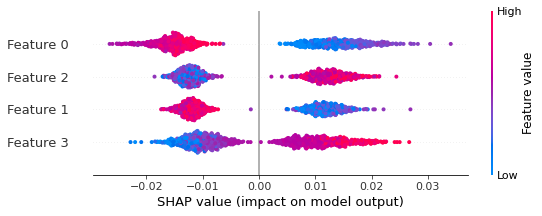

In [54]:
shap.summary_plot(shap_values_aggregated[0], input_sample_wo_time[:, 0, :])

In [55]:
transformed_X = scaler.inverse_transform(input_sample[:, 0, :])

In [56]:
transformed_X.shape

(1000, 5)

In [57]:
qvals = []
alpha=0.2; 
beta=0.8; 
k=1e9
for x in transformed_X: 
    DeltaT = x[2]
    DeltaS = x[1]
    qvals.append(-k*(-alpha*DeltaT + beta*DeltaS))

In [58]:
time_total = np.load('data/input_sal_temp_sine.npy')[:, 0]

In [59]:
shap_values_mean = np.mean(shap_values_aggregated, axis=0)

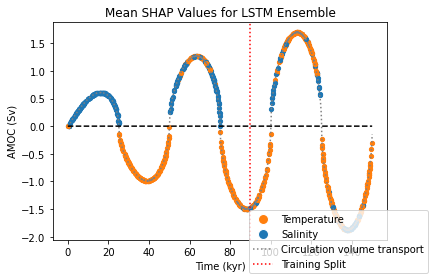

In [60]:
fig, ax = plt.subplots()
for i in range(1000):
    # temp > salinity => orange 
    if shap_values_mean[i, 1] > shap_values_mean[i, 0]:
        ax.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#ff7f0e')
    else:
        ax.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#1f77b4')

ax.set_xlabel('Time (kyr)');
ax.set_ylabel('AMOC (Sv)');
#ax.set_title('Dependency of Model Prediction on Temperature and Salinity');
ax.set_title('Mean SHAP Values for LSTM Ensemble');

q = np.load('data/q_sal_temp_ns.npy')
ax.plot(input_data[:, 0], q/1e10, linestyle=':', color='grey')
ax.plot(input_data[:, 0], input_data[:, 0]*0, 'k--')
#ax.axvline(input_data[60000][0], color='red', linestyle='dotted', label='Training Split');

# Define custom legend labels and colors (0 corresponds to one color, 1 to another)
legend_labels = ['Temperature', 'Salinity', 'Circulation volume transport', 'Training Split']  # Custom labels
colors = ['#ff7f0e', '#1f77b4']  # Corresponding colors for the categories

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
grey_line_handle = plt.Line2D([0], [0], linestyle=':', color='grey')
red_line_handle = plt.axvline(input_data[60000][0], color='red', linestyle='dotted');
legend_handles.append(grey_line_handle)
legend_handles.append(red_line_handle)

# Add the custom legend to the plot
fig.legend(legend_handles, legend_labels, loc='lower right');

plt.savefig('figures/shap_lstm_nonstationary_mean', dpi=100)

In [61]:
shap_ensembles = aggregated_shap_ensemble

In [62]:
shap_ensembles[0][0]

array([-0.01443183, -0.01096838, -0.01348615, -0.01108335])

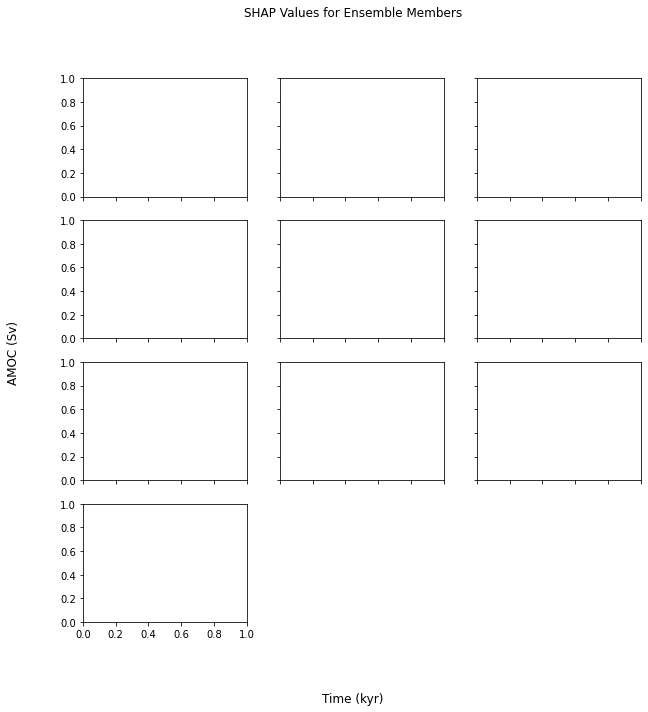

In [65]:
fig, ax = plt.subplots(4, 3, sharex = True, sharey = True, figsize = (10, 10))
fig.supxlabel('Time (kyr)')
fig.supylabel('AMOC (Sv)')
fig.suptitle('SHAP Values for Ensemble Members')
ax = ax.flatten()
for j in range(10, 12):  # 2 extra subplots in the 4x3 grid
    ax[j].axis('off')

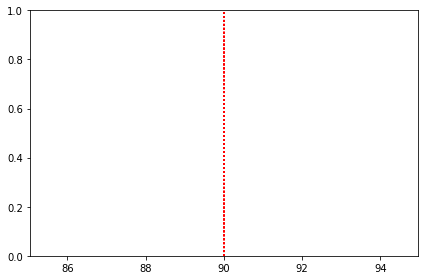

In [66]:
for j in range(10):
    for i in range(1000):
        # temp > salinity => orange 
        if shap_ensembles[j][i, 1] > shap_ensembles[j][i, 0]:
            ax[j].scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#ff7f0e')
        else:
            ax[j].scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#1f77b4')

    #ax[j].set_xlabel('Time (kyr)');
    #ax[j].set_ylabel('AMOC (Sv)');
    #ax.set_title('Dependency of Model Prediction on Temperature and Salinity');
    ax[j].set_title('Ensemble Member #' + str(j));

    q = np.load('data/q_sal_temp_ns.npy')
    ax[j].plot(input_data[:, 0], q/1e10, linestyle=':', color='grey')
    ax[j].plot(input_data[:, 0], input_data[:, 0]*0, 'k--')
    ax[j].axvline(input_data[60000][0], color='red', linestyle='dotted', label='Training Split');

    # Define custom legend labels and colors (0 corresponds to one color, 1 to another)
    legend_labels = ['Temperature', 'Salinity', 'Circulation volume transport', 'Training Split']  # Custom labels
    colors = ['#ff7f0e', '#1f77b4']  # Corresponding colors for the categories

    # Create custom legend handles
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
    grey_line_handle = plt.Line2D([0], [0], linestyle=':', color='grey')
    red_line_handle = plt.axvline(input_data[60000][0], color='red', linestyle='dotted');
    legend_handles.append(grey_line_handle)
    legend_handles.append(red_line_handle)

    # Add the custom legend to the plot
    fig.legend(legend_handles, legend_labels, loc='lower right', bbox_to_anchor=(0.9, 0.2));
    plt.tight_layout()

    fig.savefig('figures/shap_lstm_nonstationary_ensemble', dpi=100)

In [ ]:
for 
    for i in range(100):
        # temp > salinity => green
        if shap_values_aggregated[0, i, 1] > shap_values_aggregated[0, i, 0]:
            plt.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#2ca02c')
        else:
            plt.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#1f77b4')

plt.xlabel('Time (kyr)');
plt.ylabel('AMOC (Sv)');
plt.title('Dependency of LSTM on Temperature and Salinity');

q = np.load('data/q_sal_temp_sine.npy')
plt.plot(time_total, q/1e10, linestyle=':', color='grey')
plt.plot(time_total, input_data[:, 0]*0, 'k--')
plt.axvline(input_data[75000][0], color='red', linestyle='dotted');

# Define custom legend labels and colors (0 corresponds to one color, 1 to another)
legend_labels = ['Temperature', 'Salinity', 'Circulation volume transport']  # Custom labels
colors = ['#2ca02c', '#1f77b4']  # Corresponding colors for the categories

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
grey_line_handle = plt.Line2D([0], [0], linestyle=':', color='grey')
legend_handles.append(grey_line_handle)

# Add the custom legend to the plot
#plt.legend(legend_handles, legend_labels, loc='lower left');
#plt.savefig('dependency_plot_lstm_ns', dpi=300)

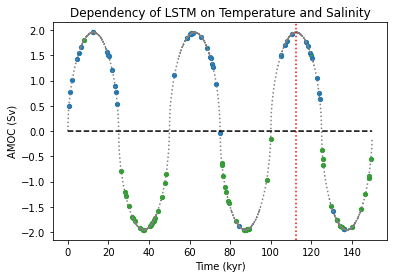

In [153]:
for i in range(100):
    # temp > salinity => green
    if shap_values_aggregated[0, i, 1] > shap_values_aggregated[0, i, 0]:
        plt.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#2ca02c')
    else:
        plt.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#1f77b4')

plt.xlabel('Time (kyr)');
plt.ylabel('AMOC (Sv)');
plt.title('Dependency of LSTM on Temperature and Salinity');

q = np.load('data/q_sal_temp_sine.npy')
plt.plot(time_total, q/1e10, linestyle=':', color='grey')
plt.plot(time_total, input_data[:, 0]*0, 'k--')
plt.axvline(input_data[75000][0], color='red', linestyle='dotted');

# Define custom legend labels and colors (0 corresponds to one color, 1 to another)
legend_labels = ['Temperature', 'Salinity', 'Circulation volume transport']  # Custom labels
colors = ['#2ca02c', '#1f77b4']  # Corresponding colors for the categories

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
grey_line_handle = plt.Line2D([0], [0], linestyle=':', color='grey')
legend_handles.append(grey_line_handle)

# Add the custom legend to the plot
#plt.legend(legend_handles, legend_labels, loc='lower left');
#plt.savefig('dependency_plot_lstm_ns', dpi=300)

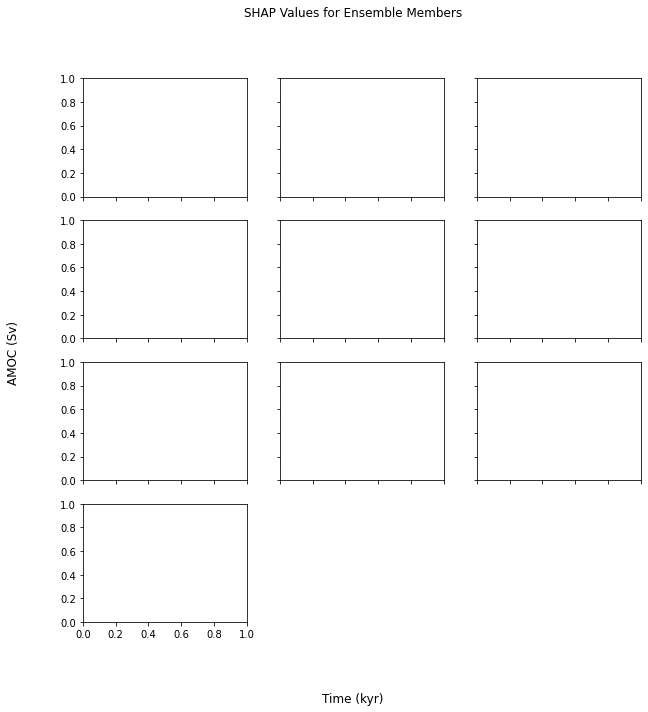

In [154]:
fig, ax = plt.subplots(4, 3, sharex = True, sharey = True, figsize = (10, 10))
fig.supxlabel('Time (kyr)')
fig.supylabel('AMOC (Sv)')
fig.suptitle('SHAP Values for Ensemble Members')
ax = ax.flatten()
for j in range(10, 12):  # 2 extra subplots in the 4x3 grid
    ax[j].axis('off')

In [ ]:
for j in range(10):
    for i in range(1000):
        # temp > salinity => orange 
        if shap_ensembles[j][i, 2] > shap_ensembles[j][i, 1]:
            ax[j].scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#ff7f0e')
        else:
            ax[j].scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#1f77b4')

    #ax[j].set_xlabel('Time (kyr)');
    #ax[j].set_ylabel('AMOC (Sv)');
    #ax.set_title('Dependency of Model Prediction on Temperature and Salinity');
    ax[j].set_title('Ensemble Member #' + str(j));

    q = np.load('data/q_sal_temp_sine.npy')
    ax[j].plot(input_data[:, 0], q/1e10, linestyle=':', color='grey')
    ax[j].plot(input_data[:, 0], input_data[:, 0]*0, 'k--')
    ax[j].axvline(input_data[60000][0], color='red', linestyle='dotted', label='Training Split');

    # Define custom legend labels and colors (0 corresponds to one color, 1 to another)
    legend_labels = ['Temperature', 'Salinity', 'Circulation volume transport', 'Training Split']  # Custom labels
    colors = ['#ff7f0e', '#1f77b4']  # Corresponding colors for the categories

    # Create custom legend handles
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
    grey_line_handle = plt.Line2D([0], [0], linestyle=':', color='grey')
    red_line_handle = plt.axvline(input_data[60000][0], color='red', linestyle='dotted');
    legend_handles.append(grey_line_handle)
    legend_handles.append(red_line_handle)

    # Add the custom legend to the plot
    fig.legend(legend_handles, legend_labels, loc='lower right', bbox_to_anchor=(0.9, 0.2));
    plt.tight_layout()

    fig.savefig('figures/shap_mlp_stationary_ensemble', dpi=100)